In [3]:
from ib_insync import *
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from trading_stratigies import write_file, sort_first_by_second
import matplotlib as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# The function to get contract historical data
def get_contract_data(contract, look_back, resolution, side, end_time):
    bar = ib.reqHistoricalData(contract, endDateTime = end_time, durationStr=look_back,
        barSizeSetting= resolution, whatToShow=side, useRTH=True, formatDate=1)
# use util in ib-insync to convert bar data into pandas dataframe    
    df = util.df(bar)
    return df 

# The function to get stock historical data
def get_stock_data(ticker, look_back, resolution, side, end_time):
    contract = Contract(symbol = ticker, secType = 'STK', exchange = 'SMART',currency = 'USD')   
    if len(ib.qualifyContracts(contract)) == 0:
        return pd.DataFrame()
    return get_contract_data(contract, look_back, resolution, side, end_time)

# The function to get stock return historical data
def get_return_history(ticker_lst, look_back, resolution, side, end_time):
    column_names = np.array(get_stock_data("ABC", look_back, resolution, side, end_time)['date'][1:])
    Stocks_return_history_tmp = pd.DataFrame(columns = column_names)
    for ticker_index in range(len(ticker_lst)):
        ticker = ticker_lst [ticker_index]
        stock_data_tmp = get_stock_data(ticker, look_back, resolution, side, end_time)
        if type(stock_data_tmp) != type(pd.DataFrame()) or not "close" in stock_data_tmp:
            print ("no history available for ticker " + ticker)
            continue 
        if len(stock_data_tmp) - 1 < len(column_names):
            print ("not long enough history for " + str(ticker))
        elif len(stock_data_tmp) - 1 > len(column_names):
            print ("excessive " + str(len(stock_data_tmp)-len(column_names)) + 
                   " trading days for " + str(ticker))
        else:
            equity_close_history_tmp = stock_data_tmp.close
            Stocks_return_history_tmp.loc[ticker_lst[ticker_index]] = np.diff(np.log(equity_close_history_tmp))
    return Stocks_return_history_tmp

In [81]:
# Connect to IB Server
ib=IB()
util.startLoop()
ib.connect('127.0.0.1',7497, clientId= 12)

<IB connected to 127.0.0.1:7497 clientId=12>

In [8]:
SectorNames = ("BasicMaterials, ConsumerCyclical, FinancialServices, RealEstate, ConsumerDefensive, Healthcare, \
Utilities, CommunicationServices, Energy, Industrials, Technology").split(', ')

In [9]:
BasicMaterials_groups = [['RIO', 'BBL', 'BHP', 'PKX'], ['RS', 'NGVT'], ['NUE', 'STLD'], ['CE', 'EMN'], ['NEM', 'AEM', 'KL', 'RGLD', 'AGI'], ['KGC', 'AUY'], ['SAND', 'OR'], ['ECL', 'SCL'], ['CTVA', 'ASH'], ['MLM', 'VMC'], ['AG', 'FSM', 'SILV', 'SVM'], ['CC', 'TROX'], ['GGB', 'SID']]
ConsumerCyclical_groups = [['EBAY', 'GOLF'], ['IP', 'AAP', 'GPC', 'WRK', 'GPK', 'BERY', 'GNTX', 'LEG'], ['HD', 'LOW', 'TSCO'], ['ROST', 'BURL'], ['WH', 'ARMK', 'CHH', 'FUN'], ['MAR', 'HLT', 'H'], ['LVS', 'WYNN'], ['AMZN', 'CMG', 'YUMC'], ['BLL', 'CCK'], ['BYD', 'RRR'], ['DRI', 'TXRH', 'CBRL'], ['DHI', 'TOL'], ['MDC', 'TMHC'], ['PII', 'BC'], ['SIX', 'SEAS'], ['EAT', 'BLMN'], ['F', 'GM'], ['CCL', 'NCLH', 'RCL', 'CUK'], ['BABA', 'JD']]
FinancialServices_groups = [['MET', 'PRU', 'PFG'], ['TFC', 'HBAN', 'CFG', 'KEY', 'CMA'], ['ZION', 'EWBC'], ['VLY', 'BOKF'], ['FRME', 'UCBI'], ['COLB', 'EGBN'], ['UMBF', 'CBU'], ['COF', 'AIG'], ['ALL', 'RLI', 'SIGI', 'HMN'], ['TRV', 'Y'], ['ARCC', 'HTGC', 'MAIN', 'RA'], ['PDI', 'PCI', 'PTY'], ['RE', 'RNR', 'MKL'], ['TROW', 'CNS'], ['ARES', 'EFC'], ['MKTX', 'TW'], ['BMEZ', 'BSTZ'], ['ING', 'SAN'], ['BCS', 'LYG'], ['FCNCA', 'CIT'], ['MTG', 'ESNT', 'NMIH'], ['EVR', 'HLI', 'MC', 'PJT', 'PIPR'], ['BEN', 'FHI'], ['KB', 'SHG'], ['HDB', 'IBN'], ['ITUB', 'BBD', 'PBR', 'BSBR']]
RealEstate_groups = [['CUZ', 'KRC', 'DEI', 'HPP'], ['BDN', 'JBGS', 'PDM'], ['EQR', 'ESS', 'UDR'], ['O', 'NNN'], ['EGP', 'LXP', 'IRT'], ['PEAK', 'HTA'], ['NHI', 'LTC', 'UMH'], ['KIM', 'BRX'], ['REG', 'FRT'], ['RPAI', 'KRG'], ['CONE', 'COR'], ['STWD', 'CIM', 'ARI', 'DX', 'LADR'], ['NRZ', 'PMT', 'MFA'], ['APLE', 'XHR'], ['SHO', 'DRH'], ['WY', 'RYN', 'PCH']]
ConsumerDefensive_groups = [['DG', 'DLTR', 'CASY'], ['CCEP', 'NOMD', 'LANC', 'JJSF'], ['IMKTA', 'WMK'], ['SAFM', 'PPC'], ['FMX', 'KOF'], ['UVV', 'CVGW', 'PSMT'], ['HLF', 'NUS'], ['ABEV', 'NTCO']]
Healthcare_groups = [['DXCM', 'CRL', 'IDXX', 'TECH'], ['SYK', 'GMED', 'SNN'], ['ELAN', 'MOH'], ['XRAY', 'HSIC'], ['TMO', 'ABT', 'DHR', 'WST'], ['LH', 'DGX'], ['MASI', 'AMED', 'LHCG'], ['HQY', 'RPRX'], ['EXEL', 'ALKS'], ['EXAS', 'NEO'], ['NBIX', 'ALNY'], ['SGEN', 'PTCT'], ['MDGL', 'VNDA', 'ENTA'], ['ARWR', 'BPMC'], ['SAGE', 'ITCI'], ['RARE', 'SGMO'], ['XNCR', 'RYTM'], ['GTHX', 'ARDX'], ['CYTK', 'AKRO'], ['BEAM', 'EDIT']]
Utilities_groups = [['CMS', 'PNW', 'CWT'], ['BKH', 'CPK']]
CommunicationServices_groups = [['FB', 'GOOG'], ['CMCSA', 'CHTR', 'ATUS', 'CABO', 'MSGS', 'AMX'], ['LSXMK', 'LSXMA'], ['LBTYK', 'LBTYA'], ['ATVI', 'TTWO', 'ZNGA'], ['SBGI', 'SSP'], ['ROKU', 'TWLO'], ['Z', 'ZG'], ['VIAC', 'DISCA', 'DISCK']]
Energy_groups = [['MPC', 'VLO', 'PSX'], ['WMB', 'OKE', 'HEP'], ['SU', 'IMO'], ['PXD', 'EOG', 'XEC'], ['SLB', 'HAL'], ['SNP', 'PTR'], ['DHT', 'FRO', 'EURN'], ['PBR', 'UGP']]
Industrials_groups = [['BA', 'SPR', 'HXL', 'RYAAY'], ['NVT', 'CR'], ['PNR', 'WTS', 'LECO'], ['SWK', 'GGG'], ['HI', 'MLI', 'NPO'], ['RXN', 'FELE'], ['PWR', 'ACM'], ['SNA', 'SNDR'], ['FDX', 'AAWW'], ['GFF', 'AIR'], ['OC', 'PGTI'], ['TDG', 'HEI'], ['AER', 'AL'], ['PRIM', 'ABM', 'EPAC'], ['DAL', 'LUV', 'ALK'], ['BLD', 'IBP'], ['MRCY', 'AEIS'], ['SWBI', 'RGR'], ['ERJ', 'GOL']]
Technology_groups = [['AMAT', 'LRCX', 'KLAC', 'TER'], ['TXN', 'ADI', 'MXIM'], ['MSFT', 'ADBE'], ['CDW', 'TRMB'], ['NOW', 'GDDY'], ['ARW', 'AVT'], ['DELL', 'VMW'], ['SNX', 'SMCI'], ['SMTC', 'MTSI', 'POWI'], ['AMD', 'QCOM', 'XLNX'], ['PEGA', 'SPSC'], ['PAYC', 'GLOB'], ['CIEN', 'JNPR', 'NTCT'], ['ZEN', 'SMAR'], ['TEAM', 'FIVN'], ['ZS', 'AVLR'], ['DDOG', 'WK'], ['UCTT', 'ICHR'], ['PRO', 'MODN'], ['CNXC', 'EGHT'], ['ESTC', 'ASAN'], ['U', 'NEWR'], ['NET', 'FOUR'], ['UBER', 'LYFT', 'BSY'], ['FSLR', 'CSIQ'], ['ENPH', 'SEDG'], ['NOK', 'IRBT']]
Tickers_grouped_all = [BasicMaterials_groups, ConsumerCyclical_groups, FinancialServices_groups, RealEstate_groups, \
                      ConsumerDefensive_groups, Healthcare_groups, Utilities_groups, CommunicationServices_groups, \
                      Energy_groups, Industrials_groups, Technology_groups]

In [10]:
Pairs_all_adf_p = [['FCNCA', 'CIT'], ['CCL', 'CUK'], ['ABEV', 'NTCO'], ['ESS', 'UDR'], ['WMB', 'OKE'], ['UVV', 'CVGW'], ['HLI', 'PIPR'], ['FRO', 'EURN'], ['HLT', 'H'], ['EVR', 'PIPR'], ['BA', 'SPR'], ['MAR', 'HLT'], ['RNR', 'MKL'], ['CIM', 'LADR'], ['MAR', 'H'], ['RIO', 'BBL'], ['GPK', 'GNTX'], ['DHT', 'EURN'], ['CUZ', 'HPP'], ['DDOG', 'WK'], ['MRCY', 'AEIS'], ['RYN', 'PCH'], ['TXRH', 'CBRL'], ['BKH', 'CPK'], ['AMED', 'LHCG'], ['PMT', 'MFA'], ['DX', 'LADR'], ['NRZ', 'PMT'], ['LUV', 'ALK'], ['ARWR', 'BPMC'], ['STWD', 'ARI'], ['GFF', 'AIR'], ['OKE', 'HEP'], ['STWD', 'LADR'], ['PJT', 'PIPR'], ['NUE', 'STLD'], ['VLY', 'BOKF'], ['FRME', 'UCBI'], ['TROW', 'CNS'], ['GGB', 'SID'], ['MTG', 'ESNT'], ['EXAS', 'NEO'], ['ARI', 'LADR'], ['TFC', 'KEY'], ['FMX', 'KOF'], ['BDN', 'PDM'], ['NEM', 'AGI'], ['MDGL', 'VNDA'], ['AAP', 'WRK'], ['BEAM', 'EDIT'], ['SLB', 'HAL'], ['TFC', 'CMA'], ['BDN', 'JBGS'], ['MPC', 'VLO'], ['CRL', 'TECH'], ['BBL', 'PKX'], ['NEM', 'KL'], ['WRK', 'GPK'], ['CDW', 'TRMB'], ['AAP', 'GPK'], ['KGC', 'AUY'], ['EGP', 'IRT'], ['KIM', 'BRX'], ['ROST', 'BURL'], ['WMB', 'HEP'], ['AMAT', 'KLAC'], ['MC', 'PIPR'], ['CTVA', 'ASH'], ['HLI', 'PJT'], ['GPC', 'GPK'], ['DRI', 'TXRH'], ['BHP', 'PKX'], ['TTWO', 'ZNGA'], ['MLM', 'VMC'], ['SBGI', 'SSP'], ['WY', 'PCH'], ['MPC', 'PSX'], ['KL', 'AGI'], ['CHTR', 'ATUS'], ['ARES', 'EFC'], ['ADI', 'MXIM'], ['FB', 'GOOG'], ['RIO', 'PKX'], ['CCL', 'NCLH'], ['CCEP', 'LANC'], ['RIO', 'BHP'], ['PEGA', 'SPSC'], ['CHH', 'FUN'], ['TMO', 'ABT'], ['SAND', 'OR'], ['ESNT', 'NMIH'], ['ARCC', 'MAIN'], ['PII', 'BC'], ['WH', 'ARMK'], ['MTG', 'NMIH'], ['BYD', 'RRR'], ['DG', 'CASY'], ['EQR', 'ESS'], ['AAP', 'GNTX'], ['ZS', 'AVLR'], ['ATUS', 'CABO'], ['ITUB', 'BBD'], ['LH', 'DGX'], ['WTS', 'LECO'], ['DLTR', 'CASY'], ['LRCX', 'KLAC'], ['TEAM', 'FIVN'], ['CNXC', 'EGHT'], ['PCI', 'PTY'], ['RGLD', 'AGI'], ['EVR', 'HLI'], ['RE', 'RNR'], ['CFG', 'CMA'], ['AG', 'SILV'], ['EGP', 'LXP'], ['BA', 'HXL'], ['PDI', 'PCI'], ['CUZ', 'KRC'], ['CCEP', 'NOMD'], ['BERY', 'LEG'], ['GMED', 'SNN'], ['DXCM', 'TECH'], ['GNTX', 'LEG'], ['BBL', 'BHP'], ['FSM', 'SILV'], ['IDXX', 'TECH'], ['NET', 'FOUR'], ['GPC', 'GNTX'], ['EAT', 'BLMN'], ['CFG', 'KEY'], ['ENPH', 'SEDG'], ['RS', 'NGVT'], ['LSXMK', 'LSXMA'], ['PWR', 'ACM'], ['BCS', 'LYG'], ['IP', 'GNTX'], ['LTC', 'UMH'], ['F', 'GM'], ['PRIM', 'ABM'], ['GPC', 'LEG'], ['BLL', 'CCK'], ['AAP', 'GPC'], ['SMTC', 'MTSI'], ['MTSI', 'POWI'], ['AAP', 'LEG'], ['TRV', 'Y'], ['ATVI', 'ZNGA'], ['CMCSA', 'ATUS'], ['UVV', 'PSMT'], ['APLE', 'XHR'], ['LOW', 'TSCO'], ['HLI', 'MC'], ['SGEN', 'PTCT'], ['VNDA', 'ENTA'], ['LBTYK', 'LBTYA'], ['TMO', 'DHR'], ['BERY', 'GNTX'], ['CHTR', 'CABO'], ['CVGW', 'PSMT'], ['RLI', 'SIGI'], ['EBAY', 'GOLF'], ['CC', 'TROX'], ['ABM', 'EPAC'], ['FSM', 'SVM'], ['XRAY', 'HSIC'], ['HD', 'TSCO'], ['NRZ', 'MFA'], ['SAFM', 'PPC'], ['DHT', 'FRO'], ['OC', 'PGTI'], ['BEN', 'FHI'], ['SU', 'IMO'], ['CMCSA', 'CHTR'], ['IP', 'GPC'], ['BMEZ', 'BSTZ'], ['IP', 'AAP'], ['CE', 'EMN'], ['LRCX', 'TER'], ['AMZN', 'YUMC'], ['AEM', 'AGI'], ['TXN', 'MXIM'], ['ALL', 'SIGI'], ['ITUB', 'BSBR'], ['U', 'NEWR'], ['UCTT', 'ICHR'], ['TXN', 'ADI'], ['CMS', 'PNW'], ['LYFT', 'BSY'], ['MASI', 'LHCG'], ['EVR', 'MC'], ['SIX', 'SEAS'], ['AMD', 'QCOM'], ['RCL', 'CUK'], ['NCLH', 'CUK'], ['MDC', 'TMHC'], ['CMCSA', 'CABO'], ['SMTC', 'POWI'], ['CCEP', 'JJSF'], ['TFC', 'HBAN'], ['TMO', 'WST'], ['WH', 'CHH'], ['NHI', 'UMH'], ['PXD', 'XEC'], ['MSGS', 'AMX'], ['EXEL', 'ALKS'], ['BBD', 'BSBR'], ['UBER', 'LYFT'], ['DAL', 'LUV'], ['AMAT', 'TER'], ['KLAC', 'TER'], ['DG', 'DLTR'], ['DXCM', 'CRL'], ['NEM', 'AEM'], ['LXP', 'IRT'], ['CYTK', 'AKRO'], ['MKTX', 'TW'], ['DEI', 'HPP'], ['VIAC', 'DISCA'], ['REG', 'FRT'], ['ABT', 'WST'], ['ZEN', 'SMAR'], ['CMG', 'YUMC'], ['HQY', 'RPRX'], ['COLB', 'EGBN'], ['AMZN', 'CMG'], ['UMBF', 'CBU'], ['AER', 'AL'], ['GPC', 'BERY'], ['CHTR', 'AMX'], ['MET', 'PRU'], ['SWBI', 'RGR'], ['DISCA', 'DISCK'], ['NCLH', 'RCL'], ['ALL', 'RLI'], ['SAGE', 'ITCI'], ['IP', 'WRK'], ['O', 'NNN'], ['EQR', 'UDR'], ['CABO', 'AMX'], ['CMS', 'CWT'], ['LVS', 'WYNN'], ['WY', 'RYN'], ['NHI', 'LTC'], ['ARCC', 'RA'], ['IMKTA', 'WMK'], ['AG', 'SVM'], ['VIAC', 'DISCK'], ['ELAN', 'MOH'], ['KB', 'SHG'], ['RARE', 'SGMO'], ['PNW', 'CWT'], ['KL', 'RGLD'], ['KRC', 'DEI'], ['PBR', 'UGP'], ['DHI', 'TOL'], ['EOG', 'XEC'], ['ATUS', 'AMX'], ['CRL', 'IDXX'], ['PEAK', 'HTA'], ['AEM', 'KL'], ['PRIM', 'EPAC'], ['CMCSA', 'AMX'], ['RPAI', 'KRG'], ['ROKU', 'TWLO'], ['NOK', 'IRBT'], ['NEM', 'RGLD'], ['HTGC', 'RA'], ['SHO', 'DRH'], ['MAIN', 'RA'], ['AAP', 'BERY'], ['MASI', 'AMED'], ['CONE', 'COR'], ['HBAN', 'KEY'], ['CUZ', 'DEI'], ['SNA', 'SNDR'], ['TDG', 'HEI'], ['NVT', 'CR'], ['PBR', 'BSBR'], ['FDX', 'AAWW'], ['PRO', 'MODN'], ['SNX', 'SMCI'], ['HBAN', 'CFG'], ['MDGL', 'ENTA'], ['BABA', 'JD'], ['GPK', 'BERY'], ['MET', 'PFG'], ['DXCM', 'IDXX'], ['ITUB', 'PBR'], ['XNCR', 'RYTM'], ['BBD', 'PBR'], ['WRK', 'BERY'], ['AEM', 'RGLD'], ['JBGS', 'PDM'], ['BA', 'RYAAY'], ['HBAN', 'CMA'], ['BLD', 'IBP'], ['EVR', 'PJT'], ['IP', 'BERY'], ['SYK', 'GMED'], ['PXD', 'EOG'], ['PRU', 'PFG'], ['PNR', 'LECO'], ['HXL', 'RYAAY'], ['NOMD', 'JJSF'], ['TFC', 'CFG'], ['AMD', 'XLNX'], ['LANC', 'JJSF'], ['ECL', 'SCL'], ['HTGC', 'MAIN'], ['NOMD', 'LANC'], ['HDB', 'IBN'], ['SYK', 'SNN'], ['GTHX', 'ARDX'], ['SPR', 'HXL'], ['PAYC', 'GLOB'], ['FSLR', 'CSIQ'], ['ARMK', 'CHH'], ['MSFT', 'ADBE'], ['RXN', 'FELE'], ['CCL', 'RCL'], ['DRI', 'CBRL'], ['DHR', 'WST'], ['MLI', 'NPO'], ['GPC', 'WRK'], ['ATVI', 'TTWO'], ['HLF', 'NUS'], ['CIM', 'DX'], ['HI', 'MLI'], ['ABT', 'DHR'], ['STWD', 'CIM'], ['WRK', 'GNTX'], ['ING', 'SAN'], ['DELL', 'VMW'], ['CHTR', 'MSGS'], ['ARCC', 'HTGC'], ['CIEN', 'NTCT'], ['ATUS', 'MSGS'], ['SILV', 'SVM'], ['ESTC', 'ASAN'], ['KRC', 'HPP'], ['CABO', 'MSGS'], ['CMCSA', 'MSGS'], ['QCOM', 'XLNX'], ['IP', 'LEG'], ['AMAT', 'LRCX'], ['COF', 'AIG'], ['NBIX', 'ALNY'], ['AG', 'FSM'], ['SWK', 'GGG'], ['WRK', 'LEG'], ['VLO', 'PSX'], ['HD', 'LOW'], ['Z', 'ZG'], ['KEY', 'CMA'], ['JNPR', 'NTCT'], ['ARW', 'AVT'], ['MC', 'PJT'], ['GPK', 'LEG'], ['ZION', 'EWBC'], ['CIEN', 'JNPR'], ['DAL', 'ALK'], ['SPR', 'RYAAY'], ['IP', 'GPK'], ['ARMK', 'FUN'], ['CIM', 'ARI'], ['RLI', 'HMN'], ['SIGI', 'HMN'], ['ERJ', 'GOL'], ['UBER', 'BSY'], ['ALL', 'HMN'], ['RE', 'MKL'], ['HI', 'NPO'], ['PNR', 'WTS'], ['ARI', 'DX'], ['STWD', 'DX'], ['NOW', 'GDDY'], ['SNP', 'PTR']]
Pairs_all_adf_p_reverse = [['CIT', 'FCNCA'], ['CUK', 'CCL'], ['NTCO', 'ABEV'], ['UDR', 'ESS'], ['OKE', 'WMB'], ['CVGW', 'UVV'], ['PIPR', 'HLI'], ['EURN', 'FRO'], ['H', 'HLT'], ['PIPR', 'EVR'], ['SPR', 'BA'], ['HLT', 'MAR'], ['MKL', 'RNR'], ['LADR', 'CIM'], ['H', 'MAR'], ['BBL', 'RIO'], ['GNTX', 'GPK'], ['EURN', 'DHT'], ['HPP', 'CUZ'], ['WK', 'DDOG'], ['AEIS', 'MRCY'], ['PCH', 'RYN'], ['CBRL', 'TXRH'], ['CPK', 'BKH'], ['LHCG', 'AMED'], ['MFA', 'PMT'], ['LADR', 'DX'], ['PMT', 'NRZ'], ['ALK', 'LUV'], ['BPMC', 'ARWR'], ['ARI', 'STWD'], ['AIR', 'GFF'], ['HEP', 'OKE'], ['LADR', 'STWD'], ['PIPR', 'PJT'], ['STLD', 'NUE'], ['BOKF', 'VLY'], ['UCBI', 'FRME'], ['CNS', 'TROW'], ['SID', 'GGB'], ['ESNT', 'MTG'], ['NEO', 'EXAS'], ['LADR', 'ARI'], ['KEY', 'TFC'], ['KOF', 'FMX'], ['PDM', 'BDN'], ['AGI', 'NEM'], ['VNDA', 'MDGL'], ['WRK', 'AAP'], ['EDIT', 'BEAM'], ['HAL', 'SLB'], ['CMA', 'TFC'], ['JBGS', 'BDN'], ['VLO', 'MPC'], ['TECH', 'CRL'], ['PKX', 'BBL'], ['KL', 'NEM'], ['GPK', 'WRK'], ['TRMB', 'CDW'], ['GPK', 'AAP'], ['AUY', 'KGC'], ['IRT', 'EGP'], ['BRX', 'KIM'], ['BURL', 'ROST'], ['HEP', 'WMB'], ['KLAC', 'AMAT'], ['PIPR', 'MC'], ['ASH', 'CTVA'], ['PJT', 'HLI'], ['GPK', 'GPC'], ['TXRH', 'DRI'], ['PKX', 'BHP'], ['ZNGA', 'TTWO'], ['VMC', 'MLM'], ['SSP', 'SBGI'], ['PCH', 'WY'], ['PSX', 'MPC'], ['AGI', 'KL'], ['ATUS', 'CHTR'], ['EFC', 'ARES'], ['MXIM', 'ADI'], ['GOOG', 'FB'], ['PKX', 'RIO'], ['NCLH', 'CCL'], ['LANC', 'CCEP'], ['BHP', 'RIO'], ['SPSC', 'PEGA'], ['FUN', 'CHH'], ['ABT', 'TMO'], ['OR', 'SAND'], ['NMIH', 'ESNT'], ['MAIN', 'ARCC'], ['BC', 'PII'], ['ARMK', 'WH'], ['NMIH', 'MTG'], ['RRR', 'BYD'], ['CASY', 'DG'], ['ESS', 'EQR'], ['GNTX', 'AAP'], ['AVLR', 'ZS'], ['CABO', 'ATUS'], ['BBD', 'ITUB'], ['DGX', 'LH'], ['LECO', 'WTS'], ['CASY', 'DLTR'], ['KLAC', 'LRCX'], ['FIVN', 'TEAM'], ['EGHT', 'CNXC'], ['PTY', 'PCI'], ['AGI', 'RGLD'], ['HLI', 'EVR'], ['RNR', 'RE'], ['CMA', 'CFG'], ['SILV', 'AG'], ['LXP', 'EGP'], ['HXL', 'BA'], ['PCI', 'PDI'], ['KRC', 'CUZ'], ['NOMD', 'CCEP'], ['LEG', 'BERY'], ['SNN', 'GMED'], ['TECH', 'DXCM'], ['LEG', 'GNTX'], ['BHP', 'BBL'], ['SILV', 'FSM'], ['TECH', 'IDXX'], ['FOUR', 'NET'], ['GNTX', 'GPC'], ['BLMN', 'EAT'], ['KEY', 'CFG'], ['SEDG', 'ENPH'], ['NGVT', 'RS'], ['LSXMA', 'LSXMK'], ['ACM', 'PWR'], ['LYG', 'BCS'], ['GNTX', 'IP'], ['UMH', 'LTC'], ['GM', 'F'], ['ABM', 'PRIM'], ['LEG', 'GPC'], ['CCK', 'BLL'], ['GPC', 'AAP'], ['MTSI', 'SMTC'], ['POWI', 'MTSI'], ['LEG', 'AAP'], ['Y', 'TRV'], ['ZNGA', 'ATVI'], ['ATUS', 'CMCSA'], ['PSMT', 'UVV'], ['XHR', 'APLE'], ['TSCO', 'LOW'], ['MC', 'HLI'], ['PTCT', 'SGEN'], ['ENTA', 'VNDA'], ['LBTYA', 'LBTYK'], ['DHR', 'TMO'], ['GNTX', 'BERY'], ['CABO', 'CHTR'], ['PSMT', 'CVGW'], ['SIGI', 'RLI'], ['GOLF', 'EBAY'], ['TROX', 'CC'], ['EPAC', 'ABM'], ['SVM', 'FSM'], ['HSIC', 'XRAY'], ['TSCO', 'HD'], ['MFA', 'NRZ'], ['PPC', 'SAFM'], ['FRO', 'DHT'], ['PGTI', 'OC'], ['FHI', 'BEN'], ['IMO', 'SU'], ['CHTR', 'CMCSA'], ['GPC', 'IP'], ['BSTZ', 'BMEZ'], ['AAP', 'IP'], ['EMN', 'CE'], ['TER', 'LRCX'], ['YUMC', 'AMZN'], ['AGI', 'AEM'], ['MXIM', 'TXN'], ['SIGI', 'ALL'], ['BSBR', 'ITUB'], ['NEWR', 'U'], ['ICHR', 'UCTT'], ['ADI', 'TXN'], ['PNW', 'CMS'], ['BSY', 'LYFT'], ['LHCG', 'MASI'], ['MC', 'EVR'], ['SEAS', 'SIX'], ['QCOM', 'AMD'], ['CUK', 'RCL'], ['CUK', 'NCLH'], ['TMHC', 'MDC'], ['CABO', 'CMCSA'], ['POWI', 'SMTC'], ['JJSF', 'CCEP'], ['HBAN', 'TFC'], ['WST', 'TMO'], ['CHH', 'WH'], ['UMH', 'NHI'], ['XEC', 'PXD'], ['AMX', 'MSGS'], ['ALKS', 'EXEL'], ['BSBR', 'BBD'], ['LYFT', 'UBER'], ['LUV', 'DAL'], ['TER', 'AMAT'], ['TER', 'KLAC'], ['DLTR', 'DG'], ['CRL', 'DXCM'], ['AEM', 'NEM'], ['IRT', 'LXP'], ['AKRO', 'CYTK'], ['TW', 'MKTX'], ['HPP', 'DEI'], ['DISCA', 'VIAC'], ['FRT', 'REG'], ['WST', 'ABT'], ['SMAR', 'ZEN'], ['YUMC', 'CMG'], ['RPRX', 'HQY'], ['EGBN', 'COLB'], ['CMG', 'AMZN'], ['CBU', 'UMBF'], ['AL', 'AER'], ['BERY', 'GPC'], ['AMX', 'CHTR'], ['PRU', 'MET'], ['RGR', 'SWBI'], ['DISCK', 'DISCA'], ['RCL', 'NCLH'], ['RLI', 'ALL'], ['ITCI', 'SAGE'], ['WRK', 'IP'], ['NNN', 'O'], ['UDR', 'EQR'], ['AMX', 'CABO'], ['CWT', 'CMS'], ['WYNN', 'LVS'], ['RYN', 'WY'], ['LTC', 'NHI'], ['RA', 'ARCC'], ['WMK', 'IMKTA'], ['SVM', 'AG'], ['DISCK', 'VIAC'], ['MOH', 'ELAN'], ['SHG', 'KB'], ['SGMO', 'RARE'], ['CWT', 'PNW'], ['RGLD', 'KL'], ['DEI', 'KRC'], ['UGP', 'PBR'], ['TOL', 'DHI'], ['XEC', 'EOG'], ['AMX', 'ATUS'], ['IDXX', 'CRL'], ['HTA', 'PEAK'], ['KL', 'AEM'], ['EPAC', 'PRIM'], ['AMX', 'CMCSA'], ['KRG', 'RPAI'], ['TWLO', 'ROKU'], ['IRBT', 'NOK'], ['RGLD', 'NEM'], ['RA', 'HTGC'], ['DRH', 'SHO'], ['RA', 'MAIN'], ['BERY', 'AAP'], ['AMED', 'MASI'], ['COR', 'CONE'], ['KEY', 'HBAN'], ['DEI', 'CUZ'], ['SNDR', 'SNA'], ['HEI', 'TDG'], ['CR', 'NVT'], ['BSBR', 'PBR'], ['AAWW', 'FDX'], ['MODN', 'PRO'], ['SMCI', 'SNX'], ['CFG', 'HBAN'], ['ENTA', 'MDGL'], ['JD', 'BABA'], ['BERY', 'GPK'], ['PFG', 'MET'], ['IDXX', 'DXCM'], ['PBR', 'ITUB'], ['RYTM', 'XNCR'], ['PBR', 'BBD'], ['BERY', 'WRK'], ['RGLD', 'AEM'], ['PDM', 'JBGS'], ['RYAAY', 'BA'], ['CMA', 'HBAN'], ['IBP', 'BLD'], ['PJT', 'EVR'], ['BERY', 'IP'], ['GMED', 'SYK'], ['EOG', 'PXD'], ['PFG', 'PRU'], ['LECO', 'PNR'], ['RYAAY', 'HXL'], ['JJSF', 'NOMD'], ['CFG', 'TFC'], ['XLNX', 'AMD'], ['JJSF', 'LANC'], ['SCL', 'ECL'], ['MAIN', 'HTGC'], ['LANC', 'NOMD'], ['IBN', 'HDB'], ['SNN', 'SYK'], ['ARDX', 'GTHX'], ['HXL', 'SPR'], ['GLOB', 'PAYC'], ['CSIQ', 'FSLR'], ['CHH', 'ARMK'], ['ADBE', 'MSFT'], ['FELE', 'RXN'], ['RCL', 'CCL'], ['CBRL', 'DRI'], ['WST', 'DHR'], ['NPO', 'MLI'], ['WRK', 'GPC'], ['TTWO', 'ATVI'], ['NUS', 'HLF'], ['DX', 'CIM'], ['MLI', 'HI'], ['DHR', 'ABT'], ['CIM', 'STWD'], ['GNTX', 'WRK'], ['SAN', 'ING'], ['VMW', 'DELL'], ['MSGS', 'CHTR'], ['HTGC', 'ARCC'], ['NTCT', 'CIEN'], ['MSGS', 'ATUS'], ['SVM', 'SILV'], ['ASAN', 'ESTC'], ['HPP', 'KRC'], ['MSGS', 'CABO'], ['MSGS', 'CMCSA'], ['XLNX', 'QCOM'], ['LEG', 'IP'], ['LRCX', 'AMAT'], ['AIG', 'COF'], ['ALNY', 'NBIX'], ['FSM', 'AG'], ['GGG', 'SWK'], ['LEG', 'WRK'], ['PSX', 'VLO'], ['LOW', 'HD'], ['ZG', 'Z'], ['CMA', 'KEY'], ['NTCT', 'JNPR'], ['AVT', 'ARW'], ['PJT', 'MC'], ['LEG', 'GPK'], ['EWBC', 'ZION'], ['JNPR', 'CIEN'], ['ALK', 'DAL'], ['RYAAY', 'SPR'], ['GPK', 'IP'], ['FUN', 'ARMK'], ['ARI', 'CIM'], ['HMN', 'RLI'], ['HMN', 'SIGI'], ['GOL', 'ERJ'], ['BSY', 'UBER'], ['HMN', 'ALL'], ['MKL', 'RE'], ['NPO', 'HI'], ['WTS', 'PNR'], ['DX', 'ARI'], ['DX', 'STWD'], ['GDDY', 'NOW'], ['PTR', 'SNP']]
adf_stats_sorted = [-17.252288329898505, -15.488583132318771, -15.121228322073664, -14.60762199737429, -14.249135067724303, -14.106814842389028, -13.561993115369656, -13.463351393801739, -13.426443961945612, -13.403717848770222, -13.400177627812955, -13.351670819885813, -13.258635964292827, -13.231511694675683, -13.2121477925786, -13.190580231552945, -13.082445364035078, -12.97784818287318, -12.95669848334467, -12.936275395321717, -12.92679364327035, -12.9147100666266, -12.904560389184793, -12.829318580249833, -12.820284990507119, -12.790394862415411, -12.774397815159173, -12.71043115739292, -12.708607436365439, -12.669612087410055, -12.663272922636567, -12.65183373132546, -12.535786475387978, -12.534352035217676, -12.47893713732274, -12.407600292725999, -12.375395277787444, -12.360387974078662, -12.328601719939575, -12.319310265171335, -12.31633654764559, -12.291343560455504, -12.267302250630035, -12.265981518848196, -12.265433344595902, -12.260532113346693, -12.258386048205947, -12.255138503995479, -12.25127992131991, -12.202717697155887, -12.20068546438965, -12.154685986655528, -12.12759036695839, -12.12241546124547, -12.115517845178475, -12.091131750547651, -12.088874873758428, -12.088425634122057, -12.070095653556436, -12.066709797249816, -12.060147959506967, -12.051682573985476, -12.042805118444766, -12.04077465474847, -12.004039587486217, -11.98293863329966, -11.979099172062668, -11.958298503893376, -11.94110106287212, -11.937061702291729, -11.92779563806203, -11.897998769181532, -11.897453545222772, -11.888674666233273, -11.879835596303545, -11.872635856386482, -11.868186151076168, -11.849269880875918, -11.847160590152754, -11.84215686600087, -11.817084003250491, -11.790034213576188, -11.757190820654975, -11.742563014767098, -11.729223138332811, -11.712674561471074, -11.701577171503391, -11.701062568531432, -11.700407327691098, -11.69250724776466, -11.681664189675395, -11.671421631157193, -11.589637543051191, -11.587817527331465, -11.583137214752746, -11.57718731617334, -11.56645597494142, -11.539995334115225, -11.537605029525526, -11.537435672586339, -11.52595339254848, -11.516411158961164, -11.486875670532216, -11.484779284807658, -11.474064473493387, -11.47342506257576, -11.45429946027708, -11.452942146329782, -11.452250251621946, -11.414473606214218, -11.41316211671991, -11.40408984434244, -11.401598762558843, -11.400763657537144, -11.36197189900506, -11.35261910429558, -11.341880636097962, -11.339474789182512, -11.325939022775977, -11.324265939271928, -11.323015683352414, -11.322623893112645, -11.316846374085651, -11.297991267249751, -11.249915550173935, -11.243580779220878, -11.242738773219624, -11.230918772277562, -11.211085343786651, -11.202856527338483, -11.198287250041965, -11.18265771297178, -11.181136004878143, -11.179470094488899, -11.153730861178053, -11.152478279545887, -11.15222307314169, -11.151343782803963, -11.12547655872172, -11.11873170596361, -11.089943337023424, -11.06813527309235, -11.060025226321997, -11.049172264628083, -11.022107861690367, -11.00401383103042, -10.997073118357477, -10.950153308315775, -10.94367247185663, -10.93668656483127, -10.900902156755503, -10.898648941937319, -10.89202658066214, -10.87092840030663, -10.86601620093989, -10.855912052242283, -10.855396321012773, -10.854790517666332, -10.853295145359237, -10.846985163303225, -10.823905229902195, -10.806262187084846, -10.801615794787963, -10.791248357967246, -10.74998449788012, -10.727408924993979, -10.722316728989128, -10.684521753816439, -10.674108759727131, -10.670780303266561, -10.656285720817587, -10.655790183704948, -10.642036410326078, -10.641789281879415, -10.639862095426308, -10.635742333487443, -10.61390161066923, -10.597816079750677, -10.591706936723195, -10.57431568392421, -10.552559182148658, -10.5510393136557, -10.529117896332329, -10.527991096008906, -10.52532716788778, -10.503961056796589, -10.50064259619668, -10.480633928441824, -10.47070119866162, -10.459198501721552, -10.45577450175973, -10.437282702761037, -10.435020956207184, -10.423932183417806, -10.423245321126954, -10.421066917428435, -10.404469550598177, -10.398605189033043, -10.392397179994525, -10.375565646825832, -10.366242493803677, -10.347942804583623, -10.266593229871093, -10.259899010512145, -10.202463523020501, -10.197327150729242, -10.170559876226088, -10.159225940391492, -10.145811973344728, -10.122694424503612, -10.116542164871566, -10.116361804404912, -10.104384865388958, -10.103769478031868, -10.100474388574034, -10.09624459209518, -10.091109127842218, -10.085865605560485, -10.069088806896067, -10.048596912800614, -10.047211812235734, -10.045712989867887, -10.02099200466887, -10.014902150163302, -10.00785320112333, -9.941341267504784, -9.940269570327931, -9.929059154450723, -9.926861119030855, -9.911884671573755, -9.91018861162357, -9.89863042391828, -9.895744556662242, -9.86553229682036, -9.857321524189942, -9.843607826749283, -9.82899487584163, -9.815586095777297, -9.81329677048191, -9.750820055255987, -9.75049408444593, -9.743810040863044, -9.732401257080534, -9.726123842208898, -9.708772734359668, -9.702665683660646, -9.699444536715992, -9.682049093827334, -9.677173984867094, -9.675365511574476, -9.674928869650412, -9.642476118351443, -9.632480449364344, -9.61760434207353, -9.593139886082804, -9.559255712032648, -9.55806476821135, -9.55516780847377, -9.541559664642786, -9.516751830086735, -9.515411844801093, -9.495322717825578, -9.452081240288358, -9.447989268545566, -9.44587967577393, -9.429068308883377, -9.3829921604552, -9.325317753171738, -9.281783340914691, -9.276366553409854, -9.270685096645316, -9.234665571285397, -9.230714921216281, -9.192802559687284, -9.1920650656299, -9.141852893742278, -9.121091028943624, -9.067850009183255, -8.978857497178124, -8.93595492409632, -8.920979483176986, -8.90211432425229, -8.89213117839821, -8.84567327128175, -8.822482427279441, -8.797248558618305, -8.724966018227873, -8.708205993944931, -8.640654608269328, -8.613851693333313, -8.454541638836556, -8.255481204766975, -8.122128404690546, -8.08120081771559, -8.051060642335658, -8.046946501663623, -7.97693133466675, -7.773571494185491, -7.6943959426825295, -7.686158129755923, -7.621251779831355, -7.599260846242192, -7.597379861163393, -7.580219134473158, -7.562241127722953, -7.52369080475389, -7.500549961621744, -7.490580227066561, -7.485040652863122, -7.46595575933761, -7.448512400183802, -7.340268964637949, -7.277451995566056, -7.245262219892561, -7.15515556245966, -7.151699005688689, -7.114744956862134, -7.108938301726886, -7.0962164179424985, -7.088397656644767, -7.036529920805705, -7.016756204355863, -6.901564063305047, -6.882878101357894, -6.819968438075603, -6.813198323557533, -6.7673241722614055, -6.689302336090904, -6.487459692574364, -6.475557179068789, -6.446779986808757, -6.406798097465959, -6.358005105461266, -6.343591687299202, -6.336799669920977, -6.321524938008446, -6.259270025457048, -6.15266949729346, -6.086222467649371, -6.067311027060788, -6.063754553268409, -6.029375790610995, -6.007601743716033, -5.979002468692133, -5.9441006518609445, -5.861769060553022, -5.776129657115846, -5.756537326961991, -5.6538619690023015, -5.60648491754964, -5.603448332018725, -5.578608386876449, -5.567642365993908, -5.216161595623122, -5.13644835080425, -5.136032464682316, -5.030129023472405, -4.879550338706508, -4.851963373073829, -4.821748481296939, -4.811614893564808, -4.7493586234286, -4.703001956210073, -4.588359996802949, -4.569774334799832, -4.544804308193583, -4.537473191170182, -4.481565205800368, -4.433205610790743, -4.272319161141277, -4.234930674360034, -4.188173683045791, -4.183680228881772, -3.99884525033645, -3.717660957813318, -3.309686061955524, -3.2900688664926876]

In [58]:
def linear_regress_history(x,y):
    from sklearn.linear_model import LinearRegression
    x, y = np.array(x), np.array(y)
    X = x.reshape((-1, 1))
    Y = y
    model = LinearRegression().fit(X, Y)
    intercept = model.intercept_
    slope = model.coef_[0]
    res = y - slope*x - intercept
    sigma = np.sqrt(np.mean(res**2))
    zscore = res/sigma
#     print(zscore)
    return [slope, intercept, sigma]

In [59]:
# a test for linear regression
# x = np.random.rand(1, 100)[0]
# e = np.random.rand(1, 100)[0]
# y = x*5 +e
#  from matplotlib import pyplot as plt
#  plt.scatter(x, y)
#  plt.show()

In [60]:
def initialize_back_test_pair (pair, look_back, num_strategy_look_back, resolution, start_time, end_time):
    df_0_bid = get_stock_data(pair[0], look_back, resolution, "Bid", end_time)
    df_0_ask = get_stock_data(pair[0], look_back, resolution, "Ask", end_time)
    df_0_trades = get_stock_data(pair[0], look_back, resolution, "Trades", end_time)
    df_1_bid = get_stock_data(pair[1], look_back, resolution, "Bid", end_time)
    df_1_ask = get_stock_data(pair[1], look_back, resolution, "Ask", end_time)
    df_1_trades = get_stock_data(pair[1], look_back, resolution, "Trades", end_time)
    if df_0_bid is None or df_1_bid is None or len(df_0_bid) == 0 or len(df_1_bid) ==0:
        if_success = False
        [history_price, history_return, history_operation, history_log] = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
        print("Proper history is not available for stock pair " + str(pair) + "\n")
        return [history_price, history_operation, history_log, if_success]
    if df_0_bid.date.equals(df_1_bid.date):
        history_price = pd.DataFrame({pair[0]+" Bid Open": df_0_bid.open, pair[0]+" Bid Close": df_0_bid.close, 
                                    pair[0]+" Ask Open": df_0_ask.open, pair[0]+" Ask Close": df_0_ask.close,
                                    pair[0]+" Trades Open": df_0_trades.open, pair[0]+" Trades Close": df_0_trades.close, 
                                    pair[0]+" Log Trades Open": np.log(df_0_trades.open), pair[0]+" Log Trades Close": np.log(df_0_trades.close), 
                                    pair[1]+" Bid Open": df_1_bid.open, pair[1]+" Bid Close": df_1_bid.close, 
                                    pair[1]+" Trades Open": df_1_trades.open, pair[1]+" Trades Close": df_1_trades.close,
                                    pair[1]+" Ask Open": df_1_ask.open, pair[1]+" Ask Close": df_1_ask.close,
                                    pair[1]+" Log Trades Open": np.log(df_1_trades.open), pair[1]+" Log Trades Close": np.log(df_1_trades.close)})
        #history_all.index = [datetime.strptime(str(date), '%Y-%m-%d') for date in df_0_bid.date]
        history_price.index = df_0_bid.date
        history_price = history_price.iloc [list(history_price.index).index(start_time) - num_strategy_look_back:, :]
        
        #history_return = get_return_history(pair, look_back, resolution, "Trades", end_time).T
        #history_return = history_return.iloc [list(history_return.index).index(start_time) - num_strategy_look_back:, :]
        if_success = True
        operation_index = history_price.index [(history_price.index >= start_time) * (history_price.index <= end_time)]
        columns_name = [pair[0]+" Shares (Open)", pair[1]+" Shares (Open)", pair[0]+" Shares (Close)", pair[1]+" Shares (Close)", \
                  "Hedge Ratio", "Zscore (Open)", "Zscore (Close)","Pair Operation", "If Stop Loss", \
                  pair[0]+" Operation on Strategy", pair[1]+" Operation on Strategy", \
                  "Leverage (Open)", "Leverage (Close)", "If Margin Call (Close)",\
                  pair[0]+ " Operation on Margin Call (Close)", pair[1]+ " Operation on Margin Call (Close)", \
                  "Portfolio Value (Open)", "Portfolio Value (Close)", "Cash (Open)", "Cash (Close)", \
                  "Holdings Value (Open)", "Holdings Value (Close)", "Net Asset (Open)" ,"Net Asset (Close)", \
                  "Friction", "Day PnL", "Night PnL", "Daily PnL", "Cumulative PnL", "Daily Return", "Cumulative Return"]
        history_operation = pd.DataFrame(None, index = operation_index, columns = columns_name)
        x_array = history_price.loc[history_operation.index[0]:, pair[0]+" Log Trades Close"]
        y_array = history_price.loc[history_operation.index[0]:, pair[1]+" Log Trades Close"]
        [slope, intercept, sigma] = linear_regress_history(x_array, y_array)
        history_price["Zscore"] = (y_array - slope*x_array - intercept)/sigma
        history_log = pd.DataFrame(None, index = operation_index, columns = ["Type", "Message"])
    else:
        print("Proper history is not available for stock pair " + str(pair) + "\n")
        if_success = False
        [history_price, history_return, history_operation, history_log] = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    return [history_price, history_operation, history_log, if_success]

In [61]:
def back_test_pair (pair, history_price, history_operation, leverage, cash_initial, limit_stop_loss, \
        entry_point_pos, entry_point_neg, exit_point_pos, exit_point_neg, num_strategy_look_back, \
        resolution = "1 day", margin = 0.5, hedge_ratio_range = [0.1, 10], if_partial_shares = False, if_friction = True):
    import math
    signal_operation = np.array([0, 0])
    investment_curr = 0
    log_all = ""
    warning_msg ="None"
    for num_index in range(len(history_operation)):
        log_type_curr = ""
        log_message_curr = ""
        date_curr = history_operation.index[num_index]
        date_prev = history_operation.index[num_index - 1]
        price_bid_open = np.array([history_price.loc[date_curr, pair[0]+" Bid Open"], history_price.loc[date_curr, pair[1]+" Bid Open"]])
        price_ask_open = np.array([history_price[pair[0]+" Ask Open"][date_curr], history_price.loc[date_curr, pair[1]+" Ask Open"]])
        price_trades_open = np.array([history_price[pair[0]+" Trades Open"][date_curr], history_price.loc[date_curr, pair[1]+" Trades Open"]])
        price_bid_close = np.array([history_price[pair[0]+" Bid Close"][date_curr], history_price.loc[date_curr, pair[1]+" Bid Close"]])
        price_ask_close = np.array([history_price[pair[0]+" Ask Close"][date_curr], history_price.loc[date_curr, pair[1]+" Ask Close"]])
        price_trades_close = np.array([history_price[pair[0]+" Trades Close"][date_curr], history_price.loc[date_curr, pair[1]+" Trades Close"]])
        if if_friction == False:
            [price_bid_open, price_ask_open, price_bid_close, price_ask_close] = [price_trades_open, price_trades_open, price_trades_close, price_trades_close] 
        # Initialize first row
        if num_index == 0:
            history_operation.loc[date_curr, pair[0]+" Shares (Open)"] = 0.0
            history_operation.loc[date_curr, pair[1]+" Shares (Open)"] = 0.0
            history_operation.loc[date_curr, "Cash (Open)"] = cash_initial
            investment_curr += cash_initial
        else:
            history_operation.loc[date_curr, pair[0]+" Shares (Open)"] = history_operation.loc[date_prev, pair[0]+" Shares (Close)"]
            history_operation.loc[date_curr, pair[1]+" Shares (Open)"] = history_operation.loc[date_prev, pair[1]+" Shares (Close)"]
            history_operation.loc[date_curr, "Cash (Open)"] = history_operation.loc[date_prev, "Cash (Close)"]

        shares_curr = np.array([history_operation.loc[date_curr, pair[0]+" Shares (Open)"], history_operation.loc[date_curr, pair[1]+" Shares (Open)"]])
        cash_curr = history_operation.loc[date_curr, "Cash (Open)"]
        friction_curr = 0
        portfolio_curr = sum (shares_curr * price_trades_open)
        holdings_curr = sum (abs(shares_curr * price_trades_open))
        leverage_curr = holdings_curr / (portfolio_curr + cash_curr)
        
        history_operation.loc[date_curr, "Portfolio Value (Open)"] = portfolio_curr  
        history_operation.loc[date_curr, "Holdings Value (Open)"] = holdings_curr
        history_operation.loc[date_curr, "Net Asset (Open)"] = portfolio_curr + cash_curr
        history_operation.loc[date_curr, "Leverage (Open)"] = leverage_curr

        if num_index == 0:
            history_operation.loc[date_curr, "Night PnL"] = 0
        else:
            history_operation.loc[date_curr, "Night PnL"] = history_operation.loc[date_curr, "Portfolio Value (Open)"] - history_operation.loc[date_prev, "Portfolio Value (Close)"]

        num_index_price_curr = list(history_price.index).index(date_curr)
        index_price_range = history_price.index [num_index_price_curr - num_strategy_look_back:num_index_price_curr]
        x_array = history_price.loc[index_price_range, pair[0]+" Log Trades Close"]
        y_array = history_price.loc[index_price_range, pair[1]+" Log Trades Close"]
        # no rolling window option (research) Warining: Not Realistic
#         x_array = history_price.loc[history_operation.index[0]:, pair[0]+" Log Trades Close"]
#         y_array = history_price.loc[history_operation.index[0]:, pair[1]+" Log Trades Close"]
        [slope, intercept, sigma] = linear_regress_history(x_array, y_array)
    
        if slope <= 0:
                warning_msg = "Non Positive Hedge Ratio!"
        if warning_msg != "Non Positive Hedge Ratio!":
            if slope < hedge_ratio_range[0]:
                if warning_msg == "Too Large Hedge Ratio!":
                    warning_msg = "Too Large Hedge Ratio! Too Small Hedge Ratio!"
                else:
                    warning_msg = "Too Small Hedge Ratio!"
            if slope > hedge_ratio_range[1]:
                if warning_msg == "Too Small Hedge Ratio!":
                    warning_msg = "Too Small Hedge Ratio! Too Large Hedge Ratio!"
                else:
                    warning_msg = "Too Large Hedge Ratio!"

        zscore = (np.log(price_trades_open[1]) - np.log(price_trades_open[0]) * slope - intercept)/sigma
        history_operation.loc[date_curr, "Zscore (Open)"] = zscore
        history_operation.loc[date_curr, "Hedge Ratio"] = slope

        if num_index == 0:
            history_operation.loc[date_curr, "If Stop Loss"] = False
        else:
            history_operation.loc[date_curr, "If Stop Loss"] = (history_operation.loc[date_prev, "Cumulative Return"] < limit_stop_loss)

        if history_operation.loc[date_curr, "If Stop Loss"] == True:
            history_operation.loc[date_curr, "Pair Operation"] = "EXIT"
            signal_operation = np.array([0, 0])
            log_type_curr += "Stop Loss "
            log_message_curr += "On Stop Loss, the stock pair holding is liquidated. "
        else:
            if zscore > 0:
                if zscore > entry_point_pos:
                    history_operation.loc[date_curr, "Pair Operation"] = "ENTER"
                    signal_operation = np.array([1, -1])
                elif zscore < exit_point_pos:
                    history_operation.loc[date_curr, "Pair Operation"] = "EXIT"
                    signal_operation = np.array([0, 0])
                else:
                    if history_operation.loc[date_prev, "Zscore (Open)"] < 0:
                        history_operation.loc[date_curr, "Pair Operation"] = "EXIT"
                    else:
                        history_operation.loc[date_curr, "Pair Operation"] = "HOLD"
            if zscore < 0:
                if zscore < entry_point_neg:
                    history_operation.loc[date_curr, "Pair Operation"] = "ENTER"
                    signal_operation = np.array([-1, 1])
                elif zscore > exit_point_neg:
                    history_operation.loc[date_curr, "Pair Operation"] = "EXIT"
                    signal_operation = np.array([0, 0])
                else:
                    if history_operation.loc[date_prev, "Zscore (Open)"] > 0:
                        history_operation.loc[date_curr, "Pair Operation"] = "EXIT"
                    else:
                        history_operation.loc[date_curr, "Pair Operation"] = "HOLD"
             #if history_operation.loc[date_curr, "Pair Operation"] != "HOLD":
                 #signal_operation = -signal_operation
            log_type_curr += "Pair Operation "
            log_message_curr += "Pair Operation: " + history_operation.loc[date_curr, "Pair Operation"] + ". "
        holdings_pair_allocated = np.array([slope/(1+slope), 1/(1+slope)]) * (history_operation.loc[date_curr, "Portfolio Value (Open)"] + history_operation.loc[date_curr, "Cash (Open)"])*leverage
        shares_new = holdings_pair_allocated/price_trades_open * signal_operation
        if if_partial_shares == False:
            shares_new = np.round(shares_new)
        
        shares_operation = shares_new - shares_curr
        history_operation.loc[date_curr, pair[0] + " Operation on Strategy"] = shares_operation[0]
        history_operation.loc[date_curr, pair[1] + " Operation on Strategy"] = shares_operation[1]

        for index_tmp in range(len(shares_operation)):
            if shares_operation[index_tmp] < 0:
                cash_curr += price_bid_open[index_tmp]*abs(shares_operation[index_tmp])
                friction_curr += abs((price_bid_open[index_tmp]-price_trades_open[index_tmp])*shares_operation[index_tmp])
                shares_curr[index_tmp] += shares_operation[index_tmp]
                log_message_curr += ("Long " + str(abs(shares_operation[index_tmp])) + " shares of " + pair[index_tmp]) + ". "
            if shares_operation[index_tmp] > 0:
                cash_curr -= price_ask_open[index_tmp]*abs(shares_operation[index_tmp])
                friction_curr += abs((price_ask_open[index_tmp]-price_trades_open[index_tmp])*shares_operation[index_tmp])
                shares_curr[index_tmp] += shares_operation[index_tmp]
                log_message_curr += ("Short " + str(abs(shares_operation[index_tmp])) + " shares of " + pair[index_tmp]) + ". "

        portfolio_curr = sum (shares_curr * price_trades_close)
        holdings_curr = sum (abs(shares_curr * price_trades_close))
        leverage_curr = holdings_curr / (portfolio_curr + cash_curr) 
        history_operation.loc[date_curr, "If Margin Call (Close)"] = (leverage_curr > 1/margin)

        if history_operation.loc[date_curr, "If Margin Call (Close)"]:
            log_type_curr += "Margin Call "
            log_message_curr += "On Margin Call, the stock pair holding is partially liquidated. "
            shares_new = shares_curr * leverage /leverage_curr
            shares_operation = shares_new - shares_curr
            history_operation.loc[date_curr, pair[0] + " Operation on Margin Call (Close)"] = shares_operation[0]
            history_operation.loc[date_curr, pair[1] + " Operation on Margin Call (Close)"] = shares_operation[1]
            for index_tmp in range(len(shares_operation)):
                if shares_operation[index_tmp] < 0:
                    cash_curr += price_bid_close[index_tmp]*abs(shares_operation[index_tmp])
                    friction_curr += abs((price_bid_close[index_tmp]-price_trades_close[index_tmp])*shares_operation[index_tmp])
                    shares_curr[index_tmp] += shares_operation[index_tmp]
                    log_message_curr += ("Long " + str(abs(shares_operation[index_tmp])) + " shares of " + pair[index_tmp]) + ". "
                if shares_operation[index_tmp] > 0:
                    cash_curr -= price_ask_close[index_tmp]*abs(shares_operation[index_tmp])
                    friction_curr += abs((price_ask_close[index_tmp]-price_trades_close[index_tmp])*shares_operation[index_tmp])
                    shares_curr[index_tmp] += shares_operation[index_tmp]
                    log_message_curr += ("Short " + str(abs(shares_operation[index_tmp])) + " shares of " + pair[index_tmp]) + ". "
        
        portfolio_curr = sum (shares_curr * price_trades_close)
        holdings_curr = sum (abs(shares_curr * price_trades_close))
        leverage_curr = holdings_curr / (portfolio_curr + cash_curr)
        zscore = (np.log(price_trades_close[1]) - np.log(price_trades_close[0]) * slope - intercept)/sigma
        history_operation.loc[date_curr, "Zscore (Close)"] = zscore
        history_operation.loc[date_curr, pair[0] + " Shares (Close)"] = shares_curr[0]
        history_operation.loc[date_curr, pair[1] + " Shares (Close)"] = shares_curr[1]
        history_operation.loc[date_curr, "Portfolio Value (Close)"] = portfolio_curr  
        history_operation.loc[date_curr, "Holdings Value (Close)"] = holdings_curr
        history_operation.loc[date_curr, "Cash (Close)"] = cash_curr
        history_operation.loc[date_curr, "Leverage (Close)"] = leverage_curr
        history_operation.loc[date_curr, "Net Asset (Close)"] = portfolio_curr + cash_curr
        history_operation.loc[date_curr, "Friction"] = friction_curr
        day_PnL = history_operation.loc[date_curr, "Portfolio Value (Close)"] - history_operation.loc[date_curr, "Portfolio Value (Open)"] + \
            history_operation.loc[date_curr, "Cash (Close)"] - history_operation.loc[date_curr, "Cash (Open)"]    
        history_operation.loc[date_curr, "Day PnL"] = day_PnL
        history_operation.loc[date_curr, "Daily PnL"] = history_operation.loc[date_curr, "Day PnL"] + history_operation.loc[date_curr, "Night PnL"]

        if num_index == 0:
            history_operation.loc[date_curr, "Daily Return"] = history_operation.loc[date_curr, "Daily PnL"]/(history_operation.loc[date_curr, "Portfolio Value (Open)"] + history_operation.loc[date_curr, "Cash (Open)"])
            history_operation.loc[date_curr, "Cumulative PnL"] =  history_operation.loc[date_curr, "Daily PnL"]
        else:
            history_operation.loc[date_curr, "Daily Return"] = history_operation.loc[date_curr, "Daily PnL"]/(history_operation.loc[date_prev, "Portfolio Value (Close)"] + history_operation.loc[date_prev, "Cash (Close)"])
            history_operation.loc[date_curr, "Cumulative PnL"] = history_operation.loc[date_prev, "Cumulative PnL"] + history_operation.loc[date_curr, "Daily PnL"]
        history_operation.loc[date_curr, "Cumulative Return"] = history_operation.loc[date_curr, "Cumulative PnL"]/investment_curr
        history_log.loc[date_curr, "Type"] = log_type_curr
        history_log.loc[date_curr, "Message"] = log_message_curr
        log_all += (str(date_curr) + " Type: " + log_type_curr + "Message: " + log_message_curr + "\n")    
    return [history_operation, history_log, log_all, warning_msg]

In [62]:
def postprocess_back_test_pair(pair, history_operation, control_dict, log_all, warning_msg, if_print_head = False, if_export = False, if_visualize = False, extra_column_to_plot = []):
    from datetime import timedelta
    risk_free_rate = 0.03/100
    final_PnL = history_operation.loc[history_operation.index[-1], "Cumulative PnL"]
    final_return = history_operation.loc[history_operation.index[-1], "Cumulative Return"]
    final_friction = sum(history_operation.loc[:, "Friction"])
    final_PnL_no_friction = final_friction + final_PnL
    final_return_no_friction = final_PnL_no_friction/final_PnL*final_return
    return_std = np.std(history_operation.loc[:, "Cumulative Return"])
    sharp_ratio = 0 if return_std ==0 else (final_return - risk_free_rate)/return_std
    start_date = history_operation.index[0]
    end_date = history_operation.index[-1]
    tradays = len(history_operation)
    friction_all = sum(history_operation.loc[:, "Friction"])
    max_daily_PnL = max(history_operation.loc[:, "Daily PnL"])
    min_daily_PnL = min(history_operation.loc[:, "Daily PnL"])
    holding_days = sum(history_operation.loc[:, "Holdings Value (Close)"]!=0)
    holding_days_percent = holding_days/len(history_operation)
    max_daily_return = max(history_operation.loc[:, "Daily Return"])
    min_daily_return = min(history_operation.loc[:, "Daily Return"])
    max_zscore_open = max(history_operation.loc[:, "Zscore (Open)"])
    min_zscore_open = min(history_operation.loc[:, "Zscore (Open)"])
    max_zscore_close = max(history_operation.loc[:, "Zscore (Close)"])
    min_zscore_close = min(history_operation.loc[:, "Zscore (Close)"])
    num_margin_call = sum(history_operation.loc[:, "If Margin Call (Close)"] == True)
    num_stop_loss = sum(history_operation.loc[:, "If Stop Loss"] == True)
    if len(history_operation[history_operation["Pair Operation"] == "EXIT"]) != 0:
        period_end_date = history_operation[history_operation["Pair Operation"] == "EXIT"].index[-1]
        period_end_date_str = str(period_end_date)
    else:
        period_end_date = end_date
        period_end_date_str = "No EXIT Signal"
    period_num_index_end_date = list(history_operation.index).index(period_end_date)
    period_PnL = history_operation.loc[period_end_date, "Cumulative PnL"]
    period_final_return = history_operation.loc[period_end_date, "Cumulative Return"]
    period_tradays = period_num_index_end_date
    period_daily_return = np.exp(np.log(1+period_final_return)/period_tradays)-1
    period_return_std = np.std(history_operation.loc[:period_end_date, "Cumulative Return"])
    period_sharp_ratio = 0 if return_std ==0 else (period_final_return - risk_free_rate)/period_return_std
    statistics = {"pair":str(pair), "tradays":tradays, "warning_msg":warning_msg, \
                  "final_PnL":final_PnL, "final_return":final_return, \
                  "sharp_ratio":sharp_ratio, "period_end_date":period_end_date_str, "period_PnL":period_PnL, \
                  "period_final_return":period_final_return, "period_tradays":period_tradays, \
                  "period_daily_return":period_daily_return, "period_sharp_ratio":period_sharp_ratio, \
                  "friction_all ":friction_all , "max_daily_PnL":max_daily_PnL, \
                  "min_daily_PnL":min_daily_PnL, "max_daily_return":max_daily_return, \
                  "min_daily_return":min_daily_return, \
                  "final_PnL_no_friction":final_PnL_no_friction, "final_return_no_friction":final_return_no_friction, \
                  "num_margin_call":num_margin_call, "num_stop_los":num_stop_loss, "holding_days":holding_days, \
                  "holding_days_percent":holding_days_percent, \
                  "max_zscore_open":max_zscore_open, "min_zscore_open":min_zscore_open, \
                  "max_zscore_close":max_zscore_close, "min_zscore_close":min_zscore_close}
    log_head = "The backtest parameters:\n" + str(control_dict) + "\n" + \
        "In the backtest for pair " + str(pair) + " from " + str(start_date) + " to " + str(end_date) + ", " +\
        "there are " + str(num_margin_call) + " days of Margin Call and " + str(num_stop_loss) + " days of Stop Loss.\n" +\
        "Warning Message: " + warning_msg +"\n" + "The overall statistics:\n" + str(statistics) + "\n\n"
        #"Sharp Ratio: " + str(sharp_ratio) + "; PnL: " + str(final_PnL) + "; Return: " + str(final_return) + "; Friction: " + str(friction_all) + "; Maimum daily PnL: " + str(max_daily_PnL) + "; Minimum daily PnL: " + str(min_daily_PnL)  + "; Maimum Daily Return: " + str(max_daily_return) + "; Minimum Daily Return: " + str(min_daily_return) + "; Holding Days: " + str(holding_days) + "; Holding Days Percent: " + str(holding_days_percent) +  "\n\n"
    log_all =  log_head + log_all
    if if_print_head:
        print (log_head)
    if if_export:
        write_file("log_" + pair[0] + "_" + pair[1] + ".txt", log_all)
        with pd.ExcelWriter(pair[0] + "_" + pair[1] + ".xlsx") as writer:  
            history_operation.to_excel(writer, sheet_name='operation')
            history_price.to_excel(writer, sheet_name='price')
            history_log.to_excel(writer, sheet_name='log')
    if if_visualize:
        xrange = [history_price.index[0] - timedelta(days=15), history_price.index[-1] + timedelta(days=15)]
        data_zscore=pd.DataFrame(history_price[[pair[0]+" Log Trades Close", pair[1]+" Log Trades Close"]]) # turn it into a data frame
        data_zscore['date'] =history_price.index
        data_zscore['Rolling Zscore (Open)'] = history_operation["Zscore (Open)"]
        data_zscore['Rolling Zscore (Close)'] = history_operation["Zscore (Close)"]
        x_array = history_price.loc[:, pair[0]+" Log Trades Close"]
        y_array = history_price.loc[:, pair[1]+" Log Trades Close"]
        [slope, intercept, sigma] = linear_regress_history(x_array, y_array)
        data_zscore["All Period Zscore"] = (y_array - x_array * slope - intercept)/sigma
        ax = data_zscore.plot (title = pair[0] + '-' +pair[1] +  '  Lookback tradays= ' + str(num_strategy_look_back), \
                   figsize =[16,7], x ='date', y=[pair[0]+" Log Trades Close", pair[1]+" Log Trades Close", 'Rolling Zscore (Open)', 'Rolling Zscore (Close)', 'All Period Zscore'], \
                   secondary_y =['Rolling Zscore (Open)', 'Rolling Zscore (Close)', 'All Period Zscore'], marker = "*", grid = True)        
        ax.set_xlim(xrange)
        ax.set_ylim([min(min(x_array),min(y_array)) *0.75, max(max(x_array),max(y_array)) *1.25])
        
        data_return=pd.DataFrame(None, index = history_price.index)
        data_return['Daily Return'] = history_operation['Daily Return']
        data_return['Cumulative Return'] = history_operation['Cumulative Return']
        data_return['date'] =data_return.index
        ax = data_return.plot(figsize = [16,7], x='date', marker ="*", grid = True)
        ax.set_xlim(xrange)
        
        for column_name_curr in extra_column_to_plot:
            data=pd.DataFrame(None, index = history_price.index)
            data[column_name_curr] = history_operation[column_name_curr]
            data['date'] =data.index
            ax = data.plot(figsize = [16,7], x='date', marker ="*", grid = True)
            ax.set_xlim(xrange)
    statistics.update(control_dict)
    return statistics

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 2, 'entry_point_neg': -2, 'exit_point_pos': 0.1, 'exit_point_neg': -0.1, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GS', 'MS'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GS', 'MS']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -25.920094943918684, 'final_return': -0.012960047471959342, 'sharp_ratio': -0.6516598447785511, 'period_end_date': '2021-05-14', 'period_PnL': -79.14545819611294, 'period_final_return': -0.039572729098056474, 'period_tradays': 104, 'period_daily_return': -0.0003881652182274875, 'period_sharp_ratio': -1.8949318292481088, 'friction_all ': 0.0, 'max_daily_PnL': 30.650023699069607, 'min_daily_PnL': -56.70291883367963, 'max_dai

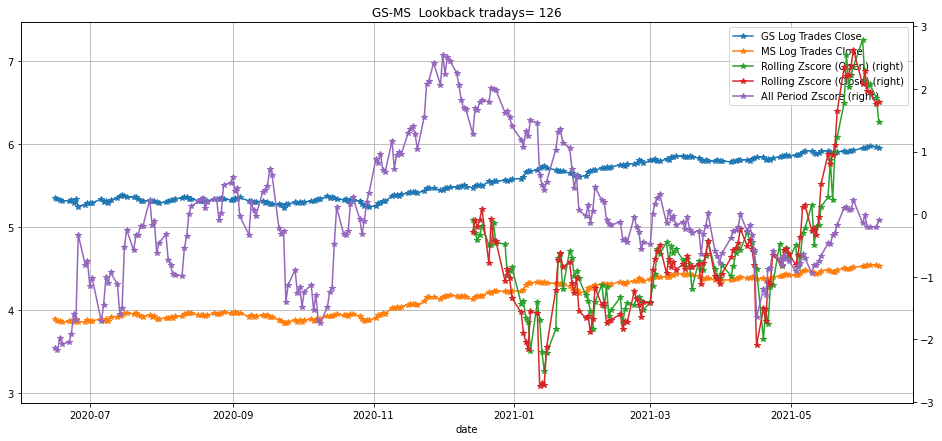

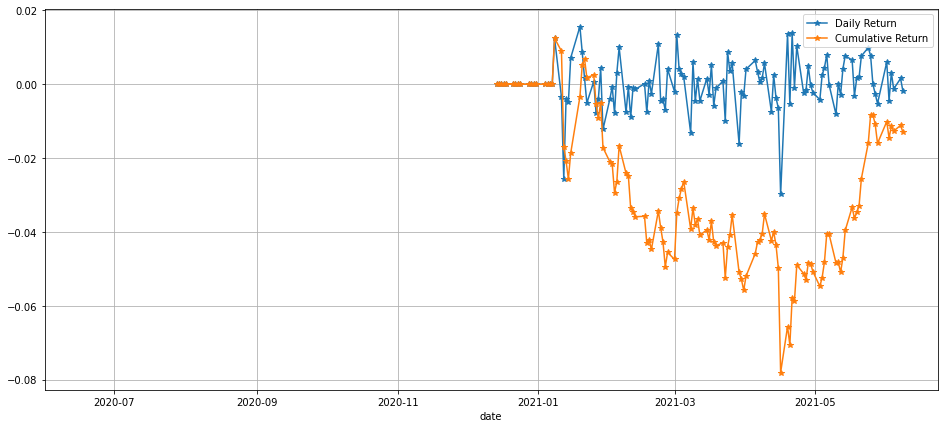

In [63]:
pair = ['GS', 'MS']
look_back = "2 Y"
num_strategy_look_back = 126
resolution = "1 day"
margin = 0.5
hedge_ratio_range = [0.1, 10]
entry_point_pos = 2
entry_point_neg = -2
exit_point_pos = 0.1
exit_point_neg = -0.1
leverage = 1.5
cash_initial = 2000
limit_stop_loss = -0.2
if_friction = False
if_print_head = True
if_export = True
if_partial_shares = True
if_visualize = True
extra_column_to_plot = []
start_time = datetime.strptime("2020-12-14", '%Y-%m-%d').date()
end_time = datetime.strptime("2021-06-08", '%Y-%m-%d').date()
control_dict = {"start_time":str(start_time), "end_time":str(end_time), \
                "look_back":look_back, "num_strategy_look_back":num_strategy_look_back, \
                "resolution":resolution, "margin":margin, "entry_point_pos":entry_point_pos, \
                "entry_point_neg":entry_point_neg, "exit_point_pos":exit_point_pos, \
                "exit_point_neg":exit_point_neg, "leverage":leverage, "cash_initial":cash_initial, \
                "limit_stop_loss":limit_stop_loss}
[history_price, history_operation, history_log, if_success] = initialize_back_test_pair (pair, look_back, num_strategy_look_back, resolution, start_time, end_time)
# if if_success == False:
#     pair_not_available.append(pair)
#     continue
[history_operation, history_log, log_all, warning_msg] = \
    back_test_pair (pair, history_price, history_operation, leverage, cash_initial, limit_stop_loss, \
    entry_point_pos, entry_point_neg, exit_point_pos, exit_point_neg, num_strategy_look_back, resolution, margin, hedge_ratio_range, if_partial_shares, if_friction)
statistics_back_test = postprocess_back_test_pair(pair, history_operation, control_dict, log_all, warning_msg, if_print_head, if_export, if_visualize, extra_column_to_plot = [])

In [64]:
options_all = []
for friction_str in ['with_friction', 'no_friction']:
    for entry_point_pos in [2, 1.5, 1]:
        for exit_point_pos in [0, 0.2, 0.5]:
            options_all.append([friction_str, entry_point_pos, exit_point_pos])

In [36]:
statistics_back_test_all_pairs_all_params = []
index = 16
description = []

for [friction_str, entry_point_pos, exit_point_pos] in options_all[index:]:
    description.append(friction_str + '_entry_pos_' + str(entry_point_pos) + '_exit_pos_' + str(exit_point_pos))
    index += 1
    sheet_str = 'test_' + str(index)
    statistics_back_test_all_pairs = []
    pair_not_available = []
    for pair in Pairs_all_adf_p + Pairs_all_adf_p_reverse:
    #for pair in [["GS","MS"],["SPY","QQQ"]]:
        look_back = "2 Y"
        num_strategy_look_back = 126
        resolution = "1 day"
        margin = 0.5
        hedge_ratio_range = [0.1, 10]
        entry_point_neg = - entry_point_pos
        exit_point_neg = -exit_point_pos
        #entry_point_pos = 2
        #entry_point_neg = -2
        #exit_point_pos = 0.1
        #exit_point_neg = -0.1
        leverage = 1.5
        cash_initial = 2000
        limit_stop_loss = -0.2
        #if_friction = False
        if_friction = (friction_str == 'with_friction')
        if_print_head = True
        if_export = False
        if_partial_shares = False
        if_visualize = False
        extra_column_to_plot = []
        start_time = datetime.strptime("2020-12-14", '%Y-%m-%d').date()
        end_time = datetime.strptime("2021-06-08", '%Y-%m-%d').date()
        control_dict = {"start_time":str(start_time), "end_time":str(end_time), \
                        "look_back":look_back, "num_strategy_look_back":num_strategy_look_back, \
                        "resolution":resolution, "margin":margin, "entry_point_pos":entry_point_pos, \
                        "entry_point_neg":entry_point_neg, "exit_point_pos":exit_point_pos, \
                        "exit_point_neg":exit_point_neg, "leverage":leverage, "cash_initial":cash_initial, \
                        "limit_stop_loss":limit_stop_loss}
        [history_price, history_operation, history_log, if_success] = initialize_back_test_pair (pair, look_back, num_strategy_look_back, resolution, start_time, end_time)
        if if_success == False:
            pair_not_available.append(pair)
            continue
        [history_operation, history_log, log_all, warning_msg] = \
            back_test_pair (pair, history_price, history_operation, leverage, cash_initial, limit_stop_loss, \
            entry_point_pos, entry_point_neg, exit_point_pos, exit_point_neg, num_strategy_look_back, resolution, margin, hedge_ratio_range, if_partial_shares, if_friction)
        statistics_back_test = postprocess_back_test_pair(pair, history_operation, control_dict, log_all, warning_msg, if_print_head, if_export, if_visualize, extra_column_to_plot = [])
        statistics_back_test_all_pairs.append(statistics_back_test)
    statistics_back_test_all_pairs_all_params.append(statistics_back_test_all_pairs)
    all_output_back_test = pd.DataFrame(statistics_back_test_all_pairs)
    with pd.ExcelWriter("all_output_back_test" + ".xlsx", engine = 'openpyxl', mode=('w' if index == 1 else'a')) as writer:  
        all_output_back_test.to_excel(writer, sheet_name=sheet_str)
    print("current index is " + str(index))
    print(description)
print("\n All test parameters:")
print(description)

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FCNCA', 'CIT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FCNCA', 'CIT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 105.14999999999873, 'final_return': 0.052574999999999365, 'sharp_ratio': 2.7384206622468388, 'period_end_date': '2021-06-04', 'period_PnL': 104.83999999999855, 'period_final_return': 0.05241999999999928, 'period_tradays': 118, 'period_daily_return': 0.0004442372881355871, 'period_sharp_ratio': 2.85748945736128, 'friction_all ': 0.0, 'max_daily_PnL': 46.879999999999654, 'min_daily_PnL': -13.819999999999709, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FRO', 'EURN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FRO', 'EURN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 227.34999999999673, 'final_return': 0.11367499999999836, 'sharp_ratio': 2.7287636073008303, 'period_end_date': '2021-06-07', 'period_PnL': 227.34999999999673, 'period_final_return': 0.11367499999999836, 'period_tradays': 119, 'period_daily_return': 0.0009552521008403224, 'period_sharp_ratio': 2.7382811230935773, 'friction_all ': 0.0, 'max_daily_PnL': 101.42999999999961, 'min_daily_PnL': -85.64999999999986, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CIM', 'LADR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CIM', 'LADR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -73.74999999999818, 'final_return': -0.03687499999999909, 'sharp_ratio': -1.840494637544725, 'period_end_date': '2021-04-27', 'period_PnL': -12.339999999997872, 'period_final_return': -0.006169999999998936, 'period_tradays': 91, 'period_daily_return': -6.780219780218611e-05, 'period_sharp_ratio': -0.3036360463954494, 'friction_all ': 0.0, 'max_daily_PnL': 63.940000000000055, 'min_daily_PnL': -76.74000000000024, 'max_

Proper history is not available for stock pair ['DDOG', 'WK']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MRCY', 'AEIS'] from 2020-12-14 to 2021-06-08, there are 2 days of Margin Call and 88 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MRCY', 'AEIS']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -417.13686916941606, 'final_return': -0.20856843458470803, 'sharp_ratio': -2.72875024009944, 'period_end_date': '2021-06-08', 'period_PnL': -417.13686916941606, 'period_final_return': -0.20856843458470803, 'period_tradays': 120, 'period_daily_return': -0.0017380702882059003, 'period_sharp_ratio': -2.72875024009

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DX', 'LADR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DX', 'LADR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -51.28999999999871, 'final_return': -0.025644999999999356, 'sharp_ratio': -1.7008636110263877, 'period_end_date': '2021-06-08', 'period_PnL': -51.28999999999871, 'period_final_return': -0.025644999999999356, 'period_tradays': 120, 'period_daily_return': -0.00021370833333332796, 'period_sharp_ratio': -1.7008636110263877, 'friction_all ': 0.0, 'max_daily_PnL': 59.41000000000008, 'min_daily_PnL': -60.460000000000036, 'max

C:\Users\24270\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['OKE', 'HEP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['OKE', 'HEP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -343.0100000000002, 'final_return': -0.1715050000000001, 'sharp_ratio': -2.149016514818599, 'period_end_date': '2021-02-05', 'period_PnL': 0.0, 'period_final_return': 0.0, 'period_tradays': 36, 'period_daily_return': 0.0, 'period_sharp_ratio': -inf, 'friction_all ': 0.0, 'max_daily_PnL': 53.94999999999948, 'min_daily_PnL': -100.37999999999965, 'max_daily_return': 0.031928496058593554, 'min_daily_return': -0.05028352736

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TROW', 'CNS'] from 2020-12-14 to 2021-06-08, there are 20 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['TROW', 'CNS']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -252.2485044639941, 'final_return': -0.12612425223199705, 'sharp_ratio': -2.703950534251335, 'period_end_date': '2021-05-04', 'period_PnL': -9.499999999997954, 'period_final_return': -0.004749999999998976, 'period_tradays': 96, 'period_daily_return': -4.9479166666656006e-05, 'period_sharp_ratio': -0.12781525578021222, 'friction_all ': 0.0, 'max_daily_PnL': 60.8900000000001, 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FMX', 'KOF'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FMX', 'KOF']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 526.7700000000023, 'final_return': 0.26338500000000115, 'sharp_ratio': 3.072756315134933, 'period_end_date': '2021-06-04', 'period_PnL': 526.7700000000023, 'period_final_return': 0.26338500000000115, 'period_tradays': 118, 'period_daily_return': 0.0022320762711864504, 'period_sharp_ratio': 3.0898989482481056, 'friction_all ': 0.0, 'max_daily_PnL': 92.88000000000011, 'min_daily_PnL': -36.759999999999536, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TFC', 'CMA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TFC', 'CMA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 21.99000000000001, 'final_return': 0.010995000000000005, 'sharp_ratio': 0.40414195205669207, 'period_end_date': '2021-04-20', 'period_PnL': 47.76999999999998, 'period_final_return': 0.02388499999999999, 'period_tradays': 86, 'period_daily_return': 0.00027773255813953474, 'period_sharp_ratio': 0.9211234872162795, 'friction_all ': 0.0, 'max_daily_PnL': 34.41000000000008, 'min_daily_PnL': -38.559999999999945, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WRK', 'GPK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WRK', 'GPK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 172.36999999999955, 'final_return': 0.08618499999999978, 'sharp_ratio': 1.306398283447947, 'period_end_date': '2021-05-17', 'period_PnL': 235.10999999999945, 'period_final_return': 0.11755499999999973, 'period_tradays': 105, 'period_daily_return': 0.001119571428571426, 'period_sharp_ratio': 1.724903856724578, 'friction_all ': 0.0, 'max_daily_PnL': 52.720000000000255, 'min_daily_PnL': -84.55999999999949, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ROST', 'BURL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ROST', 'BURL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -204.97999999999877, 'final_return': -0.10248999999999939, 'sharp_ratio': -2.0018199033438093, 'period_end_date': '2021-05-11', 'period_PnL': -204.09999999999854, 'period_final_return': -0.10204999999999927, 'period_tradays': 101, 'period_daily_return': -0.0010103960396039531, 'period_sharp_ratio': -1.8938798062844604, 'friction_all ': 0.0, 'max_daily_PnL': 48.09999999999968, 'min_daily_PnL': -156.14999999999964, '

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPC', 'GPK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPC', 'GPK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 112.55000000000109, 'final_return': 0.05627500000000055, 'sharp_ratio': 1.5454636732683198, 'period_end_date': '2021-05-17', 'period_PnL': 120.60000000000093, 'period_final_return': 0.060300000000000464, 'period_tradays': 105, 'period_daily_return': 0.0005742857142857187, 'period_sharp_ratio': 1.7079887070030033, 'friction_all ': 0.0, 'max_daily_PnL': 59.50000000000023, 'min_daily_PnL': -55.529999999999745, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WY', 'PCH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WY', 'PCH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 371.54999999999995, 'final_return': 0.18577499999999997, 'sharp_ratio': 2.8485206859079284, 'period_end_date': '2021-05-04', 'period_PnL': 386.83000000000106, 'period_final_return': 0.19341500000000053, 'period_tradays': 96, 'period_daily_return': 0.002014739583333339, 'period_sharp_ratio': 3.2320066399256278, 'friction_all ': 0.0, 'max_daily_PnL': 87.50000000000023, 'min_daily_PnL': -49.61999999999989, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FB', 'GOOG'] from 2020-12-14 to 2021-06-08, there are 2 days of Margin Call and 40 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FB', 'GOOG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -415.51277696462614, 'final_return': -0.20775638848231306, 'sharp_ratio': -2.640974552967534, 'period_end_date': '2021-06-08', 'period_PnL': -415.51277696462614, 'period_final_return': -0.20775638848231306, 'period_tradays': 120, 'period_daily_return': -0.001731303237352609, 'period_sharp_ratio': -2.640974552967534, 'friction_all ': 0.0, 'max_daily_PnL': 57.45999999999981, 'min_daily_PnL': -145.6400000000001, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CHH', 'FUN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CHH', 'FUN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -172.90999999999906, 'final_return': -0.08645499999999953, 'sharp_ratio': -2.689201933238818, 'period_end_date': '2021-05-07', 'period_PnL': -44.83999999999901, 'period_final_return': -0.022419999999999503, 'period_tradays': 99, 'period_daily_return': -0.00022646464646464145, 'period_sharp_ratio': -0.6672308748810251, 'friction_all ': 0.0, 'max_daily_PnL': 72.05999999999995, 'min_daily_PnL': -108.26999999999998, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WH', 'ARMK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WH', 'ARMK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -85.28999999999758, 'final_return': -0.04264499999999879, 'sharp_ratio': -0.988138811591958, 'period_end_date': '2021-03-09', 'period_PnL': 216.19000000000062, 'period_final_return': 0.10809500000000032, 'period_tradays': 57, 'period_daily_return': 0.0018964035087719355, 'period_sharp_ratio': 2.8497237470975305, 'friction_all ': 0.0, 'max_daily_PnL': 82.09999999999957, 'min_daily_PnL': -64.27999999999997, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ZS', 'AVLR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ZS', 'AVLR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -355.5600000000001, 'final_return': -0.17778000000000005, 'sharp_ratio': -2.6920075671039547, 'period_end_date': '2021-02-22', 'period_PnL': -22.450000000000387, 'period_final_return': -0.011225000000000193, 'period_tradays': 46, 'period_daily_return': -0.00024402173913043898, 'period_sharp_ratio': -0.3503601619942991, 'friction_all ': 0.0, 'max_daily_PnL': 122.10000000000015, 'min_daily_PnL': -138.23999999999978, 'max

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LRCX', 'KLAC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LRCX', 'KLAC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -0.8699999999998909, 'final_return': -0.0004349999999999454, 'sharp_ratio': -0.033293636284180306, 'period_end_date': '2021-04-06', 'period_PnL': 77.2199999999998, 'period_final_return': 0.0386099999999999, 'period_tradays': 76, 'period_daily_return': 0.0005080263157894723, 'period_sharp_ratio': 1.6659348501194415, 'friction_all ': 0.0, 'max_daily_PnL': 48.600000000000136, 'min_daily_PnL': -56.73999999999978, 'max_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CFG', 'CMA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CFG', 'CMA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 171.27000000000044, 'final_return': 0.08563500000000022, 'sharp_ratio': 4.151988242695872, 'period_end_date': '2021-05-13', 'period_PnL': 171.4599999999998, 'period_final_return': 0.0857299999999999, 'period_tradays': 103, 'period_daily_return': 0.0008323300970873777, 'period_sharp_ratio': 5.015876866884653, 'friction_all ': 0.0, 'max_daily_PnL': 33.36000000000013, 'min_daily_PnL': -19.7800000000002, 'max_daily_return'

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CCEP', 'NOMD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['CCEP', 'NOMD']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 197.77000000000157, 'final_return': 0.09888500000000079, 'sharp_ratio': 1.6306953791119714, 'period_end_date': '2021-05-21', 'period_PnL': 191.37000000000194, 'period_final_return': 0.09568500000000096, 'period_tradays': 109, 'period_daily_return': 0.0008778440366972566, 'period_sharp_ratio': 1.541610741235729, 'friction_all ': 0.0, 'max_daily_PnL': 104.75, 'min_daily_PnL': -78.6

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FSM', 'SILV'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FSM', 'SILV']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 755.7127999999987, 'final_return': 0.3778563999999993, 'sharp_ratio': 2.8218629849891026, 'period_end_date': '2021-04-12', 'period_PnL': 597.0627999999981, 'period_final_return': 0.29853139999999906, 'period_tradays': 80, 'period_daily_return': 0.0037316424999999883, 'period_sharp_ratio': 2.5769100422354443, 'friction_all ': 0.0, 'max_daily_PnL': 338.85000000000036, 'min_daily_PnL': -134.34999999999968, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RS', 'NGVT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RS', 'NGVT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -221.7199999999998, 'final_return': -0.1108599999999999, 'sharp_ratio': -1.7413640540088962, 'period_end_date': '2021-04-30', 'period_PnL': -219.25999999999908, 'period_final_return': -0.10962999999999955, 'period_tradays': 94, 'period_daily_return': -0.001166276595744676, 'period_sharp_ratio': -1.7681963068882005, 'friction_all ': 0.0, 'max_daily_PnL': 55.67000000000007, 'min_daily_PnL': -56.53000000000043, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['F', 'GM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['F', 'GM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 103.9300000000012, 'final_return': 0.0519650000000006, 'sharp_ratio': 1.6166591566023758, 'period_end_date': '2021-05-18', 'period_PnL': 176.42000000000053, 'period_final_return': 0.08821000000000026, 'period_tradays': 106, 'period_daily_return': 0.0008321698113207572, 'period_sharp_ratio': 3.1004125994378167, 'friction_all ': 0.0, 'max_daily_PnL': 123.56000000000017, 'min_daily_PnL': -86.98000000000025, 'max_daily_return': 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MTSI', 'POWI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['MTSI', 'POWI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 415.2799999999984, 'final_return': 0.2076399999999992, 'sharp_ratio': 3.1909573184516753, 'period_end_date': '2021-05-26', 'period_PnL': 415.2799999999984, 'period_final_return': 0.2076399999999992, 'period_tradays': 112, 'period_daily_return': 0.001853928571428564, 'period_sharp_ratio': 3.3796328968386486, 'friction_all ': 0.0, 'max_daily_PnL': 109.18000000000029, 'min_daily_PnL': -76.25999999999999, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['APLE', 'XHR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['APLE', 'XHR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 1.8399999999986676, 'final_return': 0.0009199999999993338, 'sharp_ratio': 0.0218936249990897, 'period_end_date': '2021-04-06', 'period_PnL': 48.53000000000168, 'period_final_return': 0.024265000000000838, 'period_tradays': 76, 'period_daily_return': 0.0003192763157894847, 'period_sharp_ratio': 0.7465783773803539, 'friction_all ': 0.0, 'max_daily_PnL': 96.25999999999988, 'min_daily_PnL': -82.64999999999998, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TMO', 'DHR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TMO', 'DHR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 125.74999999999886, 'final_return': 0.06287499999999943, 'sharp_ratio': 2.011546068116925, 'period_end_date': '2021-04-07', 'period_PnL': 221.46999999999866, 'period_final_return': 0.11073499999999933, 'period_tradays': 77, 'period_daily_return': 0.0014381168831168745, 'period_sharp_ratio': 3.727495583931915, 'friction_all ': 0.0, 'max_daily_PnL': 40.320000000000164, 'min_daily_PnL': -51.8900000000001, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CC', 'TROX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CC', 'TROX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 219.7199999999998, 'final_return': 0.1098599999999999, 'sharp_ratio': 1.5097865005872988, 'period_end_date': '2021-06-08', 'period_PnL': 219.7199999999998, 'period_final_return': 0.1098599999999999, 'period_tradays': 120, 'period_daily_return': 0.0009154999999999992, 'period_sharp_ratio': 1.5097865005872988, 'friction_all ': 0.0, 'max_daily_PnL': 86.35000000000002, 'min_daily_PnL': -93.51999999999998, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DHT', 'FRO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DHT', 'FRO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -89.12999999999852, 'final_return': -0.04456499999999926, 'sharp_ratio': -1.577056933101414, 'period_end_date': '2021-04-21', 'period_PnL': -6.829999999998563, 'period_final_return': -0.0034149999999992815, 'period_tradays': 87, 'period_daily_return': -3.9252873563210134e-05, 'period_sharp_ratio': -0.13682303284602493, 'friction_all ': 0.0, 'max_daily_PnL': 58.100000000000136, 'min_daily_PnL': -64.52000000000066, 'max_

Proper history is not available for stock pair ['BMEZ', 'BSTZ']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['IP', 'AAP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['IP', 'AAP']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 366.64000000000306, 'final_return': 0.18332000000000154, 'sharp_ratio': 1.4131272076394727, 'period_end_date': '2021-05-05', 'period_PnL': 480.3100000000027, 'period_final_return': 0.24015500000000134, 'period_tradays': 97, 'period_daily_return': 0.002475824742268055, 'period_sharp_ratio': 1.6796275660561593, 'friction_al

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ALL', 'SIGI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ALL', 'SIGI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 267.3700000000001, 'final_return': 0.13368500000000005, 'sharp_ratio': 1.8069755029899093, 'period_end_date': '2021-04-13', 'period_PnL': 439.4399999999998, 'period_final_return': 0.21971999999999992, 'period_tradays': 81, 'period_daily_return': 0.0027125925925925915, 'period_sharp_ratio': 2.7252571303330364, 'friction_all ': 0.0, 'max_daily_PnL': 71.65999999999985, 'min_daily_PnL': -44.63000000000034, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EVR', 'MC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EVR', 'MC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -187.64999999999702, 'final_return': -0.0938249999999985, 'sharp_ratio': -2.370529531319793, 'period_end_date': '2021-04-07', 'period_PnL': -126.16999999999803, 'period_final_return': -0.06308499999999902, 'period_tradays': 77, 'period_daily_return': -0.0008192857142857016, 'period_sharp_ratio': -1.6948733738298096, 'friction_all ': 0.0, 'max_daily_PnL': 105.20000000000027, 'min_daily_PnL': -74.53999999999996, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CMCSA', 'CABO'] from 2020-12-14 to 2021-06-08, there are 12 days of Margin Call and 13 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['CMCSA', 'CABO']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -739.7833432985392, 'final_return': -0.3698916716492696, 'sharp_ratio': -2.8450841164053515, 'period_end_date': '2021-06-08', 'period_PnL': -739.7833432985392, 'period_final_return': -0.3698916716492696, 'period_tradays': 120, 'period_daily_return': -0.0030824305970772467, 'period_sharp_ratio': -2.8450841164053515, 'friction_all ': 0.0, 'max_daily_PnL': 348.009999999998

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NHI', 'UMH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 23 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NHI', 'UMH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -433.09999999999934, 'final_return': -0.21654999999999966, 'sharp_ratio': -2.3368335588228835, 'period_end_date': '2021-06-08', 'period_PnL': -433.09999999999934, 'period_final_return': -0.21654999999999966, 'period_tradays': 120, 'period_daily_return': -0.0018045833333333306, 'period_sharp_ratio': -2.3368335588228835, 'friction_all ': 0.0, 'max_daily_PnL': 109.67999999999984, 'min_daily_PnL': -66.48999999999978, 'max

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DAL', 'LUV'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DAL', 'LUV']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 30.32000000000062, 'final_return': 0.015160000000000309, 'sharp_ratio': 0.3509310132007195, 'period_end_date': '2021-06-08', 'period_PnL': 30.32000000000062, 'period_final_return': 0.015160000000000309, 'period_tradays': 120, 'period_daily_return': 0.0001263333333333359, 'period_sharp_ratio': 0.3509310132007195, 'friction_all ': 0.0, 'max_daily_PnL': 40.01999999999998, 'min_daily_PnL': -60.97999999999956, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LXP', 'IRT'] from 2020-12-14 to 2021-06-08, there are 29 days of Margin Call and 92 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['LXP', 'IRT']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -409.99795188974304, 'final_return': -0.20499897594487151, 'sharp_ratio': -2.1968139223073644, 'period_end_date': '2021-06-08', 'period_PnL': -409.99795188974304, 'period_final_return': -0.20499897594487151, 'period_tradays': 120, 'period_daily_return': -0.001708324799540596, 'period_sharp_ratio': -2.1968139223073644, 'friction_all ': 0.0, 'max_daily_PnL': 199.75200039859828,

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CMG', 'YUMC'] from 2020-12-14 to 2021-06-08, there are 1 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['CMG', 'YUMC']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 166.61000000000013, 'final_return': 0.08330500000000006, 'sharp_ratio': 0.8039726443567292, 'period_end_date': '2021-04-27', 'period_PnL': 603.8900000000008, 'period_final_return': 0.3019450000000004, 'period_tradays': 91, 'period_daily_return': 0.0033180769230769275, 'period_sharp_ratio': 3.073115351586494, 'friction_all ': 0.0, 'max_daily_PnL': 93.67999999999984, 'min_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CHTR', 'AMX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CHTR', 'AMX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 28.630000000001473, 'final_return': 0.014315000000000737, 'sharp_ratio': 0.3559579995140729, 'period_end_date': '2021-05-27', 'period_PnL': 106.83000000000084, 'period_final_return': 0.05341500000000042, 'period_tradays': 113, 'period_daily_return': 0.0004726991150442515, 'period_sharp_ratio': 1.4069343347087409, 'friction_all ': 0.0, 'max_daily_PnL': 104.41000000000008, 'min_daily_PnL': -83.52999999999997, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SAGE', 'ITCI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 80 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['SAGE', 'ITCI']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -420.9900000000009, 'final_return': -0.21049500000000046, 'sharp_ratio': -2.576425188316604, 'period_end_date': '2021-06-08', 'period_PnL': -420.9900000000009, 'period_final_return': -0.21049500000000046, 'period_tradays': 120, 'period_daily_return': -0.0017541250000000037, 'period_sharp_ratio': -2.576425188316604, 'friction_all ': 0.0, 'max_daily_PnL': 70.75000000000045, 'min_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LVS', 'WYNN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LVS', 'WYNN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -53.23999999999921, 'final_return': -0.026619999999999606, 'sharp_ratio': -0.8605227778617827, 'period_end_date': '2021-04-19', 'period_PnL': 41.94000000000062, 'period_final_return': 0.02097000000000031, 'period_tradays': 85, 'period_daily_return': 0.00024670588235294484, 'period_sharp_ratio': 0.6335700363259672, 'friction_all ': 0.0, 'max_daily_PnL': 62.339999999999804, 'min_daily_PnL': -62.980000000000246, 'max_da

Proper history is not available for stock pair ['VIAC', 'DISCK']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ELAN', 'MOH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['ELAN', 'MOH']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -170.8299999999989, 'final_return': -0.08541499999999945, 'sharp_ratio': -1.5456786998916245, 'period_end_date': '2021-06-08', 'period_PnL': -170.8299999999989, 'period_final_return': -0.08541499999999945, 'period_tradays': 120, 'period_daily_return': -0.0007117916666666621, 'period_sharp_ratio': -1.5456786998916245,

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PBR', 'UGP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PBR', 'UGP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 348.7200000000014, 'final_return': 0.1743600000000007, 'sharp_ratio': 2.936876029189436, 'period_end_date': '2021-05-10', 'period_PnL': 383.98000000000206, 'period_final_return': 0.19199000000000102, 'period_tradays': 100, 'period_daily_return': 0.0019199000000000102, 'period_sharp_ratio': 4.5589589511069155, 'friction_all ': 0.0, 'max_daily_PnL': 160.04999999999927, 'min_daily_PnL': -92.16999999999985, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AEM', 'KL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AEM', 'KL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 79.47000000000116, 'final_return': 0.03973500000000058, 'sharp_ratio': 1.101991417854782, 'period_end_date': '2021-05-10', 'period_PnL': 115.56000000000131, 'period_final_return': 0.05778000000000066, 'period_tradays': 100, 'period_daily_return': 0.0005778000000000066, 'period_sharp_ratio': 1.7278983363792864, 'friction_all ': 0.0, 'max_daily_PnL': 97.65999999999985, 'min_daily_PnL': -50.44999999999959, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HTGC', 'RA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HTGC', 'RA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -51.03999999999917, 'final_return': -0.025519999999999585, 'sharp_ratio': -0.6219803834386062, 'period_end_date': '2021-06-08', 'period_PnL': -51.03999999999917, 'period_final_return': -0.025519999999999585, 'period_tradays': 120, 'period_daily_return': -0.0002126666666666632, 'period_sharp_ratio': -0.6219803834386062, 'friction_all ': 0.0, 'max_daily_PnL': 61.95999999999958, 'min_daily_PnL': -59.09999999999991, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HBAN', 'KEY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HBAN', 'KEY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -43.829999999999245, 'final_return': -0.021914999999999622, 'sharp_ratio': -0.9584829757303027, 'period_end_date': '2021-04-19', 'period_PnL': 138.62999999999897, 'period_final_return': 0.06931499999999949, 'period_tradays': 85, 'period_daily_return': 0.0008154705882352881, 'period_sharp_ratio': 4.038982862592934, 'friction_all ': 0.0, 'max_daily_PnL': 42.92000000000007, 'min_daily_PnL': -63.08999999999969, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FDX', 'AAWW'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['FDX', 'AAWW']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 141.6200000000016, 'final_return': 0.0708100000000008, 'sharp_ratio': 0.9048665644150072, 'period_end_date': '2021-03-30', 'period_PnL': 411.2900000000001, 'period_final_return': 0.20564500000000005, 'period_tradays': 72, 'period_daily_return': 0.0028561805555555562, 'period_sharp_ratio': 2.2862245180168337, 'friction_all ': 0.0, 'max_daily_PnL': 124.56000000000051, 'min_daily_PnL'

Error 162, reqId 4101: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 4103: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 4105: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbo

Proper history is not available for stock pair ['SNX', 'SMCI']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HBAN', 'CFG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HBAN', 'CFG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -2.1300000000021555, 'final_return': -0.0010650000000010777, 'sharp_ratio': -0.03495867784855428, 'period_end_date': '2021-04-20', 'period_PnL': 203.08999999999833, 'period_final_return': 0.10154499999999916, 'period_tradays': 86, 'period_daily_return': 0.0011807558139534787, 'period_sharp_ratio': 2.395710781545838, 'friction_all ': 0.0, 'max_daily_PnL':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ITUB', 'PBR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ITUB', 'PBR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 357.6799999999989, 'final_return': 0.17883999999999947, 'sharp_ratio': 1.8422777342364545, 'period_end_date': '2021-06-01', 'period_PnL': 357.6799999999989, 'period_final_return': 0.17883999999999947, 'period_tradays': 115, 'period_daily_return': 0.001555130434782604, 'period_sharp_ratio': 1.8396906743241608, 'friction_all ': 0.0, 'max_daily_PnL': 249.02999999999997, 'min_daily_PnL': -87.45999999999981, 'max_daily_re

C:\Users\24270\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BBD', 'PBR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BBD', 'PBR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 37.660000000001446, 'final_return': 0.018830000000000725, 'sharp_ratio': 0.45664101045939726, 'period_end_date': '2020-12-30', 'period_PnL': 0.0, 'period_final_return': 0.0, 'period_tradays': 11, 'period_daily_return': 0.0, 'period_sharp_ratio': -inf, 'friction_all ': 0.0, 'max_daily_PnL': 219.52499999999986, 'min_daily_PnL': -72.47000000000003, 'max_daily_return': 0.11040477980652436, 'min_daily_return': -0.0322621572

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BLD', 'IBP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BLD', 'IBP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 173.24999999999864, 'final_return': 0.08662499999999931, 'sharp_ratio': 2.0656759217046914, 'period_end_date': '2021-05-12', 'period_PnL': 191.05999999999744, 'period_final_return': 0.09552999999999873, 'period_tradays': 102, 'period_daily_return': 0.000936568627450968, 'period_sharp_ratio': 2.6787844851304143, 'friction_all ': 0.0, 'max_daily_PnL': 160.60000000000014, 'min_daily_PnL': -81.05999999999995, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PNR', 'LECO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PNR', 'LECO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 474.31000000000085, 'final_return': 0.23715500000000042, 'sharp_ratio': 4.497628745310452, 'period_end_date': '2021-06-08', 'period_PnL': 474.31000000000085, 'period_final_return': 0.23715500000000042, 'period_tradays': 120, 'period_daily_return': 0.00197629166666667, 'period_sharp_ratio': 4.497628745310452, 'friction_all ': 0.0, 'max_daily_PnL': 58.649999999999864, 'min_daily_PnL': -40.86999999999989, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ECL', 'SCL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ECL', 'SCL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -164.87000000000046, 'final_return': -0.08243500000000023, 'sharp_ratio': -2.032428169804217, 'period_end_date': '2021-02-05', 'period_PnL': 61.8299999999997, 'period_final_return': 0.03091499999999985, 'period_tradays': 36, 'period_daily_return': 0.0008587499999999958, 'period_sharp_ratio': 1.5016409623895552, 'friction_all ': 0.0, 'max_daily_PnL': 75.07000000000016, 'min_daily_PnL': -105.63000000000011, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SPR', 'HXL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SPR', 'HXL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 167.70999999999913, 'final_return': 0.08385499999999957, 'sharp_ratio': 1.4265673725238568, 'period_end_date': '2021-06-04', 'period_PnL': 167.70999999999913, 'period_final_return': 0.08385499999999957, 'period_tradays': 118, 'period_daily_return': 0.0007106355932203353, 'period_sharp_ratio': 1.4370237723087291, 'friction_all ': 0.0, 'max_daily_PnL': 77.44999999999993, 'min_daily_PnL': -86.29999999999995, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CCL', 'RCL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CCL', 'RCL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 427.4999999999993, 'final_return': 0.21374999999999966, 'sharp_ratio': 2.586797862332398, 'period_end_date': '2021-06-07', 'period_PnL': 427.4999999999993, 'period_final_return': 0.21374999999999966, 'period_tradays': 119, 'period_daily_return': 0.0017962184873949552, 'period_sharp_ratio': 2.5975077748125117, 'friction_all ': 0.0, 'max_daily_PnL': 135.7199999999997, 'min_daily_PnL': -137.44000000000028, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HLF', 'NUS'] from 2020-12-14 to 2021-06-08, there are 4 days of Margin Call and 105 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['HLF', 'NUS']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -490.147732569435, 'final_return': -0.2450738662847175, 'sharp_ratio': -3.2365153573801932, 'period_end_date': '2021-06-08', 'period_PnL': -490.147732569435, 'period_final_return': -0.2450738662847175, 'period_tradays': 120, 'period_daily_return': -0.0020422822190393126, 'period_sharp_ratio': -3.2365153573801932, 'friction_all ': 0.0, 'max_daily_PnL': 27.0600000000004, 'min_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ING', 'SAN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ING', 'SAN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -217.37999999999874, 'final_return': -0.10868999999999937, 'sharp_ratio': -2.220701454608899, 'period_end_date': '2021-05-05', 'period_PnL': -169.65999999999985, 'period_final_return': -0.08482999999999993, 'period_tradays': 97, 'period_daily_return': -0.0008745360824742261, 'period_sharp_ratio': -1.6559259517563198, 'friction_all ': 0.0, 'max_daily_PnL': 117.11000000000013, 'min_daily_PnL': -84.93000000000029, 'max_da

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SILV', 'SVM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SILV', 'SVM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -138.85999999999916, 'final_return': -0.06942999999999958, 'sharp_ratio': -0.983755153065695, 'period_end_date': '2021-06-08', 'period_PnL': -138.85999999999916, 'period_final_return': -0.06942999999999958, 'period_tradays': 120, 'period_daily_return': -0.0005785833333333298, 'period_sharp_ratio': -0.983755153065695, 'friction_all ': 0.0, 'max_daily_PnL': 482.28999999999974, 'min_daily_PnL': -271.4299999999998, 'max_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMAT', 'LRCX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMAT', 'LRCX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -28.27000000000021, 'final_return': -0.014135000000000104, 'sharp_ratio': -0.4167678109892356, 'period_end_date': '2021-05-20', 'period_PnL': -28.27000000000021, 'period_final_return': -0.014135000000000104, 'period_tradays': 108, 'period_daily_return': -0.00013087962962963058, 'period_sharp_ratio': -0.4035493109605679, 'friction_all ': 0.0, 'max_daily_PnL': 64.27999999999952, 'min_daily_PnL': -59.049999999999955, 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['VLO', 'PSX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['VLO', 'PSX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -7.169999999999163, 'final_return': -0.0035849999999995816, 'sharp_ratio': -0.29490739614324435, 'period_end_date': '2021-06-03', 'period_PnL': 6.090000000000828, 'period_final_return': 0.0030450000000004137, 'period_tradays': 117, 'period_daily_return': 2.6025641025644562e-05, 'period_sharp_ratio': 0.20652027194616718, 'friction_all ': 0.0, 'max_daily_PnL': 46.38999999999987, 'min_daily_PnL': -47.51000000000022, 'max_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MC', 'PJT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 66 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MC', 'PJT']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -421.6800000000003, 'final_return': -0.21084000000000014, 'sharp_ratio': -2.9615610462100093, 'period_end_date': '2021-06-08', 'period_PnL': -421.6800000000003, 'period_final_return': -0.21084000000000014, 'period_tradays': 120, 'period_daily_return': -0.0017570000000000012, 'period_sharp_ratio': -2.9615610462100093, 'friction_all ': 0.0, 'max_daily_PnL': 80.08000000000015, 'min

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['IP', 'GPK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['IP', 'GPK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 30.589999999999236, 'final_return': 0.015294999999999618, 'sharp_ratio': 0.29331667460020266, 'period_end_date': '2021-05-14', 'period_PnL': 151.88999999999987, 'period_final_return': 0.07594499999999994, 'period_tradays': 104, 'period_daily_return': 0.0007302403846153841, 'period_sharp_ratio': 1.3935420543131918, 'friction_all ': 0.0, 'max_daily_PnL': 50.220000000000255, 'min_daily_PnL': -75.82999999999993, 'max_daily_r

Proper history is not available for stock pair ['UBER', 'BSY']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ALL', 'HMN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['ALL', 'HMN']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -274.8200000000006, 'final_return': -0.1374100000000003, 'sharp_ratio': -2.5587574064397827, 'period_end_date': '2021-03-23', 'period_PnL': 15.41999999999939, 'period_final_return': 0.007709999999999695, 'period_tradays': 67, 'period_daily_return': 0.0001150746268656671, 'period_sharp_ratio': 0.47637049474541976, '

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NOW', 'GDDY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NOW', 'GDDY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 28.000000000001023, 'final_return': 0.014000000000000512, 'sharp_ratio': 0.36195152265740776, 'period_end_date': '2021-03-19', 'period_PnL': 210.6799999999996, 'period_final_return': 0.10533999999999981, 'period_tradays': 65, 'period_daily_return': 0.0016206153846153816, 'period_sharp_ratio': 3.1832333053120183, 'friction_all ': 0.0, 'max_daily_PnL': 160.08999999999946, 'min_daily_PnL': -156.47000000000003, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CVGW', 'UVV'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CVGW', 'UVV']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 84.82000000000153, 'final_return': 0.042410000000000767, 'sharp_ratio': 0.7457041233032936, 'period_end_date': '2021-03-11', 'period_PnL': 238.28000000000156, 'period_final_return': 0.11914000000000079, 'period_tradays': 59, 'period_daily_return': 0.0020193220338983182, 'period_sharp_ratio': 1.8446954634273705, 'friction_all ': 0.0, 'max_daily_PnL': 81.69000000000005, 'min_daily_PnL': -86.42000000000007, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HLT', 'MAR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HLT', 'MAR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 235.83000000000106, 'final_return': 0.11791500000000053, 'sharp_ratio': 2.93063195794265, 'period_end_date': '2021-05-10', 'period_PnL': 250.74000000000046, 'period_final_return': 0.12537000000000023, 'period_tradays': 100, 'period_daily_return': 0.0012537000000000023, 'period_sharp_ratio': 3.0650156426450192, 'friction_all ': 0.0, 'max_daily_PnL': 44.619999999999436, 'min_daily_PnL': -30.890000000000327, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EURN', 'DHT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EURN', 'DHT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 258.5099999999994, 'final_return': 0.1292549999999997, 'sharp_ratio': 3.0850884913213594, 'period_end_date': '2021-06-08', 'period_PnL': 258.5099999999994, 'period_final_return': 0.1292549999999997, 'period_tradays': 120, 'period_daily_return': 0.0010771249999999976, 'period_sharp_ratio': 3.0850884913213594, 'friction_all ': 0.0, 'max_daily_PnL': 195.88999999999987, 'min_daily_PnL': -104.77000000000021, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LHCG', 'AMED'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LHCG', 'AMED']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 257.27000000000055, 'final_return': 0.12863500000000028, 'sharp_ratio': 2.0447586206058572, 'period_end_date': '2021-05-19', 'period_PnL': 245.1700000000002, 'period_final_return': 0.1225850000000001, 'period_tradays': 107, 'period_daily_return': 0.0011456542056074775, 'period_sharp_ratio': 2.191058697992757, 'friction_all ': 0.0, 'max_daily_PnL': 79.00000000000045, 'min_daily_PnL': -52.23999999999978, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ARI', 'STWD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ARI', 'STWD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -5.960000000001401, 'final_return': -0.0029800000000007004, 'sharp_ratio': -0.21840044155070715, 'period_end_date': '2021-04-21', 'period_PnL': 73.42999999999961, 'period_final_return': 0.0367149999999998, 'period_tradays': 87, 'period_daily_return': 0.0004220114942528713, 'period_sharp_ratio': 2.463640134657629, 'friction_all ': 0.0, 'max_daily_PnL': 35.919999999999845, 'min_daily_PnL': -32.44999999999959, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BOKF', 'VLY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BOKF', 'VLY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 53.85000000000059, 'final_return': 0.026925000000000296, 'sharp_ratio': 0.7789163634689817, 'period_end_date': '2021-03-10', 'period_PnL': 167.92999999999984, 'period_final_return': 0.08396499999999991, 'period_tradays': 58, 'period_daily_return': 0.0014476724137931019, 'period_sharp_ratio': 1.9403632655023972, 'friction_all ': 0.0, 'max_daily_PnL': 48.94000000000051, 'min_daily_PnL': -59.66000000000008, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LADR', 'ARI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LADR', 'ARI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -130.86999999999784, 'final_return': -0.06543499999999892, 'sharp_ratio': -1.6749324706332558, 'period_end_date': '2021-02-08', 'period_PnL': 53.049999999999955, 'period_final_return': 0.026524999999999976, 'period_tradays': 37, 'period_daily_return': 0.0007168918918918913, 'period_sharp_ratio': 3.1746591725480706, 'friction_all ': 0.0, 'max_daily_PnL': 58.87000000000012, 'min_daily_PnL': -40.35999999999967, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WRK', 'AAP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['WRK', 'AAP']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 485.5600000000029, 'final_return': 0.24278000000000144, 'sharp_ratio': 1.9039690893382204, 'period_end_date': '2021-05-13', 'period_PnL': 458.0600000000027, 'period_final_return': 0.22903000000000134, 'period_tradays': 103, 'period_daily_return': 0.0022235922330097217, 'period_sharp_ratio': 1.6754628023409166, 'friction_all ': 0.0, 'max_daily_PnL': 173.88999999999987, 'min_daily_PnL'

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PKX', 'BBL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 76 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PKX', 'BBL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -433.02000000000044, 'final_return': -0.21651000000000023, 'sharp_ratio': -3.2464150907309133, 'period_end_date': '2021-06-08', 'period_PnL': -433.02000000000044, 'period_final_return': -0.21651000000000023, 'period_tradays': 120, 'period_daily_return': -0.0018042500000000018, 'period_sharp_ratio': -3.2464150907309133, 'friction_all ': 0.0, 'max_daily_PnL': 59.400000000000205, 'min_daily_PnL': -103.65999999999985, 'ma

C:\Users\24270\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPK', 'WRK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPK', 'WRK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -208.47000000000037, 'final_return': -0.10423500000000019, 'sharp_ratio': -2.9902880654945223, 'period_end_date': '2021-02-16', 'period_PnL': 0.0, 'period_final_return': 0.0, 'period_tradays': 42, 'period_daily_return': 0.0, 'period_sharp_ratio': -inf, 'friction_all ': 0.0, 'max_daily_PnL': 49.190000000000055, 'min_daily_PnL': -51.68000000000029, 'max_daily_return': 0.024668264746296534, 'min_daily_return': -0.02591166

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BURL', 'ROST'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BURL', 'ROST']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 26.869999999998072, 'final_return': 0.013434999999999036, 'sharp_ratio': 0.36188630173331926, 'period_end_date': '2021-05-18', 'period_PnL': 54.46999999999821, 'period_final_return': 0.027234999999999104, 'period_tradays': 106, 'period_daily_return': 0.0002569339622641425, 'period_sharp_ratio': 0.7107163105811963, 'friction_all ': 0.0, 'max_daily_PnL': 57.319999999999936, 'min_daily_PnL': -153.8900000000001, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPK', 'GPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPK', 'GPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -108.93000000000575, 'final_return': -0.05446500000000287, 'sharp_ratio': -0.9060776438338812, 'period_end_date': '2021-02-19', 'period_PnL': 328.32999999999834, 'period_final_return': 0.16416499999999917, 'period_tradays': 45, 'period_daily_return': 0.003648111111111093, 'period_sharp_ratio': 2.7622372949481733, 'friction_all ': 0.0, 'max_daily_PnL': 70.26000000000022, 'min_daily_PnL': -117.46000000000004, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PCH', 'WY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PCH', 'WY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 380.9000000000001, 'final_return': 0.19045000000000004, 'sharp_ratio': 3.393319989732235, 'period_end_date': '2021-05-14', 'period_PnL': 347.1600000000003, 'period_final_return': 0.17358000000000015, 'period_tradays': 104, 'period_daily_return': 0.001669038461538463, 'period_sharp_ratio': 3.5427329895742474, 'friction_all ': 0.0, 'max_daily_PnL': 64.26000000000022, 'min_daily_PnL': -46.57999999999993, 'max_daily_return':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GOOG', 'FB'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['GOOG', 'FB']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -173.43999999999983, 'final_return': -0.08671999999999991, 'sharp_ratio': -1.3898200257219424, 'period_end_date': '2021-03-16', 'period_PnL': 217.12000000000012, 'period_final_return': 0.10856000000000006, 'period_tradays': 62, 'period_daily_return': 0.0017509677419354848, 'period_sharp_ratio': 2.0870147715163085, 'friction_all ': 0.0, 'max_daily_PnL': 125.15999999999985, 'min_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FUN', 'CHH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FUN', 'CHH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 202.0699999999996, 'final_return': 0.10103499999999979, 'sharp_ratio': 1.088374020286844, 'period_end_date': '2021-04-22', 'period_PnL': 510.7500000000001, 'period_final_return': 0.2553750000000001, 'period_tradays': 88, 'period_daily_return': 0.002901988636363637, 'period_sharp_ratio': 3.151356936042299, 'friction_all ': 0.0, 'max_daily_PnL': 89.22999999999979, 'min_daily_PnL': -122.28999999999951, 'max_daily_return':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ARMK', 'WH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ARMK', 'WH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -272.1600000000017, 'final_return': -0.13608000000000084, 'sharp_ratio': -1.6872291885003412, 'period_end_date': '2020-12-31', 'period_PnL': 134.48999999999955, 'period_final_return': 0.06724499999999978, 'period_tradays': 12, 'period_daily_return': 0.005603749999999981, 'period_sharp_ratio': 3.3687077253056055, 'friction_all ': 0.0, 'max_daily_PnL': 97.17000000000007, 'min_daily_PnL': -79.29000000000042, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AVLR', 'ZS'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AVLR', 'ZS']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -257.15999999999894, 'final_return': -0.12857999999999947, 'sharp_ratio': -2.860121227859457, 'period_end_date': '2021-05-25', 'period_PnL': -265.9399999999986, 'period_final_return': -0.13296999999999928, 'period_tradays': 111, 'period_daily_return': -0.0011979279279279215, 'period_sharp_ratio': -2.8484524241874554, 'friction_all ': 0.0, 'max_daily_PnL': 71.38999999999965, 'min_daily_PnL': -67.82999999999993, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KLAC', 'LRCX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KLAC', 'LRCX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -41.289999999999054, 'final_return': -0.02064499999999953, 'sharp_ratio': -0.7084253178090232, 'period_end_date': '2021-04-05', 'period_PnL': 157.56000000000063, 'period_final_return': 0.07878000000000031, 'period_tradays': 75, 'period_daily_return': 0.001050400000000004, 'period_sharp_ratio': 3.384280054818484, 'friction_all ': 0.0, 'max_daily_PnL': 54.49999999999977, 'min_daily_PnL': -63.0300000000002, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CMA', 'CFG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CMA', 'CFG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 261.6899999999994, 'final_return': 0.13084499999999968, 'sharp_ratio': 4.106510737557872, 'period_end_date': '2021-05-12', 'period_PnL': 266.5799999999997, 'period_final_return': 0.13328999999999985, 'period_tradays': 102, 'period_daily_return': 0.0013067647058823515, 'period_sharp_ratio': 4.965161364660814, 'friction_all ': 0.0, 'max_daily_PnL': 36.340000000000146, 'min_daily_PnL': -15.930000000000064, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NOMD', 'CCEP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NOMD', 'CCEP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -48.870000000001255, 'final_return': -0.024435000000000626, 'sharp_ratio': -0.6171600002280393, 'period_end_date': '2021-06-07', 'period_PnL': -48.870000000001255, 'period_final_return': -0.024435000000000626, 'period_tradays': 119, 'period_daily_return': -0.00020533613445378678, 'period_sharp_ratio': -0.6168171557794666, 'friction_all ': 0.0, 'max_daily_PnL': 99.35000000000036, 'min_daily_PnL': -127.64000000000033

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SILV', 'FSM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SILV', 'FSM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 170.97000000000025, 'final_return': 0.08548500000000013, 'sharp_ratio': 1.8254693188622657, 'period_end_date': '2021-04-26', 'period_PnL': 229.03000000000065, 'period_final_return': 0.11451500000000032, 'period_tradays': 90, 'period_daily_return': 0.0012723888888888926, 'period_sharp_ratio': 3.275942277283814, 'friction_all ': 0.0, 'max_daily_PnL': 146.12000000000012, 'min_daily_PnL': -94.96000000000026, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NGVT', 'RS'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NGVT', 'RS']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -205.67999999999972, 'final_return': -0.10283999999999986, 'sharp_ratio': -1.7076579634352274, 'period_end_date': '2021-06-07', 'period_PnL': -205.67999999999972, 'period_final_return': -0.10283999999999986, 'period_tradays': 119, 'period_daily_return': -0.0008642016806722678, 'period_sharp_ratio': -1.704902202269732, 'friction_all ': 0.0, 'max_daily_PnL': 55.88000000000034, 'min_daily_PnL': -68.62000000000012, 'max_da

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GM', 'F'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GM', 'F']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -135.71999999999684, 'final_return': -0.06785999999999842, 'sharp_ratio': -2.036041795537562, 'period_end_date': '2021-05-18', 'period_PnL': 1.2700000000029377, 'period_final_return': 0.0006350000000014688, 'period_tradays': 106, 'period_daily_return': 5.990566037749706e-06, 'period_sharp_ratio': 0.010523394647742957, 'friction_all ': 0.0, 'max_daily_PnL': 59.820000000000164, 'min_daily_PnL': -85.57999999999993, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['POWI', 'MTSI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['POWI', 'MTSI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 224.96999999999935, 'final_return': 0.11248499999999967, 'sharp_ratio': 3.2370164302262774, 'period_end_date': '2021-05-27', 'period_PnL': 224.96999999999935, 'period_final_return': 0.11248499999999967, 'period_tradays': 113, 'period_daily_return': 0.0009954424778761033, 'period_sharp_ratio': 3.3091708040976813, 'friction_all ': 0.0, 'max_daily_PnL': 108.34000000000037, 'min_daily_PnL': -70.17000000000007, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XHR', 'APLE'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XHR', 'APLE']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 21.430000000000746, 'final_return': 0.010715000000000374, 'sharp_ratio': 0.49167244282051636, 'period_end_date': '2021-04-01', 'period_PnL': 89.50000000000114, 'period_final_return': 0.04475000000000057, 'period_tradays': 74, 'period_daily_return': 0.0006047297297297374, 'period_sharp_ratio': 2.0965054603724047, 'friction_all ': 0.0, 'max_daily_PnL': 50.40000000000032, 'min_daily_PnL': -86.73000000000002, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DHR', 'TMO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DHR', 'TMO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -110.15000000000134, 'final_return': -0.05507500000000067, 'sharp_ratio': -1.4597755091109246, 'period_end_date': '2021-03-19', 'period_PnL': 156.40999999999894, 'period_final_return': 0.07820499999999947, 'period_tradays': 65, 'period_daily_return': 0.001203153846153838, 'period_sharp_ratio': 3.3277968885077764, 'friction_all ': 0.0, 'max_daily_PnL': 53.570000000000164, 'min_daily_PnL': -79.65999999999985, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TROX', 'CC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TROX', 'CC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 266.55000000000314, 'final_return': 0.13327500000000156, 'sharp_ratio': 1.2278759743127017, 'period_end_date': '2021-04-12', 'period_PnL': 678.5300000000004, 'period_final_return': 0.3392650000000002, 'period_tradays': 80, 'period_daily_return': 0.004240812500000002, 'period_sharp_ratio': 3.477590448830819, 'friction_all ': 0.0, 'max_daily_PnL': 157.17999999999938, 'min_daily_PnL': -173.76999999999975, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FRO', 'DHT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FRO', 'DHT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -150.14999999999964, 'final_return': -0.07507499999999982, 'sharp_ratio': -1.689487885571861, 'period_end_date': '2021-06-03', 'period_PnL': -150.14999999999964, 'period_final_return': -0.07507499999999982, 'period_tradays': 117, 'period_daily_return': -0.0006416666666666652, 'period_sharp_ratio': -1.669500901257056, 'friction_all ': 0.0, 'max_daily_PnL': 80.67000000000007, 'min_daily_PnL': -99.59000000000015, 'max_dai

Proper history is not available for stock pair ['BSTZ', 'BMEZ']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AAP', 'IP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AAP', 'IP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -63.57999999999879, 'final_return': -0.031789999999999395, 'sharp_ratio': -0.8900871535699865, 'period_end_date': '2021-04-28', 'period_PnL': 98.40000000000055, 'period_final_return': 0.04920000000000027, 'period_tradays': 92, 'period_daily_return': 0.0005347826086956551, 'period_sharp_ratio': 1.5656656082668603, 'friction_all ': 0.0, 'max_daily_PnL': 157.3

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SIGI', 'ALL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SIGI', 'ALL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -140.10000000000002, 'final_return': -0.07005000000000002, 'sharp_ratio': -1.8837697689758568, 'period_end_date': '2021-03-24', 'period_PnL': 38.88999999999976, 'period_final_return': 0.01944499999999988, 'period_tradays': 68, 'period_daily_return': 0.0002859558823529394, 'period_sharp_ratio': 0.7943223265857493, 'friction_all ': 0.0, 'max_daily_PnL': 51.05000000000018, 'min_daily_PnL': -37.960000000000264, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MC', 'EVR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['MC', 'EVR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 36.06000000000199, 'final_return': 0.018030000000000997, 'sharp_ratio': 0.5979830150272226, 'period_end_date': '2021-03-31', 'period_PnL': 124.70000000000164, 'period_final_return': 0.06235000000000082, 'period_tradays': 73, 'period_daily_return': 0.0008541095890411072, 'period_sharp_ratio': 2.3958731289782054, 'friction_all ': 0.0, 'max_daily_PnL': 65.25, 'min_daily_PnL': -85.81999999999971, 'max_daily_return': 0.032852

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CABO', 'CMCSA'] from 2020-12-14 to 2021-06-08, there are 29 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['CABO', 'CMCSA']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 677.9538246768375, 'final_return': 0.33897691233841876, 'sharp_ratio': 3.276214554480905, 'period_end_date': '2021-05-21', 'period_PnL': 298.6572604009689, 'period_final_return': 0.14932863020048445, 'period_tradays': 109, 'period_daily_return': 0.0013699874330319675, 'period_sharp_ratio': 2.1343184006189504, 'friction_all ': 0.0, 'max_daily_PnL': 271.0182253383432, 'min

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['UMH', 'NHI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['UMH', 'NHI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -265.7899999999993, 'final_return': -0.13289499999999965, 'sharp_ratio': -2.6270775438618803, 'period_end_date': '2021-03-29', 'period_PnL': 79.1000000000015, 'period_final_return': 0.03955000000000075, 'period_tradays': 71, 'period_daily_return': 0.0005570422535211373, 'period_sharp_ratio': 1.870335274904743, 'friction_all ': 0.0, 'max_daily_PnL': 71.97000000000043, 'min_daily_PnL': -72.11999999999966, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LUV', 'DAL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LUV', 'DAL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -23.9900000000016, 'final_return': -0.0119950000000008, 'sharp_ratio': -0.29993714233447455, 'period_end_date': '2021-06-08', 'period_PnL': -23.9900000000016, 'period_final_return': -0.0119950000000008, 'period_tradays': 120, 'period_daily_return': -9.995833333334e-05, 'period_sharp_ratio': -0.29993714233447455, 'friction_all ': 0.0, 'max_daily_PnL': 50.809999999999945, 'min_daily_PnL': -52.99999999999977, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['IRT', 'LXP'] from 2020-12-14 to 2021-06-08, there are 18 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['IRT', 'LXP']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 317.4848016461747, 'final_return': 0.15874240082308733, 'sharp_ratio': 3.357738625302155, 'period_end_date': '2021-06-07', 'period_PnL': 317.4848016461747, 'period_final_return': 0.15874240082308733, 'period_tradays': 119, 'period_daily_return': 0.00133396975481586, 'period_sharp_ratio': 3.3460638443560087, 'friction_all ': 0.0, 'max_daily_PnL': 129.8100000000004, 'min_daily_P

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['YUMC', 'CMG'] from 2020-12-14 to 2021-06-08, there are 2 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['YUMC', 'CMG']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 196.79156039250773, 'final_return': 0.09839578019625386, 'sharp_ratio': 1.4309907210154216, 'period_end_date': '2021-05-05', 'period_PnL': 374.9400000000003, 'period_final_return': 0.18747000000000014, 'period_tradays': 97, 'period_daily_return': 0.0019326804123711355, 'period_sharp_ratio': 2.678566353508111, 'friction_all ': 0.0, 'max_daily_PnL': 84.17999999999984, 'min_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMX', 'CHTR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMX', 'CHTR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 476.0500000000006, 'final_return': 0.2380250000000003, 'sharp_ratio': 2.9084250847236133, 'period_end_date': '2021-06-04', 'period_PnL': 468.90000000000003, 'period_final_return': 0.23445000000000002, 'period_tradays': 118, 'period_daily_return': 0.0019868644067796612, 'period_sharp_ratio': 2.8789540923132098, 'friction_all ': 0.0, 'max_daily_PnL': 85.07999999999947, 'min_daily_PnL': -79.63000000000034, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ITCI', 'SAGE'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['ITCI', 'SAGE']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 543.820000000002, 'final_return': 0.271910000000001, 'sharp_ratio': 2.1184191413651923, 'period_end_date': '2021-04-08', 'period_PnL': 598.9100000000013, 'period_final_return': 0.2994550000000007, 'period_tradays': 78, 'period_daily_return': 0.0038391666666666756, 'period_sharp_ratio': 3.1932634208763226, 'friction_all ': 0.0, 'max_daily_PnL': 200.86000000000035, 'min_daily_PnL':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WYNN', 'LVS'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WYNN', 'LVS']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 57.07000000000153, 'final_return': 0.028535000000000765, 'sharp_ratio': 0.7574300185537812, 'period_end_date': '2021-05-04', 'period_PnL': 141.32000000000107, 'period_final_return': 0.07066000000000054, 'period_tradays': 96, 'period_daily_return': 0.0007360416666666723, 'period_sharp_ratio': 1.7442894763266656, 'friction_all ': 0.0, 'max_daily_PnL': 91.92999999999938, 'min_daily_PnL': -75.03000000000009, 'max_daily_r

Proper history is not available for stock pair ['DISCK', 'VIAC']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MOH', 'ELAN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['MOH', 'ELAN']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 206.2099999999997, 'final_return': 0.10310499999999985, 'sharp_ratio': 1.6349564186718586, 'period_end_date': '2021-05-06', 'period_PnL': 354.24999999999966, 'period_final_return': 0.17712499999999984, 'period_tradays': 98, 'period_daily_return': 0.0018073979591836718, 'period_sharp_ratio': 2.787044968838026, 'fricti

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['UGP', 'PBR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['UGP', 'PBR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 640.8599999999974, 'final_return': 0.3204299999999987, 'sharp_ratio': 2.268243079474819, 'period_end_date': '2021-05-10', 'period_PnL': 776.799999999999, 'period_final_return': 0.3883999999999995, 'period_tradays': 100, 'period_daily_return': 0.003883999999999995, 'period_sharp_ratio': 2.873608055422389, 'friction_all ': 0.0, 'max_daily_PnL': 167.62000000000012, 'min_daily_PnL': -104.05000000000018, 'max_daily_return':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KL', 'AEM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KL', 'AEM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 311.3799999999969, 'final_return': 0.15568999999999847, 'sharp_ratio': 2.525187304000537, 'period_end_date': '2021-05-10', 'period_PnL': 335.3199999999979, 'period_final_return': 0.16765999999999895, 'period_tradays': 100, 'period_daily_return': 0.0016765999999999895, 'period_sharp_ratio': 3.0094092761589186, 'friction_all ': 0.0, 'max_daily_PnL': 110.77000000000021, 'min_daily_PnL': -50.47999999999979, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RA', 'HTGC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RA', 'HTGC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 60.77999999999747, 'final_return': 0.030389999999998737, 'sharp_ratio': 1.5306874007472426, 'period_end_date': '2021-06-07', 'period_PnL': 60.77999999999747, 'period_final_return': 0.030389999999998737, 'period_tradays': 119, 'period_daily_return': 0.0002553781512604936, 'period_sharp_ratio': 1.5509533031314573, 'friction_all ': 0.0, 'max_daily_PnL': 55.409999999999854, 'min_daily_PnL': -66.9100000000002, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KEY', 'HBAN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KEY', 'HBAN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 6.779999999999973, 'final_return': 0.0033899999999999863, 'sharp_ratio': 0.11791679066194993, 'period_end_date': '2021-04-20', 'period_PnL': 195.9000000000001, 'period_final_return': 0.09795000000000005, 'period_tradays': 86, 'period_daily_return': 0.0011389534883720937, 'period_sharp_ratio': 3.867425323948248, 'friction_all ': 0.0, 'max_daily_PnL': 42.400000000000546, 'min_daily_PnL': -66.42000000000007, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AAWW', 'FDX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['AAWW', 'FDX']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 267.52999999999884, 'final_return': 0.1337649999999994, 'sharp_ratio': 4.103175444981985, 'period_end_date': '2021-06-04', 'period_PnL': 267.52999999999884, 'period_final_return': 0.1337649999999994, 'period_tradays': 118, 'period_daily_return': 0.0011336016949152492, 'period_sharp_ratio': 4.11238019176972, 'friction_all ': 0.0, 'max_daily_PnL': 71.66999999999962, 'min_daily_PnL': 

Error 162, reqId 8619: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MODN', 'PRO'] from 2020-12-14 to 2021-06-08, there are 4 days of Margin Call and 117 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MODN', 'PRO']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -453.8501349506246, 'final_return': -0.2269250674753123, 'sharp_ratio': -15.042621547240554, 'period_end_date': '2021-06-08', 'period_PnL': -453.8501349506246, 'period_final_return': -0.2269250674753123, 'period_tradays': 120, 'period_daily_return': -0.0018910422289609358, 'period_sharp_ratio': -15.042621547240554, 'friction_all ': 0.0, 'max_daily_PnL': 0.0, 'min_daily_PnL'

Error 162, reqId 8621: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 8623: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')


Proper history is not available for stock pair ['SMCI', 'SNX']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CFG', 'HBAN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CFG', 'HBAN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 42.39000000000078, 'final_return': 0.02119500000000039, 'sharp_ratio': 0.5096262256787896, 'period_end_date': '2021-04-20', 'period_PnL': 252.32000000000085, 'period_final_return': 0.1261600000000004, 'period_tradays': 86, 'period_daily_return': 0.0014669767441860514, 'period_sharp_ratio': 2.78993169654757, 'friction_all ': 0.0, 'max_daily_PnL': 54.42999

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PBR', 'ITUB'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PBR', 'ITUB']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 410.43999999999915, 'final_return': 0.20521999999999957, 'sharp_ratio': 2.186139039404394, 'period_end_date': '2021-05-19', 'period_PnL': 431.0699999999986, 'period_final_return': 0.21553499999999928, 'period_tradays': 107, 'period_daily_return': 0.0020143457943925165, 'period_sharp_ratio': 2.276167686485469, 'friction_all ': 0.0, 'max_daily_PnL': 235.99, 'min_daily_PnL': -89.14999999999964, 'max_daily_return': 0.115

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RYAAY', 'BA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RYAAY', 'BA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 360.880000000001, 'final_return': 0.18044000000000052, 'sharp_ratio': 4.404200960103596, 'period_end_date': '2021-05-26', 'period_PnL': 360.880000000001, 'period_final_return': 0.18044000000000052, 'period_tradays': 112, 'period_daily_return': 0.0016110714285714333, 'period_sharp_ratio': 4.6163132226211605, 'friction_all ': 0.0, 'max_daily_PnL': 124.70000000000005, 'min_daily_PnL': -116.20000000000005, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EOG', 'PXD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EOG', 'PXD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 8.750000000000455, 'final_return': 0.004375000000000228, 'sharp_ratio': 0.11424105147993507, 'period_end_date': '2021-04-01', 'period_PnL': 89.36999999999989, 'period_final_return': 0.04468499999999995, 'period_tradays': 74, 'period_daily_return': 0.0006038513513513507, 'period_sharp_ratio': 1.56963564610089, 'friction_all ': 0.0, 'max_daily_PnL': 114.31000000000017, 'min_daily_PnL': -99.53999999999974, 'max_daily_retu

C:\Users\24270\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XLNX', 'AMD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XLNX', 'AMD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -20.000000000001023, 'final_return': -0.010000000000000512, 'sharp_ratio': -1.0053111555817615, 'period_end_date': '2021-02-22', 'period_PnL': 0.0, 'period_final_return': 0.0, 'period_tradays': 46, 'period_daily_return': 0.0, 'period_sharp_ratio': -inf, 'friction_all ': 0.0, 'max_daily_PnL': 53.30000000000018, 'min_daily_PnL': -57.23000000000002, 'max_daily_return': 0.027762441011323843, 'min_daily_return': -0.028512

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SNN', 'SYK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['SNN', 'SYK']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -124.19000000000244, 'final_return': -0.06209500000000122, 'sharp_ratio': -1.7254364736686825, 'period_end_date': '2021-02-02', 'period_PnL': -13.749999999999545, 'period_final_return': -0.006874999999999773, 'period_tradays': 33, 'period_daily_return': -0.00020833333333332643, 'period_sharp_ratio': -0.3752300167656727, 'friction_all ': 0.0, 'max_daily_PnL': 68.03999999999996, 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ADBE', 'MSFT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 42 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['ADBE', 'MSFT']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -421.0899999999999, 'final_return': -0.21054499999999995, 'sharp_ratio': -2.4210036471755427, 'period_end_date': '2021-06-08', 'period_PnL': -421.0899999999999, 'period_final_return': -0.21054499999999995, 'period_tradays': 120, 'period_daily_return': -0.0017545416666666662, 'period_sharp_ratio': -2.4210036471755427, 'friction_all ': 0.0, 'max_daily_PnL': 71.15000000000055

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WRK', 'GPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WRK', 'GPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 286.0599999999977, 'final_return': 0.14302999999999882, 'sharp_ratio': 2.64859573185666, 'period_end_date': '2021-06-08', 'period_PnL': 286.0599999999977, 'period_final_return': 0.14302999999999882, 'period_tradays': 120, 'period_daily_return': 0.0011919166666666569, 'period_sharp_ratio': 2.64859573185666, 'friction_all ': 0.0, 'max_daily_PnL': 80.12000000000035, 'min_daily_PnL': -119.7800000000002, 'max_daily_return':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CIM', 'STWD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CIM', 'STWD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -42.80000000000109, 'final_return': -0.021400000000000547, 'sharp_ratio': -0.7753788109098552, 'period_end_date': '2021-05-03', 'period_PnL': 124.63999999999919, 'period_final_return': 0.0623199999999996, 'period_tradays': 95, 'period_daily_return': 0.0006559999999999958, 'period_sharp_ratio': 2.109877558791577, 'friction_all ': 0.0, 'max_daily_PnL': 49.41999999999962, 'min_daily_PnL': -87.45999999999958, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NTCT', 'CIEN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NTCT', 'CIEN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -22.41999999999848, 'final_return': -0.011209999999999241, 'sharp_ratio': -0.37465124836366925, 'period_end_date': '2021-05-27', 'period_PnL': 166.86000000000126, 'period_final_return': 0.08343000000000063, 'period_tradays': 113, 'period_daily_return': 0.000738318584070802, 'period_sharp_ratio': 2.8956622154715457, 'friction_all ': 0.0, 'max_daily_PnL': 90.93999999999983, 'min_daily_PnL': -122.65000000000009, 'max_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XLNX', 'QCOM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XLNX', 'QCOM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 431.4500000000005, 'final_return': 0.21572500000000025, 'sharp_ratio': 2.8542119885506567, 'period_end_date': '2021-06-01', 'period_PnL': 431.4500000000005, 'period_final_return': 0.21572500000000025, 'period_tradays': 115, 'period_daily_return': 0.0018758695652173936, 'period_sharp_ratio': 2.9158840801750427, 'friction_all ': 0.0, 'max_daily_PnL': 143.03999999999996, 'min_daily_PnL': -42.460000000000264, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GGG', 'SWK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GGG', 'SWK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -192.60000000000014, 'final_return': -0.09630000000000007, 'sharp_ratio': -2.3722141329961772, 'period_end_date': '2021-03-01', 'period_PnL': 70.0600000000004, 'period_final_return': 0.0350300000000002, 'period_tradays': 51, 'period_daily_return': 0.0006868627450980432, 'period_sharp_ratio': 1.290336907627565, 'friction_all ': 0.0, 'max_daily_PnL': 65.6400000000001, 'min_daily_PnL': -65.97000000000003, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NTCT', 'JNPR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NTCT', 'JNPR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 79.92000000000417, 'final_return': 0.039960000000002084, 'sharp_ratio': 0.6371460048053388, 'period_end_date': '2021-03-03', 'period_PnL': 350.1100000000001, 'period_final_return': 0.17505500000000007, 'period_tradays': 53, 'period_daily_return': 0.003302924528301888, 'period_sharp_ratio': 2.274039551320993, 'friction_all ': 0.0, 'max_daily_PnL': 130.53499999999985, 'min_daily_PnL': -78.91999999999962, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ALK', 'DAL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ALK', 'DAL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 10.449999999997999, 'final_return': 0.0052249999999989995, 'sharp_ratio': 0.3185504580069504, 'period_end_date': '2021-06-08', 'period_PnL': 10.449999999997999, 'period_final_return': 0.0052249999999989995, 'period_tradays': 120, 'period_daily_return': 4.354166666665833e-05, 'period_sharp_ratio': 0.3185504580069504, 'friction_all ': 0.0, 'max_daily_PnL': 55.190000000000055, 'min_daily_PnL': -67.47000000000003, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HMN', 'SIGI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['HMN', 'SIGI']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -326.9200000000001, 'final_return': -0.16346000000000005, 'sharp_ratio': -3.2623788363070276, 'period_end_date': 'No EXIT Signal', 'period_PnL': -326.9200000000001, 'period_final_return': -0.16346000000000005, 'period_tradays': 120, 'period_daily_return': -0.0013621666666666671, 'period_sharp_ratio': -3.2623788363070276, 'friction_all ': 0.0, 'max_daily_PnL': 61.26000000000022, 'mi

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.2, 'exit_point_neg': -0.2, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DX', 'ARI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DX', 'ARI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 97.40000000000134, 'final_return': 0.04870000000000067, 'sharp_ratio': 1.3401463685900756, 'period_end_date': '2021-05-20', 'period_PnL': 80.92000000000098, 'period_final_return': 0.04046000000000049, 'period_tradays': 108, 'period_daily_return': 0.00037462962962963415, 'period_sharp_ratio': 1.3776001837580722, 'friction_all ': 0.0, 'max_daily_PnL': 48.47999999999979, 'min_daily_PnL': -72.51999999999964, 'max_daily_retur

Proper history is not available for stock pair ['ABEV', 'NTCO']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ESS', 'UDR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ESS', 'UDR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 204.45000000000005, 'final_return': 0.10222500000000002, 'sharp_ratio': 2.795609992079676, 'period_end_date': '2021-05-12', 'period_PnL': 199.81000000000017, 'period_final_return': 0.09990500000000009, 'period_tradays': 102, 'period_daily_return': 0.0009794607843137263, 'period_sharp_ratio': 2.8596738532188173, 'friction_all ': 0.0, 'max_daily_PnL': 42.99

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EVR', 'PIPR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EVR', 'PIPR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 10.960000000001742, 'final_return': 0.0054800000000008705, 'sharp_ratio': 0.09576041260352341, 'period_end_date': '2021-05-05', 'period_PnL': 171.65000000000043, 'period_final_return': 0.08582500000000022, 'period_tradays': 97, 'period_daily_return': 0.000884793814432992, 'period_sharp_ratio': 1.5538573348871592, 'friction_all ': 0.0, 'max_daily_PnL': 132.84000000000015, 'min_daily_PnL': -92.20999999999981, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RIO', 'BBL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RIO', 'BBL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 1.810000000000855, 'final_return': 0.0009050000000004275, 'sharp_ratio': 0.05590000488931264, 'period_end_date': '2021-05-18', 'period_PnL': 3.3700000000008004, 'period_final_return': 0.0016850000000004002, 'period_tradays': 106, 'period_daily_return': 1.5896226415098115e-05, 'period_sharp_ratio': 0.12251747323188991, 'friction_all ': 0.0, 'max_daily_PnL': 24.769999999999982, 'min_daily_PnL': -48.69999999999982, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TXRH', 'CBRL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TXRH', 'CBRL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 36.599999999999, 'final_return': 0.0182999999999995, 'sharp_ratio': 0.9308881584528502, 'period_end_date': '2021-05-25', 'period_PnL': 51.53999999999928, 'period_final_return': 0.02576999999999964, 'period_tradays': 111, 'period_daily_return': 0.00023216216216215892, 'period_sharp_ratio': 1.286680362720891, 'friction_all ': 0.0, 'max_daily_PnL': 87.04000000000019, 'min_daily_PnL': -66.58000000000015, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LUV', 'ALK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LUV', 'ALK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 110.59000000000037, 'final_return': 0.055295000000000184, 'sharp_ratio': 2.5142963932313913, 'period_end_date': '2021-06-08', 'period_PnL': 110.59000000000037, 'period_final_return': 0.055295000000000184, 'period_tradays': 120, 'period_daily_return': 0.0004607916666666682, 'period_sharp_ratio': 2.5142963932313913, 'friction_all ': 0.0, 'max_daily_PnL': 44.230000000000246, 'min_daily_PnL': -43.630000000000564, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PJT', 'PIPR'] from 2020-12-14 to 2021-06-08, there are 21 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['PJT', 'PIPR']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -119.84740407167442, 'final_return': -0.05992370203583721, 'sharp_ratio': -0.788307443955606, 'period_end_date': '2021-02-04', 'period_PnL': 336.52999999999906, 'period_final_return': 0.16826499999999953, 'period_tradays': 35, 'period_daily_return': 0.004807571428571415, 'period_sharp_ratio': 5.397995846177484, 'friction_all ': 0.0, 'max_daily_PnL': 167.81777560784667, 'min_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MTG', 'ESNT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['MTG', 'ESNT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 239.1500000000001, 'final_return': 0.11957500000000004, 'sharp_ratio': 2.845187583225195, 'period_end_date': '2021-05-13', 'period_PnL': 240.58000000000038, 'period_final_return': 0.12029000000000019, 'period_tradays': 103, 'period_daily_return': 0.0011678640776699048, 'period_sharp_ratio': 2.8071330461046116, 'friction_all ': 0.0, 'max_daily_PnL': 79.43999999999983, 'min_daily_PnL': -57.5, 'max_daily_return': 0.0399

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NEM', 'AGI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NEM', 'AGI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 211.86000000000013, 'final_return': 0.10593000000000007, 'sharp_ratio': 2.352220537422778, 'period_end_date': '2021-06-07', 'period_PnL': 211.86000000000013, 'period_final_return': 0.10593000000000007, 'period_tradays': 119, 'period_daily_return': 0.0008901680672268913, 'period_sharp_ratio': 2.3478323551385745, 'friction_all ': 0.0, 'max_daily_PnL': 53.889999999999645, 'min_daily_PnL': -54.3299999999997, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MPC', 'VLO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['MPC', 'VLO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 123.05999999999767, 'final_return': 0.061529999999998836, 'sharp_ratio': 2.9826797496955626, 'period_end_date': '2021-06-03', 'period_PnL': 123.05999999999767, 'period_final_return': 0.061529999999998836, 'period_tradays': 117, 'period_daily_return': 0.0005258974358974259, 'period_sharp_ratio': 3.0061888295715598, 'friction_all ': 0.0, 'max_daily_PnL': 53.6099999999999, 'min_daily_PnL': -43.58999999999992, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AAP', 'GPK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AAP', 'GPK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -18.299999999998704, 'final_return': -0.009149999999999351, 'sharp_ratio': -0.5629779927521357, 'period_end_date': '2021-06-07', 'period_PnL': -6.699999999998795, 'period_final_return': -0.0033499999999993973, 'period_tradays': 119, 'period_daily_return': -2.8151260504196616e-05, 'period_sharp_ratio': -0.2176401516361954, 'friction_all ': 0.0, 'max_daily_PnL': 76.97000000000003, 'min_daily_PnL': -64.56000000000017, 'ma

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMAT', 'KLAC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMAT', 'KLAC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -79.8700000000008, 'final_return': -0.0399350000000004, 'sharp_ratio': -1.355805150209675, 'period_end_date': '2021-04-16', 'period_PnL': 45.509999999999536, 'period_final_return': 0.02275499999999977, 'period_tradays': 84, 'period_daily_return': 0.00027089285714285437, 'period_sharp_ratio': 1.0486925283586659, 'friction_all ': 0.0, 'max_daily_PnL': 75.51000000000022, 'min_daily_PnL': -52.72000000000003, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BHP', 'PKX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BHP', 'PKX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 105.80000000000041, 'final_return': 0.052900000000000204, 'sharp_ratio': 1.2207001716185488, 'period_end_date': '2021-06-08', 'period_PnL': 105.80000000000041, 'period_final_return': 0.052900000000000204, 'period_tradays': 120, 'period_daily_return': 0.000440833333333335, 'period_sharp_ratio': 1.2207001716185488, 'friction_all ': 0.0, 'max_daily_PnL': 93.39000000000033, 'min_daily_PnL': -85.44000000000028, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KL', 'AGI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KL', 'AGI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 465.7400000000001, 'final_return': 0.23287000000000005, 'sharp_ratio': 3.81508893874962, 'period_end_date': '2021-06-07', 'period_PnL': 465.7400000000001, 'period_final_return': 0.23287000000000005, 'period_tradays': 119, 'period_daily_return': 0.0019568907563025212, 'period_sharp_ratio': 3.8206121366414756, 'friction_all ': 0.0, 'max_daily_PnL': 102.76999999999998, 'min_daily_PnL': -92.00000000000023, 'max_daily_return'

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CCL', 'NCLH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CCL', 'NCLH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 480.9099999999992, 'final_return': 0.24045499999999959, 'sharp_ratio': 3.3040972464039204, 'period_end_date': '2021-06-07', 'period_PnL': 500.2499999999993, 'period_final_return': 0.25012499999999965, 'period_tradays': 119, 'period_daily_return': 0.002101890756302518, 'period_sharp_ratio': 3.4670834681121647, 'friction_all ': 0.0, 'max_daily_PnL': 108.83000000000038, 'min_daily_PnL': -54.070000000000164, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SAND', 'OR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['SAND', 'OR']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 170.10000000000076, 'final_return': 0.08505000000000038, 'sharp_ratio': 1.240866670312241, 'period_end_date': '2021-04-30', 'period_PnL': 313.0100000000015, 'period_final_return': 0.15650500000000075, 'period_tradays': 94, 'period_daily_return': 0.0016649468085106463, 'period_sharp_ratio': 2.0754718209431204, 'friction_all ': 0.0, 'max_daily_PnL': 141.12000000000006, 'min_daily_PnL':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BYD', 'RRR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BYD', 'RRR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -213.23000000000025, 'final_return': -0.10661500000000013, 'sharp_ratio': -2.2749125733037348, 'period_end_date': '2021-04-27', 'period_PnL': 99.71000000000049, 'period_final_return': 0.049855000000000246, 'period_tradays': 91, 'period_daily_return': 0.0005478571428571456, 'period_sharp_ratio': 1.7072027470063096, 'friction_all ': 0.0, 'max_daily_PnL': 99.48000000000002, 'min_daily_PnL': -108.13999999999987, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ITUB', 'BBD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ITUB', 'BBD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -253.89500000000294, 'final_return': -0.12694750000000146, 'sharp_ratio': -3.1613744221513413, 'period_end_date': '2021-01-26', 'period_PnL': 6.904999999998836, 'period_final_return': 0.003452499999999418, 'period_tradays': 28, 'period_daily_return': 0.00012330357142855064, 'period_sharp_ratio': 0.5849311074126525, 'friction_all ': 0.0, 'max_daily_PnL': 35.19999999999959, 'min_daily_PnL': -42.934999999999945, 'max_da

Proper history is not available for stock pair ['CNXC', 'EGHT']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PCI', 'PTY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PCI', 'PTY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -52.4799999999982, 'final_return': -0.0262399999999991, 'sharp_ratio': -2.156898296976946, 'period_end_date': '2021-05-13', 'period_PnL': 52.33000000000061, 'period_final_return': 0.026165000000000306, 'period_tradays': 103, 'period_daily_return': 0.0002540291262135952, 'period_sharp_ratio': 3.069894278787701, 'friction_all ': 0.0, 'max_daily_PnL': 76.850

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EGP', 'LXP'] from 2020-12-14 to 2021-06-08, there are 5 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['EGP', 'LXP']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 340.3771278206724, 'final_return': 0.1701885639103362, 'sharp_ratio': 2.5704324757074946, 'period_end_date': '2021-06-08', 'period_PnL': 340.3771278206724, 'period_final_return': 0.1701885639103362, 'period_tradays': 120, 'period_daily_return': 0.001418238032586135, 'period_sharp_ratio': 2.5704324757074946, 'friction_all ': 0.0, 'max_daily_PnL': 108.5823532231127, 'min_daily_Pn

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GMED', 'SNN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['GMED', 'SNN']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -12.5600000000004, 'final_return': -0.0062800000000002, 'sharp_ratio': -0.22496068324672439, 'period_end_date': '2021-06-08', 'period_PnL': -12.5600000000004, 'period_final_return': -0.0062800000000002, 'period_tradays': 120, 'period_daily_return': -5.2333333333335e-05, 'period_sharp_ratio': -0.22496068324672439, 'friction_all ': 0.0, 'max_daily_PnL': 82.48999999999978, 'min_daily_

Proper history is not available for stock pair ['NET', 'FOUR']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPC', 'GNTX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['GPC', 'GNTX']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 116.43999999999846, 'final_return': 0.05821999999999923, 'sharp_ratio': 1.4717707686113437, 'period_end_date': '2021-06-01', 'period_PnL': 107.01999999999884, 'period_final_return': 0.05350999999999942, 'period_tradays': 115, 'period_daily_return': 0.0004653043478260819, 'period_sharp_ratio': 1.347889368652241, 'fricti

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PWR', 'ACM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PWR', 'ACM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 224.88999999999896, 'final_return': 0.11244499999999948, 'sharp_ratio': 2.914645868292343, 'period_end_date': '2021-06-08', 'period_PnL': 224.88999999999896, 'period_final_return': 0.11244499999999948, 'period_tradays': 120, 'period_daily_return': 0.0009370416666666623, 'period_sharp_ratio': 2.914645868292343, 'friction_all ': 0.0, 'max_daily_PnL': 82.55999999999995, 'min_daily_PnL': -66.8599999999999, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPC', 'LEG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPC', 'LEG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 246.35000000000105, 'final_return': 0.12317500000000052, 'sharp_ratio': 2.376391042199703, 'period_end_date': '2021-05-03', 'period_PnL': 362.44000000000165, 'period_final_return': 0.18122000000000082, 'period_tradays': 95, 'period_daily_return': 0.0019075789473684296, 'period_sharp_ratio': 3.1861254779292536, 'friction_all ': 0.0, 'max_daily_PnL': 66.19000000000028, 'min_daily_PnL': -76.37999999999965, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TRV', 'Y'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TRV', 'Y']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 23.920000000001437, 'final_return': 0.011960000000000718, 'sharp_ratio': 0.47869245589876047, 'period_end_date': '2021-06-03', 'period_PnL': 23.920000000001437, 'period_final_return': 0.011960000000000718, 'period_tradays': 117, 'period_daily_return': 0.00010222222222222836, 'period_sharp_ratio': 0.4728233957842407, 'friction_all ': 0.0, 'max_daily_PnL': 37.820000000000164, 'min_daily_PnL': -83.09000000000015, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HLI', 'MC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['HLI', 'MC']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 54.47999999999752, 'final_return': 0.027239999999998758, 'sharp_ratio': 0.9775548722672535, 'period_end_date': '2021-06-08', 'period_PnL': 54.47999999999752, 'period_final_return': 0.027239999999998758, 'period_tradays': 120, 'period_daily_return': 0.00022699999999998966, 'period_sharp_ratio': 0.9775548722672535, 'friction_all ': 0.0, 'max_daily_PnL': 92.3899999999993, 'min_daily_PnL':

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CHTR', 'CABO'] from 2020-12-14 to 2021-06-08, there are 3 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['CHTR', 'CABO']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 447.45960197827935, 'final_return': 0.22372980098913967, 'sharp_ratio': 3.0679439916959987, 'period_end_date': '2021-06-01', 'period_PnL': 447.45960197827935, 'period_final_return': 0.22372980098913967, 'period_tradays': 115, 'period_daily_return': 0.001945476530340345, 'period_sharp_ratio': 3.2590405917052814, 'friction_all ': 0.0, 'max_daily_PnL': 148.67999999999938, 'min

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XRAY', 'HSIC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XRAY', 'HSIC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 214.94000000000028, 'final_return': 0.10747000000000013, 'sharp_ratio': 3.1532352337164644, 'period_end_date': '2021-06-01', 'period_PnL': 214.66000000000054, 'period_final_return': 0.10733000000000027, 'period_tradays': 115, 'period_daily_return': 0.0009333043478260894, 'period_sharp_ratio': 3.5233213082869144, 'friction_all ': 0.0, 'max_daily_PnL': 68.08000000000015, 'min_daily_PnL': -70.2800000000002, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BEN', 'FHI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BEN', 'FHI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 337.7100000000005, 'final_return': 0.16885500000000025, 'sharp_ratio': 3.0492921309526566, 'period_end_date': '2021-06-08', 'period_PnL': 337.7100000000005, 'period_final_return': 0.16885500000000025, 'period_tradays': 120, 'period_daily_return': 0.0014071250000000021, 'period_sharp_ratio': 3.0492921309526566, 'friction_all ': 0.0, 'max_daily_PnL': 106.68000000000006, 'min_daily_PnL': -50.419999999999845, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LRCX', 'TER'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LRCX', 'TER']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 52.90000000000077, 'final_return': 0.026450000000000386, 'sharp_ratio': 0.7701762295748948, 'period_end_date': '2021-06-08', 'period_PnL': 52.90000000000077, 'period_final_return': 0.026450000000000386, 'period_tradays': 120, 'period_daily_return': 0.0002204166666666699, 'period_sharp_ratio': 0.7701762295748948, 'friction_all ': 0.0, 'max_daily_PnL': 112.44000000000074, 'min_daily_PnL': -64.79000000000019, 'max_daily

Proper history is not available for stock pair ['U', 'NEWR']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['UCTT', 'ICHR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['UCTT', 'ICHR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 679.9499999999982, 'final_return': 0.33997499999999914, 'sharp_ratio': 2.881498359602273, 'period_end_date': '2021-06-07', 'period_PnL': 679.9499999999982, 'period_final_return': 0.33997499999999914, 'period_tradays': 119, 'period_daily_return': 0.0028569327731092363, 'period_sharp_ratio': 2.8863427566298787, 'friction_all ': 0.0, 'max_daily_PnL': 96.890

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMD', 'QCOM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMD', 'QCOM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 257.9499999999996, 'final_return': 0.12897499999999978, 'sharp_ratio': 2.75906166773363, 'period_end_date': '2021-06-01', 'period_PnL': 257.9499999999996, 'period_final_return': 0.12897499999999978, 'period_tradays': 115, 'period_daily_return': 0.001121521739130433, 'period_sharp_ratio': 2.839461354673961, 'friction_all ': 0.0, 'max_daily_PnL': 103.4200000000003, 'min_daily_PnL': -43.43999999999983, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CCEP', 'JJSF'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CCEP', 'JJSF']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 162.3499999999999, 'final_return': 0.08117499999999996, 'sharp_ratio': 2.224570772777732, 'period_end_date': '2021-05-24', 'period_PnL': 202.5999999999999, 'period_final_return': 0.10129999999999996, 'period_tradays': 110, 'period_daily_return': 0.0009209090909090905, 'period_sharp_ratio': 2.7174792239545087, 'friction_all ': 0.0, 'max_daily_PnL': 97.95000000000005, 'min_daily_PnL': -68.56999999999971, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MSGS', 'AMX'] from 2020-12-14 to 2021-06-08, there are 21 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MSGS', 'AMX']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -241.27336310090539, 'final_return': -0.12063668155045269, 'sharp_ratio': -3.1114805670510735, 'period_end_date': '2021-05-06', 'period_PnL': 26.040000000000987, 'period_final_return': 0.013020000000000493, 'period_tradays': 98, 'period_daily_return': 0.00013285714285714788, 'period_sharp_ratio': 0.3768503032916683, 'friction_all ': 0.0, 'max_daily_PnL': 94.76210520495079, '

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KLAC', 'TER'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KLAC', 'TER']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -16.2099999999989, 'final_return': -0.00810499999999945, 'sharp_ratio': -0.39441910740766273, 'period_end_date': '2021-06-08', 'period_PnL': -16.2099999999989, 'period_final_return': -0.00810499999999945, 'period_tradays': 120, 'period_daily_return': -6.754166666666208e-05, 'period_sharp_ratio': -0.39441910740766273, 'friction_all ': 0.0, 'max_daily_PnL': 50.95999999999981, 'min_daily_PnL': -89.59000000000015, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DEI', 'HPP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DEI', 'HPP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 188.9100000000019, 'final_return': 0.09445500000000095, 'sharp_ratio': 2.6282421680507295, 'period_end_date': '2021-06-08', 'period_PnL': 188.9100000000019, 'period_final_return': 0.09445500000000095, 'period_tradays': 120, 'period_daily_return': 0.000787125000000008, 'period_sharp_ratio': 2.6282421680507295, 'friction_all ': 0.0, 'max_daily_PnL': 55.06999999999971, 'min_daily_PnL': -33.3299999999997, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMZN', 'CMG'] from 2020-12-14 to 2021-06-08, there are 1 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMZN', 'CMG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -175.10491713223007, 'final_return': -0.08755245856611503, 'sharp_ratio': -3.3645854616783217, 'period_end_date': '2021-05-12', 'period_PnL': -177.86491713223006, 'period_final_return': -0.08893245856611504, 'period_tradays': 102, 'period_daily_return': -0.0008718868486874024, 'period_sharp_ratio': -3.2169117161027487, 'friction_all ': 0.0, 'max_daily_PnL': 67.58999999999992, 'min_daily_PnL': -64.65000000000032, 'max

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SWBI', 'RGR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SWBI', 'RGR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 102.11999999999557, 'final_return': 0.05105999999999779, 'sharp_ratio': 1.5954939783662943, 'period_end_date': '2021-05-12', 'period_PnL': 125.01999999999589, 'period_final_return': 0.06250999999999794, 'period_tradays': 102, 'period_daily_return': 0.0006128431372548818, 'period_sharp_ratio': 2.183829601338411, 'friction_all ': 0.0, 'max_daily_PnL': 82.01000000000022, 'min_daily_PnL': -100.66000000000008, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['O', 'NNN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['O', 'NNN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -107.3200000000021, 'final_return': -0.05366000000000105, 'sharp_ratio': -1.7884837363937578, 'period_end_date': '2021-06-08', 'period_PnL': -107.3200000000021, 'period_final_return': -0.05366000000000105, 'period_tradays': 120, 'period_daily_return': -0.0004471666666666754, 'period_sharp_ratio': -1.7884837363937578, 'friction_all ': 0.0, 'max_daily_PnL': 39.74000000000024, 'min_daily_PnL': -48.34999999999968, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NHI', 'LTC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NHI', 'LTC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 60.129999999999654, 'final_return': 0.030064999999999828, 'sharp_ratio': 2.773927433907976, 'period_end_date': '2021-06-08', 'period_PnL': 60.129999999999654, 'period_final_return': 0.030064999999999828, 'period_tradays': 120, 'period_daily_return': 0.00025054166666666524, 'period_sharp_ratio': 2.773927433907976, 'friction_all ': 0.0, 'max_daily_PnL': 30.430000000000064, 'min_daily_PnL': -38.350000000000136, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RARE', 'SGMO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 115 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RARE', 'SGMO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -565.8099999999993, 'final_return': -0.28290499999999963, 'sharp_ratio': -6.54578155142239, 'period_end_date': '2021-06-08', 'period_PnL': -565.8099999999993, 'period_final_return': -0.28290499999999963, 'period_tradays': 120, 'period_daily_return': -0.0023575416666666636, 'period_sharp_ratio': -6.54578155142239, 'friction_all ': 0.0, 'max_daily_PnL': 24.989999999999327, 'min_daily_PnL': -162.06000000000063, 'max

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EOG', 'XEC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EOG', 'XEC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 61.23000000000229, 'final_return': 0.030615000000001145, 'sharp_ratio': 0.6427379378717791, 'period_end_date': '2021-05-21', 'period_PnL': 137.81000000000085, 'period_final_return': 0.06890500000000042, 'period_tradays': 109, 'period_daily_return': 0.0006321559633027562, 'period_sharp_ratio': 1.5145689579752406, 'friction_all ': 0.0, 'max_daily_PnL': 77.72999999999979, 'min_daily_PnL': -84.27999999999997, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RPAI', 'KRG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RPAI', 'KRG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 70.19999999999982, 'final_return': 0.03509999999999991, 'sharp_ratio': 2.5685995091777345, 'period_end_date': '2021-06-08', 'period_PnL': 70.19999999999982, 'period_final_return': 0.03509999999999991, 'period_tradays': 120, 'period_daily_return': 0.00029249999999999925, 'period_sharp_ratio': 2.5685995091777345, 'friction_all ': 0.0, 'max_daily_PnL': 62.80000000000041, 'min_daily_PnL': -46.66000000000008, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MAIN', 'RA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['MAIN', 'RA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 186.1799999999988, 'final_return': 0.09308999999999941, 'sharp_ratio': 2.865124623679934, 'period_end_date': '2021-06-04', 'period_PnL': 186.1799999999988, 'period_final_return': 0.09308999999999941, 'period_tradays': 118, 'period_daily_return': 0.0007888983050847408, 'period_sharp_ratio': 2.8712977227423484, 'friction_all ': 0.0, 'max_daily_PnL': 53.75, 'min_daily_PnL': -59.47000000000048, 'max_daily_return': 0.026069

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SNA', 'SNDR'] from 2020-12-14 to 2021-06-08, there are 10 days of Margin Call and 110 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['SNA', 'SNDR']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -504.96734556084266, 'final_return': -0.25248367278042133, 'sharp_ratio': -4.961374409211404, 'period_end_date': '2021-06-08', 'period_PnL': -504.96734556084266, 'period_final_return': -0.25248367278042133, 'period_tradays': 120, 'period_daily_return': -0.0021040306065035113, 'period_sharp_ratio': -4.961374409211404, 'friction_all ': 0.0, 'max_daily_PnL': 141.0335800113207

Error 162, reqId 13149: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 13151: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 13153: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, sy

Proper history is not available for stock pair ['SNX', 'SMCI']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HBAN', 'CFG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HBAN', 'CFG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 20.85999999999808, 'final_return': 0.01042999999999904, 'sharp_ratio': 0.2445333340902509, 'period_end_date': '2021-04-20', 'period_PnL': 225.30999999999858, 'period_final_return': 0.1126549999999993, 'period_tradays': 86, 'period_daily_return': 0.001309941860465108, 'period_sharp_ratio': 2.4250378146524465, 'friction_all ': 0.0, 'max_daily_PnL': 46.8100

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ITUB', 'PBR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ITUB', 'PBR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 362.5199999999986, 'final_return': 0.1812599999999993, 'sharp_ratio': 2.003289164219835, 'period_end_date': '2021-06-04', 'period_PnL': 362.5199999999986, 'period_final_return': 0.1812599999999993, 'period_tradays': 118, 'period_daily_return': 0.0015361016949152484, 'period_sharp_ratio': 2.000425086121663, 'friction_all ': 0.0, 'max_daily_PnL': 258.6200000000001, 'min_daily_PnL': -91.33999999999992, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BA', 'RYAAY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BA', 'RYAAY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 382.4100000000012, 'final_return': 0.1912050000000006, 'sharp_ratio': 3.272576944564573, 'period_end_date': '2021-06-08', 'period_PnL': 382.4100000000012, 'period_final_return': 0.1912050000000006, 'period_tradays': 120, 'period_daily_return': 0.001593375000000005, 'period_sharp_ratio': 3.272576944564573, 'friction_all ': 0.0, 'max_daily_PnL': 118.86999999999944, 'min_daily_PnL': -89.97000000000025, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PXD', 'EOG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PXD', 'EOG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 119.58000000000084, 'final_return': 0.05979000000000042, 'sharp_ratio': 1.4837742085302479, 'period_end_date': '2021-04-01', 'period_PnL': 215.20000000000005, 'period_final_return': 0.10760000000000003, 'period_tradays': 74, 'period_daily_return': 0.0014540540540540544, 'period_sharp_ratio': 2.9838273675636144, 'friction_all ': 0.0, 'max_daily_PnL': 126.40000000000009, 'min_daily_PnL': -109.67000000000007, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMD', 'XLNX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AMD', 'XLNX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 7.610000000000582, 'final_return': 0.0038050000000002912, 'sharp_ratio': 0.3282055146567194, 'period_end_date': '2021-06-08', 'period_PnL': 7.610000000000582, 'period_final_return': 0.0038050000000002912, 'period_tradays': 120, 'period_daily_return': 3.170833333333576e-05, 'period_sharp_ratio': 0.3282055146567194, 'friction_all ': 0.0, 'max_daily_PnL': 27.7800000000002, 'min_daily_PnL': -47.580000000000155, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SYK', 'SNN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['SYK', 'SNN']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 194.80999999999722, 'final_return': 0.0974049999999986, 'sharp_ratio': 2.49960159322347, 'period_end_date': '2021-06-08', 'period_PnL': 194.80999999999722, 'period_final_return': 0.0974049999999986, 'period_tradays': 120, 'period_daily_return': 0.0008117083333333217, 'period_sharp_ratio': 2.49960159322347, 'friction_all ': 0.0, 'max_daily_PnL': 128.15999999999985, 'min_daily_Pn

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MSFT', 'ADBE'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MSFT', 'ADBE']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -30.730000000002065, 'final_return': -0.015365000000001032, 'sharp_ratio': -0.5862969064536842, 'period_end_date': '2021-06-04', 'period_PnL': -30.730000000002065, 'period_final_return': -0.015365000000001032, 'period_tradays': 118, 'period_daily_return': -0.00013021186440678842, 'period_sharp_ratio': -0.5821152104665346, 'friction_all ': 0.0, 'max_daily_PnL': 132.329999999

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPC', 'WRK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPC', 'WRK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 487.6100000000008, 'final_return': 0.2438050000000004, 'sharp_ratio': 3.3026841676355927, 'period_end_date': '2021-06-08', 'period_PnL': 487.6100000000008, 'period_final_return': 0.2438050000000004, 'period_tradays': 120, 'period_daily_return': 0.0020317083333333368, 'period_sharp_ratio': 3.3026841676355927, 'friction_all ': 0.0, 'max_daily_PnL': 75.65999999999985, 'min_daily_PnL': -21.100000000000136, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['STWD', 'CIM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['STWD', 'CIM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -125.74000000000069, 'final_return': -0.06287000000000034, 'sharp_ratio': -3.6544210122634166, 'period_end_date': '2021-04-30', 'period_PnL': 45.809999999999945, 'period_final_return': 0.022904999999999974, 'period_tradays': 94, 'period_daily_return': 0.00024367021276595717, 'period_sharp_ratio': 3.1320617845906353, 'friction_all ': 0.0, 'max_daily_PnL': 37.370000000000346, 'min_daily_PnL': -85.45000000000027, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CIEN', 'NTCT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CIEN', 'NTCT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 81.57999999999947, 'final_return': 0.040789999999999736, 'sharp_ratio': 1.0848148817773495, 'period_end_date': '2021-05-27', 'period_PnL': -40.130000000001246, 'period_final_return': -0.020065000000000624, 'period_tradays': 113, 'period_daily_return': -0.00017756637168142144, 'period_sharp_ratio': -0.6128678331414701, 'friction_all ': 0.0, 'max_daily_PnL': 85.10000000000082, 'min_daily_PnL': -76.94499999999994, 'ma

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['QCOM', 'XLNX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['QCOM', 'XLNX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 746.1799999999987, 'final_return': 0.37308999999999937, 'sharp_ratio': 3.3859450104488333, 'period_end_date': '2021-06-08', 'period_PnL': 746.1799999999987, 'period_final_return': 0.37308999999999937, 'period_tradays': 120, 'period_daily_return': 0.003109083333333328, 'period_sharp_ratio': 3.3859450104488333, 'friction_all ': 0.0, 'max_daily_PnL': 122.88000000000011, 'min_daily_PnL': -61.29000000000042, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SWK', 'GGG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SWK', 'GGG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 96.47999999999786, 'final_return': 0.04823999999999893, 'sharp_ratio': 1.6356860355067309, 'period_end_date': '2021-06-08', 'period_PnL': 96.47999999999786, 'period_final_return': 0.04823999999999893, 'period_tradays': 120, 'period_daily_return': 0.00040199999999999107, 'period_sharp_ratio': 1.6356860355067309, 'friction_all ': 0.0, 'max_daily_PnL': 73.72999999999979, 'min_daily_PnL': -62.4699999999998, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['JNPR', 'NTCT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['JNPR', 'NTCT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -139.76999999999987, 'final_return': -0.06988499999999993, 'sharp_ratio': -2.3033873161980036, 'period_end_date': '2021-06-08', 'period_PnL': -139.76999999999987, 'period_final_return': -0.06988499999999993, 'period_tradays': 120, 'period_daily_return': -0.0005823749999999995, 'period_sharp_ratio': -2.3033873161980036, 'friction_all ': 0.0, 'max_daily_PnL': 96.49000000000046, 'min_daily_PnL': -70.69000000000005, 'm

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DAL', 'ALK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DAL', 'ALK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 47.55000000000041, 'final_return': 0.023775000000000206, 'sharp_ratio': 1.3596636450965185, 'period_end_date': '2021-06-08', 'period_PnL': 47.55000000000041, 'period_final_return': 0.023775000000000206, 'period_tradays': 120, 'period_daily_return': 0.0001981250000000017, 'period_sharp_ratio': 1.3596636450965185, 'friction_all ': 0.0, 'max_daily_PnL': 55.789999999999736, 'min_daily_PnL': -72.37999999999988, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SIGI', 'HMN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['SIGI', 'HMN']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -89.57000000000005, 'final_return': -0.044785000000000026, 'sharp_ratio': -1.4839773501595444, 'period_end_date': '2021-04-07', 'period_PnL': 80.94000000000051, 'period_final_return': 0.040470000000000256, 'period_tradays': 77, 'period_daily_return': 0.0005255844155844189, 'period_sharp_ratio': 1.854255219461207, 'friction_all ': 0.0, 'max_daily_PnL': 68.94000000000005, 'min_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ARI', 'DX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ARI', 'DX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 98.78000000000065, 'final_return': 0.04939000000000033, 'sharp_ratio': 1.8162774760944174, 'period_end_date': '2021-06-08', 'period_PnL': 98.78000000000065, 'period_final_return': 0.04939000000000033, 'period_tradays': 120, 'period_daily_return': 0.00041158333333333606, 'period_sharp_ratio': 1.8162774760944174, 'friction_all ': 0.0, 'max_daily_PnL': 42.40000000000009, 'min_daily_PnL': -76.16999999999985, 'max_daily_retur

Proper history is not available for stock pair ['NTCO', 'ABEV']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['UDR', 'ESS'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['UDR', 'ESS']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 194.39000000000055, 'final_return': 0.09719500000000028, 'sharp_ratio': 2.783476182657214, 'period_end_date': '2021-06-08', 'period_PnL': 194.39000000000055, 'period_final_return': 0.09719500000000028, 'period_tradays': 120, 'period_daily_return': 0.0008099583333333357, 'period_sharp_ratio': 2.783476182657214, 'friction_all ': 0.0, 'max_daily_PnL': 40.740

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PIPR', 'EVR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PIPR', 'EVR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 19.610000000001833, 'final_return': 0.009805000000000917, 'sharp_ratio': 0.18251921796030252, 'period_end_date': '2021-05-20', 'period_PnL': 89.0200000000001, 'period_final_return': 0.04451000000000005, 'period_tradays': 108, 'period_daily_return': 0.0004121296296296301, 'period_sharp_ratio': 0.8792307795918394, 'friction_all ': 0.0, 'max_daily_PnL': 89.51999999999975, 'min_daily_PnL': -85.48999999999978, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BBL', 'RIO'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BBL', 'RIO']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 2.280000000000882, 'final_return': 0.001140000000000441, 'sharp_ratio': 0.10540733186917728, 'period_end_date': '2021-04-21', 'period_PnL': 23.19999999999959, 'period_final_return': 0.011599999999999795, 'period_tradays': 87, 'period_daily_return': 0.00013333333333333098, 'period_sharp_ratio': 1.55847264170955, 'friction_all ': 0.0, 'max_daily_PnL': 23.809999999999718, 'min_daily_PnL': -34.80999999999972, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CBRL', 'TXRH'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CBRL', 'TXRH']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 162.30000000000018, 'final_return': 0.0811500000000001, 'sharp_ratio': 1.7776310108628006, 'period_end_date': '2021-04-20', 'period_PnL': 262.7199999999998, 'period_final_return': 0.1313599999999999, 'period_tradays': 86, 'period_daily_return': 0.001527441860465115, 'period_sharp_ratio': 2.566113521152431, 'friction_all ': 0.0, 'max_daily_PnL': 75.20000000000005, 'min_daily_PnL': -73.20000000000005, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ALK', 'LUV'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ALK', 'LUV']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 64.80999999999904, 'final_return': 0.03240499999999952, 'sharp_ratio': 1.430178468650289, 'period_end_date': '2021-06-08', 'period_PnL': 64.80999999999904, 'period_final_return': 0.03240499999999952, 'period_tradays': 120, 'period_daily_return': 0.00027004166666666263, 'period_sharp_ratio': 1.430178468650289, 'friction_all ': 0.0, 'max_daily_PnL': 38.61000000000013, 'min_daily_PnL': -70.20999999999958, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PIPR', 'PJT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['PIPR', 'PJT']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 338.1599999999986, 'final_return': 0.16907999999999931, 'sharp_ratio': 2.9357909795917396, 'period_end_date': '2021-06-08', 'period_PnL': 338.1599999999986, 'period_final_return': 0.16907999999999931, 'period_tradays': 120, 'period_daily_return': 0.0014089999999999942, 'period_sharp_ratio': 2.9357909795917396, 'friction_all ': 0.0, 'max_daily_PnL': 104.55999999999904, 'min_da

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ESNT', 'MTG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ESNT', 'MTG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 146.72000000000025, 'final_return': 0.07336000000000013, 'sharp_ratio': 2.2596549124134717, 'period_end_date': '2021-05-10', 'period_PnL': 178.25000000000023, 'period_final_return': 0.0891250000000001, 'period_tradays': 100, 'period_daily_return': 0.0008912500000000011, 'period_sharp_ratio': 2.7019403828200117, 'friction_all ': 0.0, 'max_daily_PnL': 72.64999999999986, 'min_daily_PnL': -54.29999999999973, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AGI', 'NEM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AGI', 'NEM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 57.89000000000124, 'final_return': 0.02894500000000062, 'sharp_ratio': 0.6506570022695535, 'period_end_date': '2021-04-12', 'period_PnL': 266.6800000000005, 'period_final_return': 0.13334000000000026, 'period_tradays': 80, 'period_daily_return': 0.0016667500000000033, 'period_sharp_ratio': 3.318809202192689, 'friction_all ': 0.0, 'max_daily_PnL': 75.24000000000001, 'min_daily_PnL': -51.51999999999998, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['VLO', 'MPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['VLO', 'MPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 61.03999999999678, 'final_return': 0.03051999999999839, 'sharp_ratio': 1.263292157882985, 'period_end_date': '2021-06-03', 'period_PnL': 79.23999999999705, 'period_final_return': 0.039619999999998524, 'period_tradays': 117, 'period_daily_return': 0.000338632478632466, 'period_sharp_ratio': 1.6799707152904675, 'friction_all ': 0.0, 'max_daily_PnL': 53.08999999999992, 'min_daily_PnL': -48.29999999999973, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GPK', 'AAP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GPK', 'AAP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -40.929999999996426, 'final_return': -0.020464999999998214, 'sharp_ratio': -0.41712666095864764, 'period_end_date': '2021-05-14', 'period_PnL': 16.78000000000361, 'period_final_return': 0.008390000000001806, 'period_tradays': 104, 'period_daily_return': 8.067307692309428e-05, 'period_sharp_ratio': 0.15499619407304274, 'friction_all ': 0.0, 'max_daily_PnL': 111.31999999999988, 'min_daily_PnL': -81.41999999999962, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KLAC', 'AMAT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KLAC', 'AMAT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 63.32000000000062, 'final_return': 0.031660000000000306, 'sharp_ratio': 1.1493991322299224, 'period_end_date': '2021-04-16', 'period_PnL': 179.03999999999996, 'period_final_return': 0.08951999999999999, 'period_tradays': 84, 'period_daily_return': 0.0010657142857142855, 'period_sharp_ratio': 3.0764672818146717, 'friction_all ': 0.0, 'max_daily_PnL': 67.21000000000004, 'min_daily_PnL': -46.94000000000028, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PKX', 'BHP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 74 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PKX', 'BHP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -405.8400000000013, 'final_return': -0.20292000000000063, 'sharp_ratio': -3.3399286502438095, 'period_end_date': '2021-06-08', 'period_PnL': -405.8400000000013, 'period_final_return': -0.20292000000000063, 'period_tradays': 120, 'period_daily_return': -0.0016910000000000052, 'period_sharp_ratio': -3.3399286502438095, 'friction_all ': 0.0, 'max_daily_PnL': 68.37, 'min_daily_PnL': -126.26000000000033, 'max_daily_return'

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AGI', 'KL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['AGI', 'KL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 111.6200000000049, 'final_return': 0.05581000000000245, 'sharp_ratio': 1.7750363968090697, 'period_end_date': '2021-05-10', 'period_PnL': 154.77000000000407, 'period_final_return': 0.07738500000000204, 'period_tradays': 100, 'period_daily_return': 0.0007738500000000204, 'period_sharp_ratio': 2.3932807228250295, 'friction_all ': 0.0, 'max_daily_PnL': 63.0600000000004, 'min_daily_PnL': -64.97999999999956, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NCLH', 'CCL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NCLH', 'CCL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 218.92000000000075, 'final_return': 0.10946000000000038, 'sharp_ratio': 3.1084632187331254, 'period_end_date': '2021-06-08', 'period_PnL': 218.92000000000075, 'period_final_return': 0.10946000000000038, 'period_tradays': 120, 'period_daily_return': 0.0009121666666666698, 'period_sharp_ratio': 3.1084632187331254, 'friction_all ': 0.0, 'max_daily_PnL': 92.11999999999966, 'min_daily_PnL': -47.110000000000355, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['OR', 'SAND'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['OR', 'SAND']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -4.280000000000655, 'final_return': -0.0021400000000003274, 'sharp_ratio': -0.07021489630857992, 'period_end_date': '2021-06-08', 'period_PnL': -4.280000000000655, 'period_final_return': -0.0021400000000003274, 'period_tradays': 120, 'period_daily_return': -1.7833333333336062e-05, 'period_sharp_ratio': -0.07021489630857992, 'friction_all ': 0.0, 'max_daily_PnL': 162.57999999999996, '

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RRR', 'BYD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RRR', 'BYD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -158.48999999999842, 'final_return': -0.0792449999999992, 'sharp_ratio': -1.7592356569713083, 'period_end_date': '2021-04-28', 'period_PnL': 140.5300000000011, 'period_final_return': 0.07026500000000055, 'period_tradays': 92, 'period_daily_return': 0.000763750000000006, 'period_sharp_ratio': 2.446267338087336, 'friction_all ': 0.0, 'max_daily_PnL': 60.34999999999991, 'min_daily_PnL': -110.85999999999967, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['BBD', 'ITUB'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['BBD', 'ITUB']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -130.85500000000116, 'final_return': -0.06542750000000058, 'sharp_ratio': -2.0576298746637987, 'period_end_date': '2021-01-27', 'period_PnL': 24.24499999999989, 'period_final_return': 0.012122499999999946, 'period_tradays': 29, 'period_daily_return': 0.0004180172413793085, 'period_sharp_ratio': 2.106389729094361, 'friction_all ': 0.0, 'max_daily_PnL': 29.29000000000019, 'min_daily_PnL': -43.1749999999995, 'max_daily_

Proper history is not available for stock pair ['EGHT', 'CNXC']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PTY', 'PCI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PTY', 'PCI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -33.7400000000016, 'final_return': -0.0168700000000008, 'sharp_ratio': -1.7330983878351058, 'period_end_date': '2021-05-14', 'period_PnL': 40.3199999999988, 'period_final_return': 0.0201599999999994, 'period_tradays': 104, 'period_daily_return': 0.00019384615384614807, 'period_sharp_ratio': 2.024769418102847, 'friction_all ': 0.0, 'max_daily_PnL': 43.5199

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LXP', 'EGP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['LXP', 'EGP']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 178.6800000000062, 'final_return': 0.0893400000000031, 'sharp_ratio': 2.517190895326447, 'period_end_date': '2021-06-02', 'period_PnL': 177.97000000000617, 'period_final_return': 0.08898500000000309, 'period_tradays': 116, 'period_daily_return': 0.0007671120689655439, 'period_sharp_ratio': 2.4983862842490185, 'friction_all ': 0.0, 'max_daily_PnL': 117.75000000000091, 'min_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SNN', 'GMED'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SNN', 'GMED']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -264.3099999999997, 'final_return': -0.13215499999999986, 'sharp_ratio': -3.1908326274513636, 'period_end_date': '2021-02-16', 'period_PnL': -34.320000000000846, 'period_final_return': -0.01716000000000042, 'period_tradays': 42, 'period_daily_return': -0.0004085714285714386, 'period_sharp_ratio': -0.7747558118216511, 'friction_all ': 0.0, 'max_daily_PnL': 69.72999999999956, 'min_daily_PnL': -69.11999999999966, 'max_d

Proper history is not available for stock pair ['FOUR', 'NET']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GNTX', 'GPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GNTX', 'GPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -252.57000000000187, 'final_return': -0.12628500000000092, 'sharp_ratio': -1.654875856666849, 'period_end_date': '2021-02-22', 'period_PnL': 277.819999999999, 'period_final_return': 0.1389099999999995, 'period_tradays': 46, 'period_daily_return': 0.0030197826086956416, 'period_sharp_ratio': 2.7232771697176665, 'friction_all ': 0.0, 'max_daily_PnL': 74.93

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ACM', 'PWR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ACM', 'PWR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 233.09000000000037, 'final_return': 0.11654500000000019, 'sharp_ratio': 3.4961475955097483, 'period_end_date': '2021-06-07', 'period_PnL': 233.09000000000037, 'period_final_return': 0.11654500000000019, 'period_tradays': 119, 'period_daily_return': 0.0009793697478991613, 'period_sharp_ratio': 3.5468448561989825, 'friction_all ': 0.0, 'max_daily_PnL': 48.30000000000018, 'min_daily_PnL': -28.860000000000127, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LEG', 'GPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LEG', 'GPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 82.72000000000048, 'final_return': 0.041360000000000244, 'sharp_ratio': 1.9865522439291001, 'period_end_date': '2021-06-07', 'period_PnL': 82.72000000000048, 'period_final_return': 0.041360000000000244, 'period_tradays': 119, 'period_daily_return': 0.0003475630252100861, 'period_sharp_ratio': 1.9783307604187892, 'friction_all ': 0.0, 'max_daily_PnL': 65.03999999999996, 'min_daily_PnL': -68.15999999999985, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['Y', 'TRV'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['Y', 'TRV']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 299.290000000002, 'final_return': 0.149645000000001, 'sharp_ratio': 2.7206709804902585, 'period_end_date': '2021-06-08', 'period_PnL': 299.290000000002, 'period_final_return': 0.149645000000001, 'period_tradays': 120, 'period_daily_return': 0.001247041666666675, 'period_sharp_ratio': 2.7206709804902585, 'friction_all ': 0.0, 'max_daily_PnL': 71.76999999999998, 'min_daily_PnL': -89.90000000000032, 'max_daily_return': 0.0358

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MC', 'HLI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['MC', 'HLI']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -79.36000000000016, 'final_return': -0.039680000000000076, 'sharp_ratio': -1.1962718448066634, 'period_end_date': '2021-05-11', 'period_PnL': 130.40999999999846, 'period_final_return': 0.06520499999999924, 'period_tradays': 101, 'period_daily_return': 0.0006455940594059331, 'period_sharp_ratio': 1.863150587737775, 'friction_all ': 0.0, 'max_daily_PnL': 95.42999999999995, 'min_daily_PnL

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CABO', 'CHTR'] from 2020-12-14 to 2021-06-08, there are 4 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['CABO', 'CHTR']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 31.55877720958688, 'final_return': 0.01577938860479344, 'sharp_ratio': 0.42961967271758134, 'period_end_date': '2021-04-15', 'period_PnL': 167.96877720958855, 'period_final_return': 0.08398438860479428, 'period_tradays': 83, 'period_daily_return': 0.0010118601036722202, 'period_sharp_ratio': 2.3368844922542333, 'friction_all ': 0.0, 'max_daily_PnL': 94.19999999999982, 'min_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HSIC', 'XRAY'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HSIC', 'XRAY']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -73.63000000000045, 'final_return': -0.03681500000000022, 'sharp_ratio': -0.99600816100487, 'period_end_date': '2021-06-08', 'period_PnL': -73.63000000000045, 'period_final_return': -0.03681500000000022, 'period_tradays': 120, 'period_daily_return': -0.00030679166666666854, 'period_sharp_ratio': -0.99600816100487, 'friction_all ': 0.0, 'max_daily_PnL': 107.07999999999993, 'min_daily_PnL': -80.78000000000043, 'max_d

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['FHI', 'BEN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['FHI', 'BEN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -158.79999999999814, 'final_return': -0.07939999999999907, 'sharp_ratio': -2.3453974642963873, 'period_end_date': '2021-05-14', 'period_PnL': -168.439999999998, 'period_final_return': -0.084219999999999, 'period_tradays': 104, 'period_daily_return': -0.0008098076923076827, 'period_sharp_ratio': -2.3475320328384623, 'friction_all ': 0.0, 'max_daily_PnL': 54.799999999999955, 'min_daily_PnL': -65.8299999999997, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TER', 'LRCX'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TER', 'LRCX']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -119.47000000000116, 'final_return': -0.05973500000000058, 'sharp_ratio': -1.6097379252773107, 'period_end_date': '2021-02-17', 'period_PnL': 171.36999999999966, 'period_final_return': 0.08568499999999983, 'period_tradays': 43, 'period_daily_return': 0.0019926744186046473, 'period_sharp_ratio': 3.3090465769314097, 'friction_all ': 0.0, 'max_daily_PnL': 67.79999999999995, 'min_daily_PnL': -57.580000000000155, 'max_dai

Proper history is not available for stock pair ['NEWR', 'U']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ICHR', 'UCTT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ICHR', 'UCTT']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 351.5899999999983, 'final_return': 0.17579499999999917, 'sharp_ratio': 2.996309463960415, 'period_end_date': '2021-06-04', 'period_PnL': 351.5899999999983, 'period_final_return': 0.17579499999999917, 'period_tradays': 118, 'period_daily_return': 0.0014897881355932134, 'period_sharp_ratio': 3.0160618587024293, 'friction_all ': 0.0, 'max_daily_PnL': 86.280

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['QCOM', 'AMD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['QCOM', 'AMD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 758.2300000000014, 'final_return': 0.3791150000000007, 'sharp_ratio': 3.2059814698114506, 'period_end_date': '2021-06-08', 'period_PnL': 758.2300000000014, 'period_final_return': 0.3791150000000007, 'period_tradays': 120, 'period_daily_return': 0.0031592916666666727, 'period_sharp_ratio': 3.2059814698114506, 'friction_all ': 0.0, 'max_daily_PnL': 93.95000000000073, 'min_daily_PnL': -79.80999999999995, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['JJSF', 'CCEP'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['JJSF', 'CCEP']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 239.23000000000184, 'final_return': 0.11961500000000092, 'sharp_ratio': 2.4398829071733235, 'period_end_date': '2021-06-08', 'period_PnL': 239.23000000000184, 'period_final_return': 0.11961500000000092, 'period_tradays': 120, 'period_daily_return': 0.0009967916666666742, 'period_sharp_ratio': 2.4398829071733235, 'friction_all ': 0.0, 'max_daily_PnL': 83.70000000000005, 'min_daily_PnL': -80.03999999999996, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['AMX', 'MSGS'] from 2020-12-14 to 2021-06-08, there are 12 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['AMX', 'MSGS']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': 107.08028239355326, 'final_return': 0.05354014119677663, 'sharp_ratio': 1.1443121177971765, 'period_end_date': '2021-06-08', 'period_PnL': 107.08028239355326, 'period_final_return': 0.05354014119677663, 'period_tradays': 120, 'period_daily_return': 0.00044616784330647193, 'period_sharp_ratio': 1.1443121177971765, 'friction_all ': 0.0, 'max_daily_PnL': 83.77500677877788, 'min

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['TER', 'KLAC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['TER', 'KLAC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 33.970000000000255, 'final_return': 0.01698500000000013, 'sharp_ratio': 0.5219956048396313, 'period_end_date': '2021-06-08', 'period_PnL': 33.970000000000255, 'period_final_return': 0.01698500000000013, 'period_tradays': 120, 'period_daily_return': 0.00014154166666666774, 'period_sharp_ratio': 0.5219956048396313, 'friction_all ': 0.0, 'max_daily_PnL': 93.97000000000003, 'min_daily_PnL': -64.72000000000025, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HPP', 'DEI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['HPP', 'DEI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 173.2099999999989, 'final_return': 0.08660499999999945, 'sharp_ratio': 3.68563149654663, 'period_end_date': '2021-06-01', 'period_PnL': 150.64999999999964, 'period_final_return': 0.07532499999999982, 'period_tradays': 115, 'period_daily_return': 0.0006549999999999985, 'period_sharp_ratio': 3.334629494402876, 'friction_all ': 0.0, 'max_daily_PnL': 50.249999999999545, 'min_daily_PnL': -32.54000000000019, 'max_daily_retur

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CMG', 'AMZN'] from 2020-12-14 to 2021-06-08, there are 15 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CMG', 'AMZN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 565.2321010599892, 'final_return': 0.2826160505299946, 'sharp_ratio': 3.605615762757927, 'period_end_date': '2021-06-03', 'period_PnL': 565.2321010599892, 'period_final_return': 0.2826160505299946, 'period_tradays': 117, 'period_daily_return': 0.0024155217994016633, 'period_sharp_ratio': 3.710009015808461, 'friction_all ': 0.0, 'max_daily_PnL': 142.6199999999999, 'min_daily_PnL': -107.74000000000024, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RGR', 'SWBI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RGR', 'SWBI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 150.05000000000098, 'final_return': 0.0750250000000005, 'sharp_ratio': 1.5748342595232976, 'period_end_date': '2021-06-08', 'period_PnL': 150.05000000000098, 'period_final_return': 0.0750250000000005, 'period_tradays': 120, 'period_daily_return': 0.0006252083333333374, 'period_sharp_ratio': 1.5748342595232976, 'friction_all ': 0.0, 'max_daily_PnL': 111.83999999999969, 'min_daily_PnL': -197.6900000000005, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NNN', 'O'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['NNN', 'O']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': 118.11000000000149, 'final_return': 0.059055000000000746, 'sharp_ratio': 1.8834023861480822, 'period_end_date': '2021-06-08', 'period_PnL': 118.11000000000149, 'period_final_return': 0.059055000000000746, 'period_tradays': 120, 'period_daily_return': 0.0004921250000000062, 'period_sharp_ratio': 1.8834023861480822, 'friction_all ': 0.0, 'max_daily_PnL': 58.2800000000002, 'min_daily_PnL': 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['LTC', 'NHI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['LTC', 'NHI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 218.75999999999817, 'final_return': 0.10937999999999909, 'sharp_ratio': 3.2060935916436395, 'period_end_date': '2021-06-08', 'period_PnL': 218.75999999999817, 'period_final_return': 0.10937999999999909, 'period_tradays': 120, 'period_daily_return': 0.0009114999999999924, 'period_sharp_ratio': 3.2060935916436395, 'friction_all ': 0.0, 'max_daily_PnL': 38.63000000000011, 'min_daily_PnL': -36.89000000000033, 'max_daily_re

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SGMO', 'RARE'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['SGMO', 'RARE']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 225.4500000000013, 'final_return': 0.11272500000000064, 'sharp_ratio': 1.442570256455952, 'period_end_date': '2021-05-21', 'period_PnL': 552.8400000000012, 'period_final_return': 0.2764200000000006, 'period_tradays': 109, 'period_daily_return': 0.0025359633027522994, 'period_sharp_ratio': 3.739668455737335, 'friction_all ': 0.0, 'max_daily_PnL': 208.26000000000067, 'min_daily_PnL': -112.42999999999984, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XEC', 'EOG'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XEC', 'EOG']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 497.05999999999995, 'final_return': 0.24852999999999997, 'sharp_ratio': 2.320320044043695, 'period_end_date': '2021-05-21', 'period_PnL': 598.3, 'period_final_return': 0.29914999999999997, 'period_tradays': 109, 'period_daily_return': 0.0027444954128440363, 'period_sharp_ratio': 2.912282782413693, 'friction_all ': 0.0, 'max_daily_PnL': 96.34999999999991, 'min_daily_PnL': -106.09000000000037, 'max_daily_return': 0.04792

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['KRG', 'RPAI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['KRG', 'RPAI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 22.820000000001073, 'final_return': 0.011410000000000536, 'sharp_ratio': 1.0129428457313863, 'period_end_date': '2021-06-08', 'period_PnL': 22.820000000001073, 'period_final_return': 0.011410000000000536, 'period_tradays': 120, 'period_daily_return': 9.50833333333378e-05, 'period_sharp_ratio': 1.0129428457313863, 'friction_all ': 0.0, 'max_daily_PnL': 52.75999999999999, 'min_daily_PnL': -42.7800000000002, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RA', 'MAIN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RA', 'MAIN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 204.2600000000018, 'final_return': 0.1021300000000009, 'sharp_ratio': 2.8539568652388856, 'period_end_date': '2021-06-08', 'period_PnL': 204.2600000000018, 'period_final_return': 0.1021300000000009, 'period_tradays': 120, 'period_daily_return': 0.0008510833333333408, 'period_sharp_ratio': 2.8539568652388856, 'friction_all ': 0.0, 'max_daily_PnL': 65.46000000000049, 'min_daily_PnL': -37.75, 'max_daily_return': 0.0314018

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SNDR', 'SNA'] from 2020-12-14 to 2021-06-08, there are 29 days of Margin Call and 75 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['SNDR', 'SNA']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -447.5250775759414, 'final_return': -0.2237625387879707, 'sharp_ratio': -1.7611698516723935, 'period_end_date': '2021-06-08', 'period_PnL': -447.5250775759414, 'period_final_return': -0.2237625387879707, 'period_tradays': 120, 'period_daily_return': -0.0018646878232330892, 'period_sharp_ratio': -1.7611698516723935, 'friction_all ': 0.0, 'max_daily_PnL': 353.13940322544704, 

Error 162, reqId 17667: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')


The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['MODN', 'PRO'] from 2020-12-14 to 2021-06-08, there are 4 days of Margin Call and 117 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['MODN', 'PRO']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -453.8501349506246, 'final_return': -0.2269250674753123, 'sharp_ratio': -15.042621547240554, 'period_end_date': '2021-06-08', 'period_PnL': -453.8501349506246, 'period_final_return': -0.2269250674753123, 'period_tradays': 120, 'period_daily_return': -0.0018910422289609358, 'period_sharp_ratio': -15.042621547240554, 'friction_all ': 0.0, 'max_daily_PnL': 0.0, 'min_daily_PnL'

Error 162, reqId 17669: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')
Error 162, reqId 17671: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=43261373, symbol='SMCI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SMCI', tradingClass='NMS')


Proper history is not available for stock pair ['SMCI', 'SNX']

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CFG', 'HBAN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CFG', 'HBAN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 38.38999999999942, 'final_return': 0.01919499999999971, 'sharp_ratio': 0.47541940106403013, 'period_end_date': '2021-04-21', 'period_PnL': 247.41999999999985, 'period_final_return': 0.12370999999999992, 'period_tradays': 87, 'period_daily_return': 0.0014219540229885048, 'period_sharp_ratio': 2.9058951210899155, 'friction_all ': 0.0, 'max_daily_PnL': 54.3

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['PBR', 'ITUB'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['PBR', 'ITUB']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 356.53999999999814, 'final_return': 0.17826999999999907, 'sharp_ratio': 2.0944522334887585, 'period_end_date': '2021-05-28', 'period_PnL': 376.78999999999724, 'period_final_return': 0.18839499999999862, 'period_tradays': 114, 'period_daily_return': 0.0016525877192982335, 'period_sharp_ratio': 2.2022041640359706, 'friction_all ': 0.0, 'max_daily_PnL': 232.54999999999973, 'min_daily_PnL': -87.96000000000004, 'max_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['RYAAY', 'BA'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['RYAAY', 'BA']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 510.86999999999966, 'final_return': 0.25543499999999986, 'sharp_ratio': 3.73324144482573, 'period_end_date': '2021-05-28', 'period_PnL': 510.86999999999966, 'period_final_return': 0.25543499999999986, 'period_tradays': 114, 'period_daily_return': 0.0022406578947368407, 'period_sharp_ratio': 3.8324561570259923, 'friction_all ': 0.0, 'max_daily_PnL': 124.58000000000015, 'min_daily_PnL': -107.16000000000031, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['EOG', 'PXD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['EOG', 'PXD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 286.0899999999988, 'final_return': 0.1430449999999994, 'sharp_ratio': 2.144825586457016, 'period_end_date': '2021-06-08', 'period_PnL': 286.0899999999988, 'period_final_return': 0.1430449999999994, 'period_tradays': 120, 'period_daily_return': 0.0011920416666666616, 'period_sharp_ratio': 2.144825586457016, 'friction_all ': 0.0, 'max_daily_PnL': 115.83000000000015, 'min_daily_PnL': -103.19999999999936, 'max_daily_return

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XLNX', 'AMD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XLNX', 'AMD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 8.679999999999723, 'final_return': 0.004339999999999861, 'sharp_ratio': 0.39178322257559606, 'period_end_date': '2021-06-08', 'period_PnL': 8.679999999999723, 'period_final_return': 0.004339999999999861, 'period_tradays': 120, 'period_daily_return': 3.616666666666551e-05, 'period_sharp_ratio': 0.39178322257559606, 'friction_all ': 0.0, 'max_daily_PnL': 53.30000000000018, 'min_daily_PnL': -57.23000000000002, 'max_dail

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['SNN', 'SYK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['SNN', 'SYK']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -49.469999999999914, 'final_return': -0.02473499999999996, 'sharp_ratio': -0.6688882280269984, 'period_end_date': '2021-06-03', 'period_PnL': -49.469999999999914, 'period_final_return': -0.02473499999999996, 'period_tradays': 117, 'period_daily_return': -0.00021141025641025605, 'period_sharp_ratio': -0.666932540289298, 'friction_all ': 0.0, 'max_daily_PnL': 68.03999999999996, '

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ADBE', 'MSFT'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 41 days of Stop Loss.
Warning Message: Non Positive Hedge Ratio!
The overall statistics:
{'pair': "['ADBE', 'MSFT']", 'tradays': 121, 'warning_msg': 'Non Positive Hedge Ratio!', 'final_PnL': -411.1300000000034, 'final_return': -0.2055650000000017, 'sharp_ratio': -2.2928005683610335, 'period_end_date': '2021-06-08', 'period_PnL': -411.1300000000034, 'period_final_return': -0.2055650000000017, 'period_tradays': 120, 'period_daily_return': -0.0017130416666666808, 'period_sharp_ratio': -2.2928005683610335, 'friction_all ': 0.0, 'max_daily_PnL': 71.15000000000055, 

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['WRK', 'GPC'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['WRK', 'GPC']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 270.38999999999965, 'final_return': 0.13519499999999982, 'sharp_ratio': 2.481045406397708, 'period_end_date': '2021-06-08', 'period_PnL': 270.38999999999965, 'period_final_return': 0.13519499999999982, 'period_tradays': 120, 'period_daily_return': 0.0011266249999999985, 'period_sharp_ratio': 2.481045406397708, 'friction_all ': 0.0, 'max_daily_PnL': 80.12000000000035, 'min_daily_PnL': -119.7800000000002, 'max_daily_retu

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['CIM', 'STWD'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['CIM', 'STWD']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -37.66000000000054, 'final_return': -0.018830000000000267, 'sharp_ratio': -0.6138323380667766, 'period_end_date': '2021-05-03', 'period_PnL': 129.82999999999902, 'period_final_return': 0.06491499999999951, 'period_tradays': 95, 'period_daily_return': 0.0006833157894736791, 'period_sharp_ratio': 1.9593802819468633, 'friction_all ': 0.0, 'max_daily_PnL': 50.679999999999836, 'min_daily_PnL': -87.69999999999982, 'max_dai

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NTCT', 'CIEN'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NTCT', 'CIEN']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 93.76000000000181, 'final_return': 0.04688000000000091, 'sharp_ratio': 1.5688991157967653, 'period_end_date': '2021-06-02', 'period_PnL': 125.26000000000204, 'period_final_return': 0.06263000000000102, 'period_tradays': 116, 'period_daily_return': 0.0005399137931034571, 'period_sharp_ratio': 2.139271132393401, 'friction_all ': 0.0, 'max_daily_PnL': 91.3299999999997, 'min_daily_PnL': -41.38000000000034, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['XLNX', 'QCOM'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['XLNX', 'QCOM']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 369.3100000000006, 'final_return': 0.18465500000000032, 'sharp_ratio': 2.761755271958706, 'period_end_date': '2021-06-01', 'period_PnL': 369.3100000000006, 'period_final_return': 0.18465500000000032, 'period_tradays': 115, 'period_daily_return': 0.0016056956521739159, 'period_sharp_ratio': 2.8281080087791057, 'friction_all ': 0.0, 'max_daily_PnL': 143.03999999999996, 'min_daily_PnL': -37.29999999999973, 'max_daily_

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['GGG', 'SWK'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['GGG', 'SWK']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': -198.35999999999945, 'final_return': -0.09917999999999973, 'sharp_ratio': -2.4741134770579323, 'period_end_date': '2021-03-02', 'period_PnL': 48.04000000000042, 'period_final_return': 0.024020000000000208, 'period_tradays': 52, 'period_daily_return': 0.0004619230769230809, 'period_sharp_ratio': 0.9178090946594087, 'friction_all ': 0.0, 'max_daily_PnL': 65.6400000000001, 'min_daily_PnL': -65.97000000000003, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['NTCT', 'JNPR'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['NTCT', 'JNPR']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 68.95000000000005, 'final_return': 0.03447500000000002, 'sharp_ratio': 0.5635192824870167, 'period_end_date': '2021-03-10', 'period_PnL': 336.5899999999997, 'period_final_return': 0.16829499999999983, 'period_tradays': 58, 'period_daily_return': 0.00290163793103448, 'period_sharp_ratio': 2.240959166399885, 'friction_all ': 0.0, 'max_daily_PnL': 130.53499999999985, 'min_daily_PnL': -77.83000000000015, 'max_daily_ret

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['ALK', 'DAL'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['ALK', 'DAL']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 176.55999999999972, 'final_return': 0.08827999999999986, 'sharp_ratio': 2.7791203042068204, 'period_end_date': '2021-06-08', 'period_PnL': 176.55999999999972, 'period_final_return': 0.08827999999999986, 'period_tradays': 120, 'period_daily_return': 0.0007356666666666655, 'period_sharp_ratio': 2.7791203042068204, 'friction_all ': 0.0, 'max_daily_PnL': 59.49000000000001, 'min_daily_PnL': -52.809999999999945, 'max_daily_r

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['HMN', 'SIGI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: Too Small Hedge Ratio!
The overall statistics:
{'pair': "['HMN', 'SIGI']", 'tradays': 121, 'warning_msg': 'Too Small Hedge Ratio!', 'final_PnL': -141.6100000000023, 'final_return': -0.07080500000000114, 'sharp_ratio': -2.4690811657554246, 'period_end_date': '2021-04-06', 'period_PnL': 24.04000000000019, 'period_final_return': 0.012020000000000095, 'period_tradays': 76, 'period_daily_return': 0.00015815789473684334, 'period_sharp_ratio': 0.5319429001110463, 'friction_all ': 0.0, 'max_daily_PnL': 64.54999999999995, 'min_daily

The backtest parameters:
{'start_time': '2020-12-14', 'end_time': '2021-06-08', 'look_back': '2 Y', 'num_strategy_look_back': 126, 'resolution': '1 day', 'margin': 0.5, 'entry_point_pos': 1, 'entry_point_neg': -1, 'exit_point_pos': 0.5, 'exit_point_neg': -0.5, 'leverage': 1.5, 'cash_initial': 2000, 'limit_stop_loss': -0.2}
In the backtest for pair ['DX', 'ARI'] from 2020-12-14 to 2021-06-08, there are 0 days of Margin Call and 0 days of Stop Loss.
Warning Message: None
The overall statistics:
{'pair': "['DX', 'ARI']", 'tradays': 121, 'warning_msg': 'None', 'final_PnL': 129.08999999999992, 'final_return': 0.06454499999999996, 'sharp_ratio': 2.216337234144332, 'period_end_date': '2021-06-03', 'period_PnL': 129.08999999999992, 'period_final_return': 0.06454499999999996, 'period_tradays': 117, 'period_daily_return': 0.0005516666666666663, 'period_sharp_ratio': 2.260384095273903, 'friction_all ': 0.0, 'max_daily_PnL': 48.47999999999979, 'min_daily_PnL': -77.62999999999965, 'max_daily_return

Peer closed connection


In [7]:
statistics_back_test_all_pairs_all_params = []
for sheet_num in range(1,19):
    statistics_back_test_all_pairs_all_params.append(pd.read_excel("all_output_back_test.xlsx", sheet_name = "test_" + str(sheet_num)).iloc[:,1:])

In [10]:
overall_stat = pd.DataFrame(None, columns = ["friction_str", "entry_point_pos", "exit_point_pos", "max_period_sharp_ratio","mean_period_sharp_ratio", "min_period_sharp_ratio","max_period_daily_PnL","mean_period_daily_PnL", "min_period_daily_PnL"])
for stat_ind in range(18):    
    [friction_str, entry_point_pos, exit_point_pos] = options_all[stat_ind]
    curr = statistics_back_test_all_pairs_all_params[stat_ind]
    # exclude data with negative hedge ratio or too large/small hedge ratio
    curr = curr.loc[curr.loc[:,"warning_msg"]=="None"]
    # exclude data when trade not happens
    curr = curr.loc[curr.loc[:,"period_PnL"]!=0]
    # exclude data when margin call happens
    curr = curr.loc[curr.loc[:,"num_margin_call"]==0]
    curr.loc[:,'daily_PnL'] = curr.loc[:,'period_PnL']/curr.loc[:,'period_tradays']
    overall_stat.loc[stat_ind,"friction_str"] = friction_str
    overall_stat.loc[stat_ind,"entry_point_pos"] = entry_point_pos
    overall_stat.loc[stat_ind,"exit_point_pos"] = exit_point_pos
    overall_stat.loc[stat_ind,"max_period_sharp_ratio"] = curr.loc[:,'period_sharp_ratio'].max()
    overall_stat.loc[stat_ind,"mean_period_sharp_ratio"] = curr.loc[:,'period_sharp_ratio'].mean()
    overall_stat.loc[stat_ind,"min_period_sharp_ratio"] = curr.loc[:,'period_sharp_ratio'].min()
    overall_stat.loc[stat_ind,"max_period_daily_PnL"] = curr.loc[:,'daily_PnL'].max()
    overall_stat.loc[stat_ind,"mean_period_daily_PnL"] = curr.loc[:,'daily_PnL'].mean()
    overall_stat.loc[stat_ind,"min_period_daily_PnL"] = curr.loc[:,'daily_PnL'].min()


In [11]:
overall_stat

,friction_str,entry_point_pos,exit_point_pos,max_period_sharp_ratio,mean_period_sharp_ratio,min_period_sharp_ratio,max_period_daily_PnL,mean_period_daily_PnL,min_period_daily_PnL
0,with_friction,2,0,7.556776,-0.106495,-102.747657,20.717582,0.058386,-6.311333
1,with_friction,2,0.2,7.556776,-0.078809,-102.747657,20.812198,-0.110664,-6.543417
2,with_friction,2,0.5,9.708475,-0.246283,-102.747657,18.93466,-0.250071,-6.543417
3,with_friction,1.5,0,6.504181,-0.453698,-103.731513,20.717582,-0.047405,-6.838167
4,with_friction,1.5,0.2,10.468142,-0.603723,-103.731513,20.812198,-0.402096,-6.508833
5,with_friction,1.5,0.5,11.086951,-0.795513,-103.731513,18.93466,-0.577413,-7.889583
6,with_friction,1,0,4.604551,-0.747032,-103.731513,20.717582,-0.048489,-6.351833
7,with_friction,1,0.2,6.055596,-1.214052,-103.731513,25.492198,-0.613131,-6.600917
8,with_friction,1,0.5,4.909575,-1.752277,-103.731513,23.937184,-1.013371,-6.51575
9,no_friction,2,0,7.525827,1.175194,-3.957767,20.98044,1.117607,-3.614917


The observation of backtest results:
    The firction model is too simple for stocks, friction is determined by price difference of ask/bid price with trade price at market open/close. Most trades occur in market open when ask/bid spread is considerable high due to low liquidity(except for margin call and stop loss). However, we can place limit order or trade when ask/bid spread is lower in mid-day.
    Overall, exit point at +/- 0.5 performs better, which is attributed to price oscillations around that point. For positive return, enter point of 2 and 1.5 donot have big difference. However, the minimum sharp ratio of exit point 2 is much smaller, which means less risky.

Now let's focus on backtest result of entry_point_pos 2 and exit_point_pos 0.5

In [9]:
options_all = []
for friction_str in ['with_friction', 'no_friction']:
    for entry_point_pos in [2, 1.5, 1]:
        for exit_point_pos in [0, 0.2, 0.5]:
            options_all.append([friction_str, entry_point_pos, exit_point_pos])

In [12]:
#back_test_with_friction = statistics_back_test_all_pairs_all_params[options_all.index(['with_friction', 2, 0.5])]
#back_test_with_friction =back_test_with_friction.loc[back_test_with_friction.loc[:,"warning_msg"]=="None"]
back_test_no_friction = statistics_back_test_all_pairs_all_params[options_all.index(['no_friction', 2, 0.5])]
back_test_no_friction =back_test_no_friction.loc[back_test_no_friction.loc[:,"warning_msg"]=="None"]

After rank, pick top 5% stock pairs in both return and sharp ratio, and find paris that [x,y] and [y,x] are both inside,

In [51]:
num_pairs = len(back_test_no_friction)
perc_top = 0.2
pairs_tmp_return = back_test_no_friction.sort_values(by=['period_final_return'], ascending=False)['pair'].values[:round(num_pairs*perc_top )]
pairs_tmp_return = [[pair[1:-1].split('\'')[1], pair[1:-1].split('\'')[-2]] for pair in pairs_tmp_return]
return_tmp = back_test_no_friction.sort_values(by=['period_final_return'], ascending=False)['period_final_return'].values[:round(num_pairs*perc_top )]

In [52]:
num_pairs = len(back_test_no_friction)
perc_top = 0.2
pairs_tmp_sharp_ratio = back_test_no_friction.sort_values(by=['period_sharp_ratio'], ascending=False)['pair'].values[:round(num_pairs*perc_top )]
pairs_tmp_sharp_ratio = [[pair[1:-1].split('\'')[1], pair[1:-1].split('\'')[-2]] for pair in pairs_tmp_sharp_ratio]
sharp_ratio_tmp = back_test_no_friction.sort_values(by=['period_sharp_ratio'], ascending=False)['period_sharp_ratio'].values[:round(num_pairs*perc_top )]

In [53]:
pairs_final_return = []
return_final = []
return_avg_final = []
for ind_tmp in range(len(pairs_tmp_return)):
    pair = pairs_tmp_return[ind_tmp]
    pair_reverse = [pair[1],pair[0]]
    if pair_reverse in pairs_tmp_return:
        if pairs_tmp_return.index(pair_reverse) > ind_tmp:
            return_avg_final.append(0.5*(return_tmp[ind_tmp]+return_tmp[pairs_tmp_return.index(pair_reverse)]))
            if return_tmp[ind_tmp] > return_tmp[pairs_tmp_return.index(pair_reverse)]:
                pairs_final_return.append(pair)
                pairs_final_return.append(pair_reverse)
                return_final.append(return_tmp[ind_tmp])
                return_final.append(return_tmp[pairs_tmp_return.index(pair_reverse)])      
            else:
                pairs_final_return.append(pair_reverse)
                pairs_final_return.append(pair)
                return_final.append(return_tmp[pairs_tmp_return.index(pair_reverse)])
                return_final.append(return_tmp[ind_tmp])
print(pairs_final_return)
print(return_final)
print(return_avg_final)

[['GTHX', 'ARDX'], ['ARDX', 'GTHX'], ['HDB', 'IBN'], ['IBN', 'HDB'], ['SVM', 'SILV'], ['SILV', 'SVM'], ['RYAAY', 'SPR'], ['SPR', 'RYAAY'], ['PSMT', 'CVGW'], ['CVGW', 'PSMT'], ['HXL', 'RYAAY'], ['RYAAY', 'HXL'], ['EURN', 'DHT'], ['DHT', 'EURN'], ['DRH', 'SHO'], ['SHO', 'DRH'], ['SWBI', 'RGR'], ['RGR', 'SWBI'], ['DISCA', 'DISCK'], ['DISCK', 'DISCA'], ['HXL', 'BA'], ['BA', 'HXL'], ['JNPR', 'CIEN'], ['CIEN', 'JNPR'], ['BLD', 'IBP'], ['IBP', 'BLD'], ['NPO', 'MLI'], ['MLI', 'NPO'], ['KOF', 'FMX'], ['FMX', 'KOF'], ['MTG', 'ESNT'], ['ESNT', 'MTG'], ['HEI', 'TDG'], ['TDG', 'HEI'], ['HLI', 'PJT'], ['PJT', 'HLI'], ['BCS', 'LYG'], ['LYG', 'BCS'], ['RCL', 'CCL'], ['CCL', 'RCL'], ['GPC', 'LEG'], ['LEG', 'GPC'], ['RCL', 'CUK'], ['CUK', 'RCL'], ['MAR', 'H'], ['H', 'MAR'], ['Z', 'ZG'], ['ZG', 'Z']]
[1.062930000000001, 0.3680700000000006, 0.991085, 0.1774150000000004, 0.4629399999999999, 0.2247400000000001, 0.2716499999999999, 0.1940050000000016, 0.2428200000000004, 0.09969499999999966, 0.24227000000000

In [54]:
pairs_final_sharp_ratio = []
sharp_ratio_final = []
sharp_ratio_avg_final = []
for ind_tmp in range(len(pairs_tmp_sharp_ratio)):
    pair = pairs_tmp_sharp_ratio[ind_tmp]
    pair_reverse = [pair[1],pair[0]]
    if pair_reverse in pairs_tmp_sharp_ratio:
        if pairs_tmp_sharp_ratio.index(pair_reverse) > ind_tmp:
            sharp_ratio_avg_final.append(0.5*(sharp_ratio_tmp[ind_tmp]+sharp_ratio_tmp[pairs_tmp_sharp_ratio.index(pair_reverse)]))
            if sharp_ratio_tmp[ind_tmp] > sharp_ratio_tmp[pairs_tmp_sharp_ratio.index(pair_reverse)]:
                pairs_final_sharp_ratio.append(pair)
                pairs_final_sharp_ratio.append(pair_reverse)
                sharp_ratio_final.append(sharp_ratio_tmp[ind_tmp])
                sharp_ratio_final.append(sharp_ratio_tmp[pairs_tmp_sharp_ratio.index(pair_reverse)])         
            else:
                pairs_final_sharp_ratio.append(pair_reverse)
                pairs_final_sharp_ratio.append(pair)
                sharp_ratio_final.append(sharp_ratio_tmp[pairs_tmp_sharp_ratio.index(pair_reverse)])
                sharp_ratio_final.append(sharp_ratio_tmp[ind_tmp])
print(pairs_final_sharp_ratio)
print(sharp_ratio_final)
print(sharp_ratio_avg_final)

[['ASH', 'CTVA'], ['CTVA', 'ASH'], ['PNR', 'LECO'], ['LECO', 'PNR'], ['PBR', 'UGP'], ['UGP', 'PBR'], ['ZEN', 'SMAR'], ['SMAR', 'ZEN'], ['ROKU', 'TWLO'], ['TWLO', 'ROKU'], ['JNPR', 'CIEN'], ['CIEN', 'JNPR'], ['LYG', 'BCS'], ['BCS', 'LYG'], ['XLNX', 'AMD'], ['AMD', 'XLNX'], ['ARMK', 'WH'], ['WH', 'ARMK'], ['SAFM', 'PPC'], ['PPC', 'SAFM'], ['LSXMK', 'LSXMA'], ['LSXMA', 'LSXMK'], ['MAR', 'H'], ['H', 'MAR'], ['PTY', 'PCI'], ['PCI', 'PTY'], ['TDG', 'HEI'], ['HEI', 'TDG'], ['HDB', 'IBN'], ['IBN', 'HDB'], ['BBL', 'BHP'], ['BHP', 'BBL'], ['MLM', 'VMC'], ['VMC', 'MLM'], ['ALK', 'DAL'], ['DAL', 'ALK']]
[6.299265287767222, 3.282402518070958, 5.949503234784729, 4.030384679565878, 5.576529482263039, 4.489318567888411, 5.308147610225361, 2.754785760834966, 4.885407210967631, 3.422912015978406, 4.677645093458971, 3.625320089683166, 3.966168611175795, 3.966062181980466, 3.770220072005488, 3.756002880142638, 3.674311836671722, 3.45731903581897, 3.587712460424468, 3.164667074734381, 3.478693606867825, 2.

In [55]:
for pair in pairs_final_sharp_ratio:
    if pair in pairs_final_return:
        print(str(pair) + ": sharp_ratio " + str(sharp_ratio_final[pairs_final_sharp_ratio.index(pair)]) \
             + " return " + str(return_final[pairs_final_return.index(pair)]))

['JNPR', 'CIEN']: sharp_ratio 4.677645093458971 return 0.1942250000000004
['CIEN', 'JNPR']: sharp_ratio 3.625320089683166 return 0.1039749999999993
['LYG', 'BCS']: sharp_ratio 3.966168611175795 return 0.1154350000000006
['BCS', 'LYG']: sharp_ratio 3.966062181980466 return 0.1240600000000006
['MAR', 'H']: sharp_ratio 3.42418770929761 return 0.1044300000000002
['H', 'MAR']: sharp_ratio 3.331825004798656 return 0.1031950000000004
['TDG', 'HEI']: sharp_ratio 3.328383147886287 return 0.115900000000001
['HEI', 'TDG']: sharp_ratio 2.867530361722963 return 0.139865
['HDB', 'IBN']: sharp_ratio 3.313202202493201 return 0.991085
['IBN', 'HDB']: sharp_ratio 3.11724981959699 return 0.1774150000000004


'JNPR' 27.59 and 'CIEN' 57.33 are in Technology_groups

'LYG" non shortable 'BCS' 9.77 and 'LYG' 18.84 are in FinancialServices_groups

'HEI' 135.89 and 'TDG' 77.61 is in ConsumerCyclical_groups

'TDG' 653.07 and 'HEI' 140.61 in Industrials_groups

'HDB' 74.38 and 'IBN' 17.23 in FinancialServices_groups


In [286]:
def get_realtime_price (ticker):
    contract = Contract(symbol = ticker, secType = 'STK', exchange = 'SMART',currency = 'USD')
    market_data =ib.reqMktData(contract, 221)
    while("markPrice" not in str(market_data) or float(str(market_data).split(",")[-2].split('=')[-1])==0):
        ib.sleep(1)
    return float(str(market_data).split(",")[-2].split('=')[-1])

def calculate_shares (pair, buying_power, zscore, hedge_ratio):
    slope = hedge_ratio
    signal_operation = np.array([1, -1]) * (-1 if zscore>0 else 1)
    holdings_pair_allocated = np.array([slope/(1+slope), 1/(1+slope)]) * buying_power
    price_curr = np.array([get_realtime_price(pair[0]), get_realtime_price(pair[1])])
    shares_new = np.round(holdings_pair_allocated/price_curr * signal_operation).astype(int)
    equity_alloc = price_curr * shares_new
    slope_real = abs(equity_alloc[0])/abs(equity_alloc[1])
    print(("Long "if shares_new[0]>0 else "Short ") + str(abs(shares_new[0])) + " shares of " + pair[0] + " at price " + str(price_curr[0]))
    print(("Long "if shares_new[1]>0 else "Short ") + str(abs(shares_new[1])) + " shares of " + pair[1] + " at price " + str(price_curr[1]))
    print ("The ideal hedge ratio is " + str(slope) + " and real hedge ratio is " + str(slope_real))
    #return shares_new

In [278]:
end_time = (datetime.now()).date()
print ("Enter Zscore is +/-2 and exit Zscore is +/-0.5")
print ("Leverage is 1.5")
look_back = "2 Y"
num_strategy_look_back = 126
resolution = "1 day"
margin = 0.5
hedge_ratio_range = [0.1, 10]
entry_point_pos = 2
entry_point_neg = -2
exit_point_pos = 0.5
exit_point_neg = -0.5
leverage = 1.5
cash_initial = 2000
limit_stop_loss = -0.2
if_friction = False
if_print_head = True
if_export = True
if_partial_shares = True
if_visualize = True
extra_column_to_plot = []
start_time = datetime.strptime("2020-12-14", '%Y-%m-%d').date()
pairs = [['JNPR', 'CIEN'], ['LYG', 'BCS'], ['MAR', 'H'], ['HEI', 'TDG'], ['HDB', 'IBN']]
for pair in pairs:
    [history_price, history_operation, history_log, if_success] = initialize_back_test_pair (pair, look_back, num_strategy_look_back, resolution, start_time, end_time)
    # if if_success == False:
    #     pair_not_available.append(pair)
    #     continue
    [history_operation, history_log, log_all, warning_msg] = \
        back_test_pair (pair, history_price, history_operation, leverage, cash_initial, limit_stop_loss, \
        entry_point_pos, entry_point_neg, exit_point_pos, exit_point_neg, num_strategy_look_back, resolution, margin, hedge_ratio_range, if_partial_shares, if_friction)
    print("For stock pair " + str(pair) + ": Zscore is " + str(history_operation["Zscore (Close)"][-1]) + " and Hedge Ratio is " + str(history_operation["Hedge Ratio"][-1]))

Enter Zscore is +/-2 and exit Zscore is +/-0.5
Leverage is 1.5
For stock pair ['JNPR', 'CIEN']: Zscore is 0.31012679011007943 and Hedge Ratio is 0.44856521005517325
For stock pair ['LYG', 'BCS']: Zscore is -0.9956716402802696 and Hedge Ratio is 0.7847155478038622
For stock pair ['MAR', 'H']: Zscore is 0.18875219294329035 and Hedge Ratio is 0.9440311317956213
For stock pair ['HEI', 'TDG']: Zscore is 0.7184477519736631 and Hedge Ratio is 0.7549097312005937
For stock pair ['HDB', 'IBN']: Zscore is 0.8379087091844354 and Hedge Ratio is 0.26778863660055674


In [287]:
calculate_shares (['LYG', 'BCS'], buying_power = 400, zscore = -0.9956716402802696 , hedge_ratio = 0.7847155478038622)

Long 69 shares of LYG at price 2.54999995
Short 23 shares of BCS at price 9.73499966
The ideal hedge ratio is 0.7847155478038622 and real hedge ratio is 0.785824357183388


In [277]:
history_price.iloc[-1,:]

HDB Bid Open            74.880000
HDB Bid Close           74.290000
HDB Ask Open            75.270000
HDB Ask Close           74.350000
HDB Trades Open         75.000000
HDB Trades Close        74.350000
HDB Log Trades Open      4.317488
HDB Log Trades Close     4.308784
IBN Bid Open            17.450000
IBN Bid Close           17.530000
IBN Trades Open         17.440000
IBN Trades Close        17.540000
IBN Ask Open            17.520000
IBN Ask Close           17.540000
IBN Log Trades Open      2.858766
IBN Log Trades Close     2.864484
Zscore                   1.159706
Name: 2021-06-28, dtype: float64